# 1. Proyecto Análisis de Violencia en Mexico en el perido 2017-2022
---

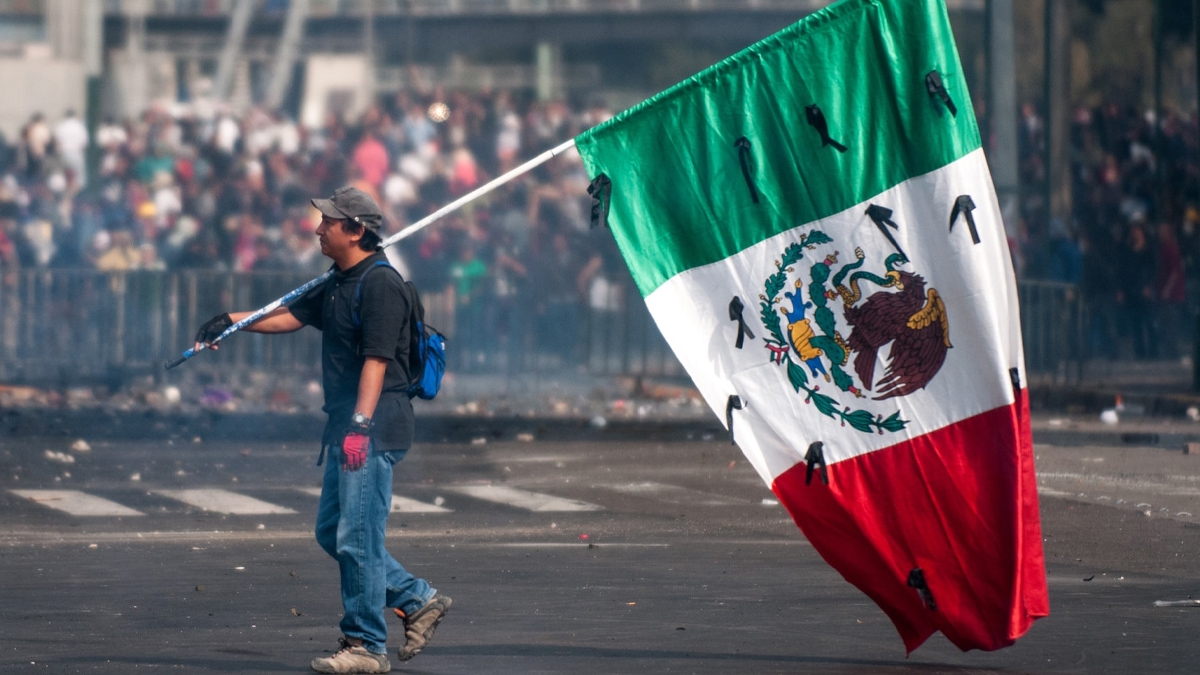

## **Abstract**


Este DataSet es un registro de incidencia delictiva en México en el periodo de 2015 - 2023. url: https://www.kaggle.com/datasets/beelzabi/crimen-mx


En México y tanto en otros lugares del mundo existe la inseguridad para todas las a gran escala y es importante conocer mediante las estadisticas, el tipo de delito que se estan cometiendo a gran escala, con el fin de que podamos tomar nuestras precauciones y alertar a nuestros familiares.

Nuestro proyecto de predicción de delitos en México tiene como objetivo principal reducir la criminalidad y mejorar la seguridad ciudadana en todo el país. Mediante el análisis de datos y el aprendizaje automático, hemos desarrollado un modelo altamente preciso que puede identificar patrones delictivos y predecir áreas de alto riesgo en tiempo real. Esto permite a las autoridades y a las fuerzas de seguridad tomar decisiones basadas en datos y asignar recursos de manera más eficiente para prevenir y combatir el delito.

Este estudio puede ser de interés para las autoridades y los cuerpos de seguridad encargados de la prevención y reducción de los crímenes en México, así como para los investigadores y analistas de datos interesados en el estudio de la criminalidad y la violencia en México y otros países.

A quién le puede interesar:

Este estudio puede ser de interés para diversas personas y organizaciones, entre ellas:

- Autoridades y cuerpos de seguridad encargados de la prevención y reducción de los crímenes en México.
- Investigadores y analistas de datos interesados en el estudio de la criminalidad y la violencia en México.
- Organizaciones no gubernamentales y grupos de la sociedad civil dedicados a la defensa de los derechos humanos y la seguridad ciudadana.
- Ciudadanos y comunidades afectados por la violencia y la criminalidad en México, interesados en conocer más sobre las tendencias en su localidad o región.


## **Contexto Comercial**

En la Republica Mexicana ha experimentado un gran numero de reportes de todo tipo de delitos en los ultimos años. Para ello se ha recopilado información de todo los delitos comentidos desde el año 2015 hasta la actualidad 2023.

Somos una equipo de Trabajadores de Data Sicence independiente en el cual nos encomiendan identificar el Estado con mayor inseguidad en el Pais de Mexico y tambien a que genero esta afectando más asi como predecir los crimenes en los futuros años. Se tiene ciertos parametros como el tipo de delitos, el genero afectado, los meses de las cuales se han registrado.



## **Problema Comercial**

Con los datos proporcionados generar visualizaciones que correspondan al objetivo del problema la cual es identificar el estado con mayor inseguridad y de acuerdo a ello hacer una prediccion del incremento de los delitos a futuro, asi como responder a las preguntas del cliente


## **Contexto Analítico**

Recibirmos este data set por la comunidad de Kaggle https://www.kaggle.com/datasets/beelzabi/crimen-mx para analizar los detitos cometidos en Mexico.

## **Objetivo**

El objetivo principal de este proyecto es desarrollar un modelo predictivo para predecir la tasa de delitos por año en un área determinada (El estados con mayor inseguridad). Esto podría ser útil para identificar patrones a largo plazo en la actividad delictiva y para evaluar la efectividad de las políticas públicas y las medidas de seguridad a lo largo del tiempo. Algunas preguntas específicas que buscamos responder son:

- ¿Existe alguna correlación entre los años y el total de homicidios cometidos?
- ¿Cual es el estado de la Republica Mexicana con mayor delitos?
- ¿Qué variables están disponibles en el conjunto de datos y cuáles son relevantes para la predicción de la tasa de delitos por año?
- ¿Qué técnicas de modelado predictivo son apropiadas para predecir la tasa de delitos por año en el área de interés?
- ¿Cómo se distribuyen los diferentes subtipos de delitos en el estado con mayor incidencia delictiva? ¿Hay algún subtipo que destaque en particular?

## **Hipótesis**


- La tasa de delitos puede estar relacionada con el tamaño de la población en una zona determinada, ya que las zonas con una mayor densidad de población pueden tener una mayor actividad delictiva.
- La tasa de delitos puede estar relacionada con la edad de la población, ya que las zonas con una mayor proporción de jóvenes pueden tener una mayor actividad delictiva.
- Los delitos violentos, como el homicidio, pueden estar relacionados con el tráfico de drogas en una zona determinada, ya que el tráfico de drogas puede estar asociado con la violencia.
- La tasa de homicidios aumenta en el area con mayor inseguridad aumenta año tras año




# 2. Carga de Librerias

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

In [2]:
# Leemos el CSV
df = pd.read_csv('Crimen_mx.csv', encoding='utf-8')
df.head()

Año  Clave_Ent         Entidad             Bien jurídico afectado  \
0  2015          1  Aguascalientes  La libertad y la seguridad sexual   
1  2015          1  Aguascalientes  La libertad y la seguridad sexual   
2  2015          1  Aguascalientes  La libertad y la seguridad sexual   
3  2015          1  Aguascalientes  La libertad y la seguridad sexual   
4  2015          1  Aguascalientes  La libertad y la seguridad sexual   

  Tipo de delito     Subtipo de delito             Modalidad  Enero  Febrero  \
0  Delito sexual          Abuso sexual          Abuso sexual      6        4   
1  Delito sexual          Acoso sexual          Acoso sexual      0        0   
2  Delito sexual  Hostigamiento sexual  Hostigamiento sexual      1        1   
3      Violación      Violación simple      Violación simple      5        5   
4      Violación  Violación equiparada  Violación equiparada      0        5   

   Marzo  ...  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0    0.0  ...    1.0    1.0     1.0         0.0      0.0        1.0   
1    0.0  ...    0.0    0.0     0.0         0.0      0.0        0.0   
2    0.0  ...    0.0    1.0     0.0         0.0      1.0        0.0   
3    3.0  ...   15.0    8.0     8.0         6.0      9.0        5.0   
4    3.0  ...    4.0    4.0     4.0         3.0      5.0        3.0   

   Diciembre  Total delitos  Sexo/Averiguación previa  Rango de edad  
0        1.0             18       Averiguación previa      No aplica  
1        0.0              0       Averiguación previa      No aplica  
2        3.0             11       Averiguación previa      No aplica  
3        6.0             84       Averiguación previa      No aplica  
4        0.0             41       Averiguación previa      No aplica  

[5 rows x 22 columns]

# 3. Análisis Exploratorio de Datos (EDA)


Las variables del conjunto son las siguientes:

- Año - Año en que ocurrieron los delitos
- Clave_Ent - Clave de la entidad federativa
- Entidad - Estado en el que ocurre el delito
- Bien jurídico afectado - Juridico afectado sobre el dlito
- Tipo de delito - Tipo de delito cometido
- Subtipo de delito - Subtipo de delito cometido
- Modalidad - Forma en que ocurre el Delito
- Enero - Cantidad de delitos ocurridos en Enero
- Febrero - Cantidad de delitos ocurridos en Febrero
- Marzo - Cantidad de delitos ocurridos en Marzo
- Abril - Cantidad de delitos ocurridos en Abril
- Mayo - Cantidad de delitos ocurridos en Mayo
- Junio - Cantidad de delitos ocurridos en Junio
- Julio - Cantidad de delitos ocurridos en Julio
- Agosto - Cantidad de delitos ocurridos en Agosto
- Septiembre - Cantidad de delitos ocurridos en Septiembre
- Octubre - Cantidad de delitos ocurridos en Octubre
- Noviembre - Cantidad de delitos ocurridos en Noviembre
- Diciembre - Cantidad de delitos ocurridos en Diciembre
- Total delitos - Suma de total de Delitos de Enrero-Diciembre
- Sexo/Averiguación previa - Quienes fueron los afectados

## 3.1 Información general sobre el conjunto de datos

In [3]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Filas, columnas:  (84096, 22)

Nombres de las variables: 
 Index(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
       'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Enero', 'Febrero',
       'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
       'Octubre', 'Noviembre', 'Diciembre', 'Total delitos',
       'Sexo/Averiguación previa', 'Rango de edad'],
      dtype='object')

Tipos de datos: 
 Año                           int64
Clave_Ent                     int64
Entidad                      object
Bien jurídico afectado       object
Tipo de delito               object
Subtipo de delito            object
Modalidad                    object
Enero                         int64
Febrero                       int64
Marzo                       float64
Abril                       float64
Mayo                        float64
Junio                       float64
Julio                       float64
Agosto                      float64
Septiembre                  

In [4]:
df.isnull()

Año  Clave_Ent  Entidad  Bien jurídico afectado  Tipo de delito  \
0      False      False    False                   False           False   
1      False      False    False                   False           False   
2      False      False    False                   False           False   
3      False      False    False                   False           False   
4      False      False    False                   False           False   
...      ...        ...      ...                     ...             ...   
84091  False      False    False                   False           False   
84092  False      False    False                   False           False   
84093  False      False    False                   False           False   
84094  False      False    False                   False           False   
84095  False      False    False                   False           False   

       Subtipo de delito  Modalidad  Enero  Febrero  Marzo  ...  Junio  Julio  \
0                  False      False  False    False  False  ...  False  False   
1                  False      False  False    False  False  ...  False  False   
2                  False      False  False    False  False  ...  False  False   
3                  False      False  False    False  False  ...  False  False   
4                  False      False  False    False  False  ...  False  False   
...                  ...        ...    ...      ...    ...  ...    ...    ...   
84091              False      False  False    False   True  ...   True   True   
84092              False      False  False    False   True  ...   True   True   
84093              False      False  False    False   True  ...   True   True   
84094              False      False  False    False   True  ...   True   True   
84095              False      False  False    False   True  ...   True   True   

       Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total delitos  \
0       False       False    False      False      False          False   
1       False       False    False      False      False          False   
2       False       False    False      False      False          False   
3       False       False    False      False      False          False   
4       False       False    False      False      False          False   
...       ...         ...      ...        ...        ...            ...   
84091    True        True     True       True       True          False   
84092    True        True     True       True       True          False   
84093    True        True     True       True       True          False   
84094    True        True     True       True       True          False   
84095    True        True     True       True       True          False   

       Sexo/Averiguación previa  Rango de edad  
0                         False          False  
1                         False          False  
2                         False          False  
3                         False          False  
4                         False          False  
...                         ...            ...  
84091                     False          False  
84092                     False          False  
84093                     False          False  
84094                     False          False  
84095                     False          False  

[84096 rows x 22 columns]

**Conclusiones**
Tenemos un dataset con datos nulos, las cuales se identificaron y son los reguistros del año 2023 que estan incompletos por lo que se toma una desicion de seleccionar solo los regitros desde 2015 hasta Diciembre 2022

## 3.2 Estandarización

Renombramos las columnas que tengan espacios

In [5]:
df_new = df.rename({'Total delitos': 'Total_delitos', 'Tipo de delito': 'Tipo_delito', 'Bien jurídico afectado': 'Juridico_Afectado', 'Subtipo de delito': 'Subtipo_delito','Sexo/Averiguación previa': 'Genero','Rango de edad': 'Edad'}, axis=1)

## 3.3 Seleccion de Rango de fechas para el dataset y seleccionamos solo las columnas de interes

In [6]:
df_select = df_new.loc[df["Año"].between(2015, 2022)]
df_select

Año  Clave_Ent         Entidad                  Juridico_Afectado  \
0      2015          1  Aguascalientes  La libertad y la seguridad sexual   
1      2015          1  Aguascalientes  La libertad y la seguridad sexual   
2      2015          1  Aguascalientes  La libertad y la seguridad sexual   
3      2015          1  Aguascalientes  La libertad y la seguridad sexual   
4      2015          1  Aguascalientes  La libertad y la seguridad sexual   
...     ...        ...             ...                                ...   
76731  2022         32       Zacatecas                  Libertad personal   
76732  2022         32       Zacatecas                      El patrimonio   
76733  2022         32       Zacatecas                        La sociedad   
76734  2022         32       Zacatecas                        La sociedad   
76735  2022         32       Zacatecas                        La sociedad   

                                             Tipo_delito  \
0                                          Delito sexual   
1                                          Delito sexual   
2                                          Delito sexual   
3                                              Violación   
4                                              Violación   
...                                                  ...   
76731  Otros delitos que atentan contra la libertad p...   
76732                                          Extorsión   
76733                              Corrupción de menores   
76734                                  Trata de personas   
76735                   Otros delitos contra la sociedad   

                                          Subtipo_delito  \
0                                           Abuso sexual   
1                                           Acoso sexual   
2                                   Hostigamiento sexual   
3                                       Violación simple   
4                                   Violación equiparada   
...                                                  ...   
76731  Otros delitos que atentan contra la libertad p...   
76732                                          Extorsión   
76733                              Corrupción de menores   
76734                                  Trata de personas   
76735                   Otros delitos contra la sociedad   

                                               Modalidad  Enero  Febrero  \
0                                           Abuso sexual      6        4   
1                                           Acoso sexual      0        0   
2                                   Hostigamiento sexual      1        1   
3                                       Violación simple      5        5   
4                                   Violación equiparada      0        5   
...                                                  ...    ...      ...   
76731  Otros delitos que atentan contra la libertad p...      0        0   
76732                                          Extorsión      1        1   
76733                              Corrupción de menores      0        0   
76734                                  Trata de personas      0        1   
76735                   Otros delitos contra la sociedad      0        0   

       Marzo  ...  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0        0.0  ...    1.0    1.0     1.0         0.0      0.0        1.0   
1        0.0  ...    0.0    0.0     0.0         0.0      0.0        0.0   
2        0.0  ...    0.0    1.0     0.0         0.0      1.0        0.0   
3        3.0  ...   15.0    8.0     8.0         6.0      9.0        5.0   
4        3.0  ...    4.0    4.0     4.0         3.0      5.0        3.0   
...      ...  ...    ...    ...     ...         ...      ...        ...   
76731    0.0  ...    0.0    0.0     0.0         0.0      0.0        0.0   
76732    1.0  ...    1.0    2.0     0.0         0.0      2.0        2.0   
76733    0.0  ...    0.0    0.0     0.0         0.0  

## 3.4 Análisis de valores atípicos

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/618719106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Total_delitos'] = pd.to_numeric(df_select['Total_delitos'], errors='coerce')
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/618719106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Total_delitos'] = df_select['Total_delitos'].astype(float)
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/618719106.py:4: SettingWithCopyWarning

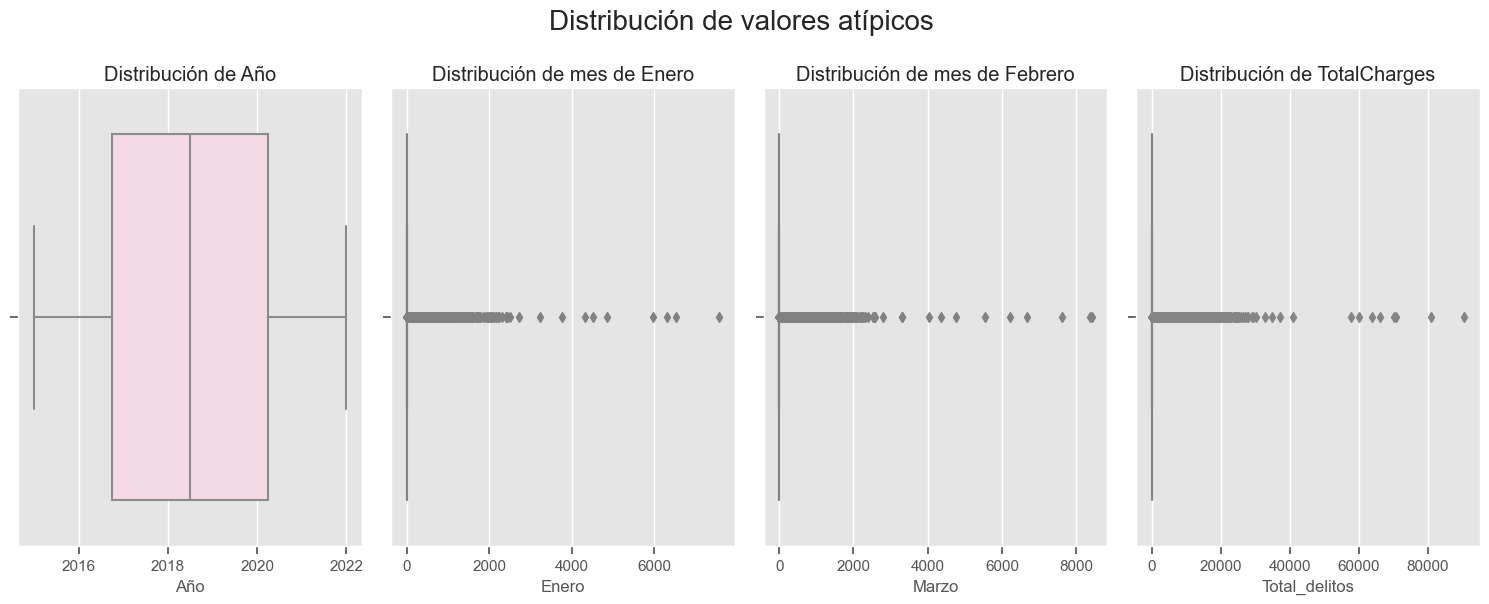

In [7]:
# Definición de columnas numéricas
df_select['Total_delitos'] = pd.to_numeric(df_select['Total_delitos'], errors='coerce')
df_select['Total_delitos'] = df_select['Total_delitos'].astype(float)
df_select['Total_delitos'] = df_select['Total_delitos'].fillna(df_select['Total_delitos'].mean())

# Graficar boxplots
fig, axs = plt.subplots(ncols=4, figsize=(15,6))
fig.suptitle('Distribución de valores atípicos ', fontsize=20, y=1.0)
sns.boxplot(x=df_select['Año'], ax=axs[0], color='#F9D5E5')
sns.boxplot(x=df_select['Enero'], ax=axs[1], color='#FDD5B1')
sns.boxplot(x=df_select['Marzo'], ax=axs[2], color='#FDD5B1')
sns.boxplot(x=df_select['Total_delitos'], ax=axs[3], color='#E2F0CB')
axs[0].set_title('Distribución de Año')
axs[1].set_title('Distribución de mes de Enero')
axs[2].set_title('Distribución de mes de Febrero')
axs[3].set_title('Distribución de TotalCharges')
plt.tight_layout()
plt.show()

## 3.5 Análisis Univariado

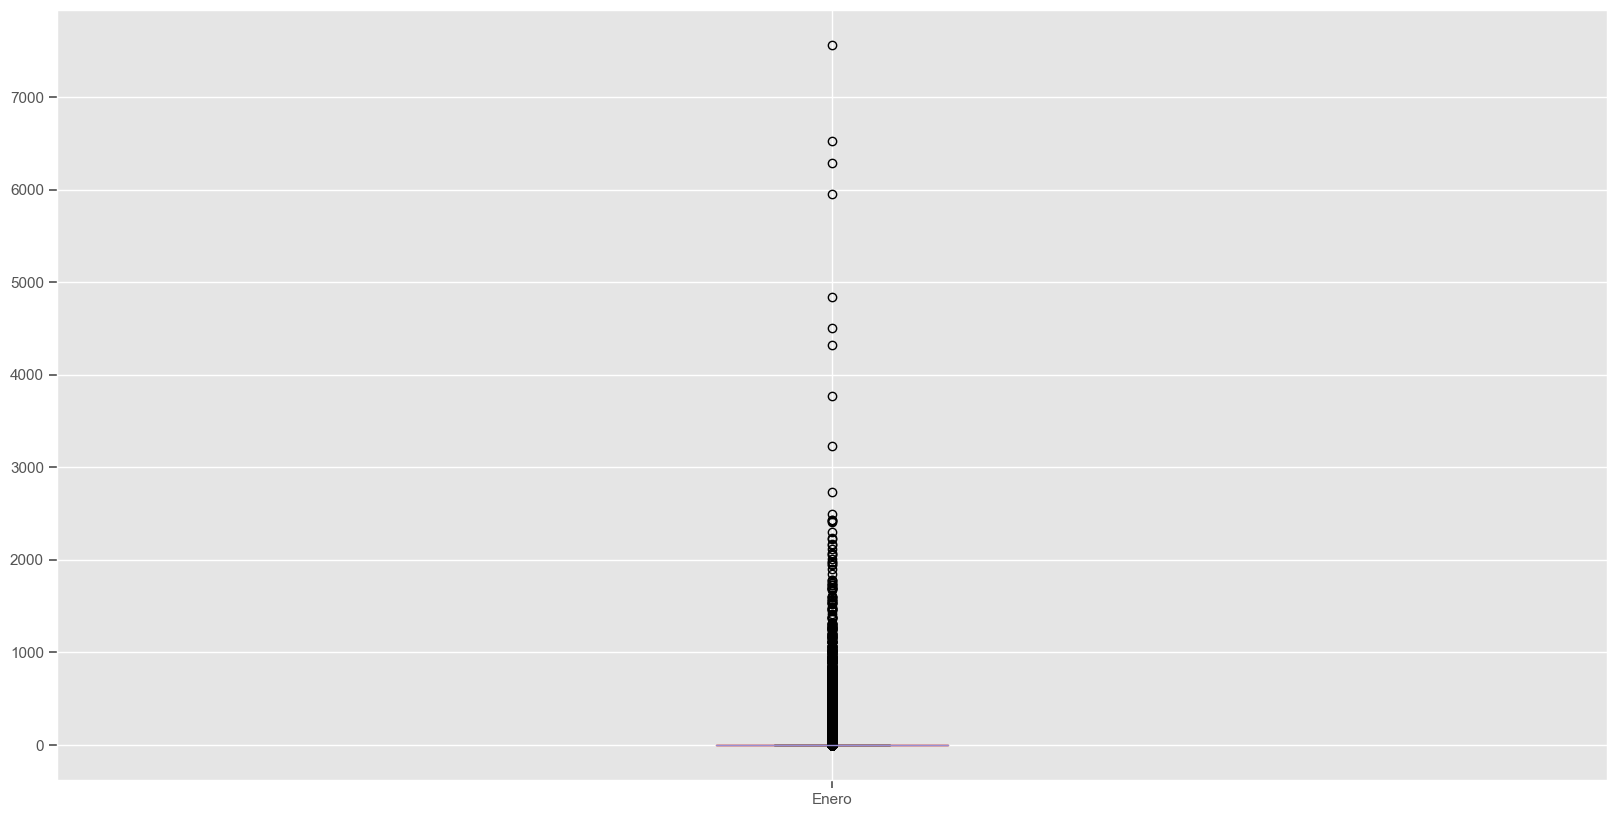

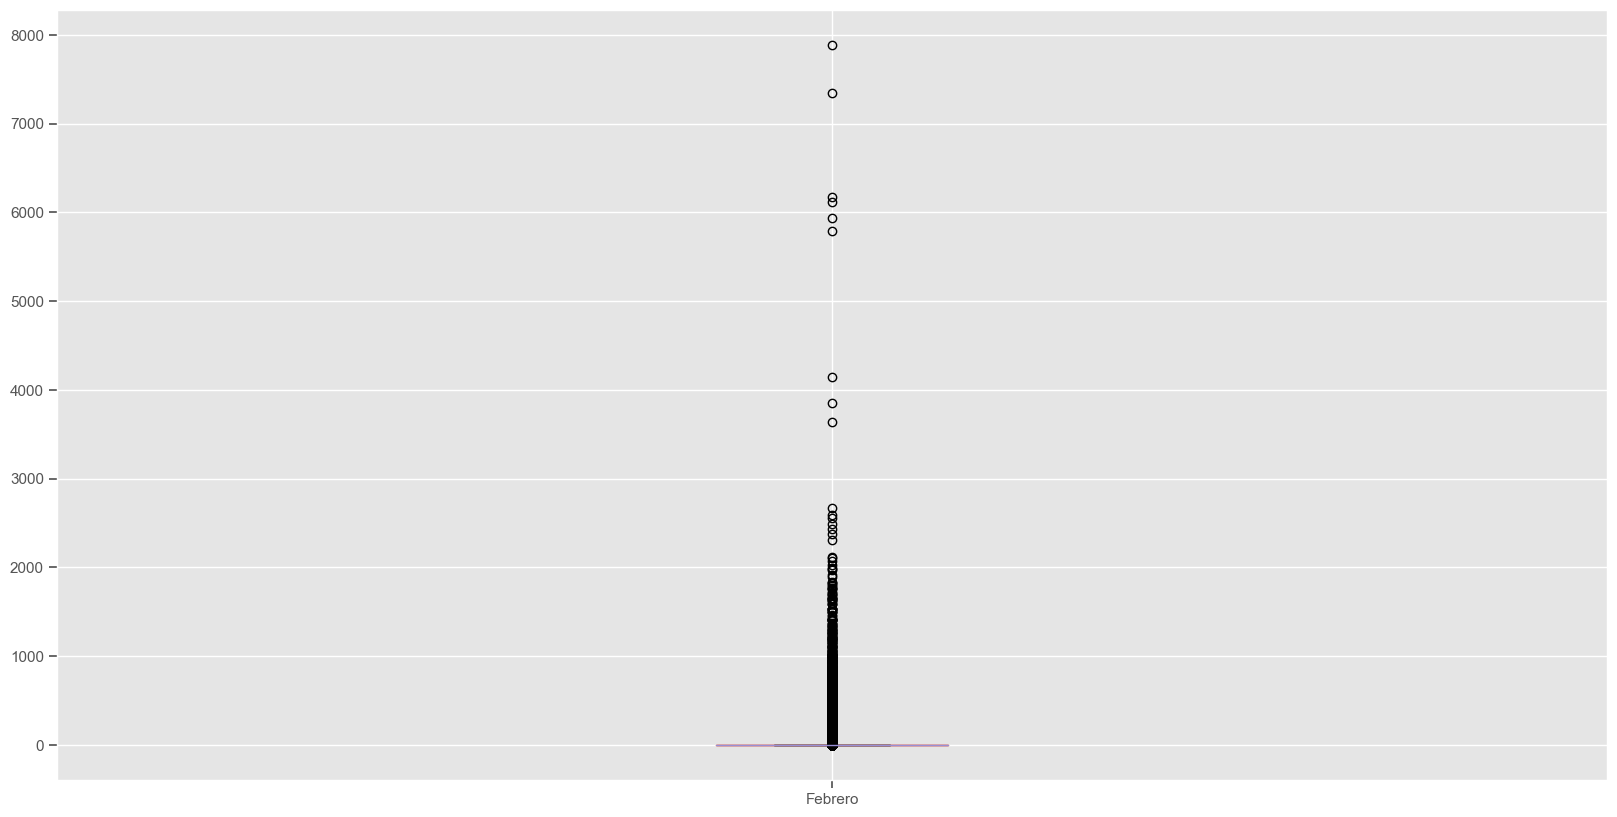

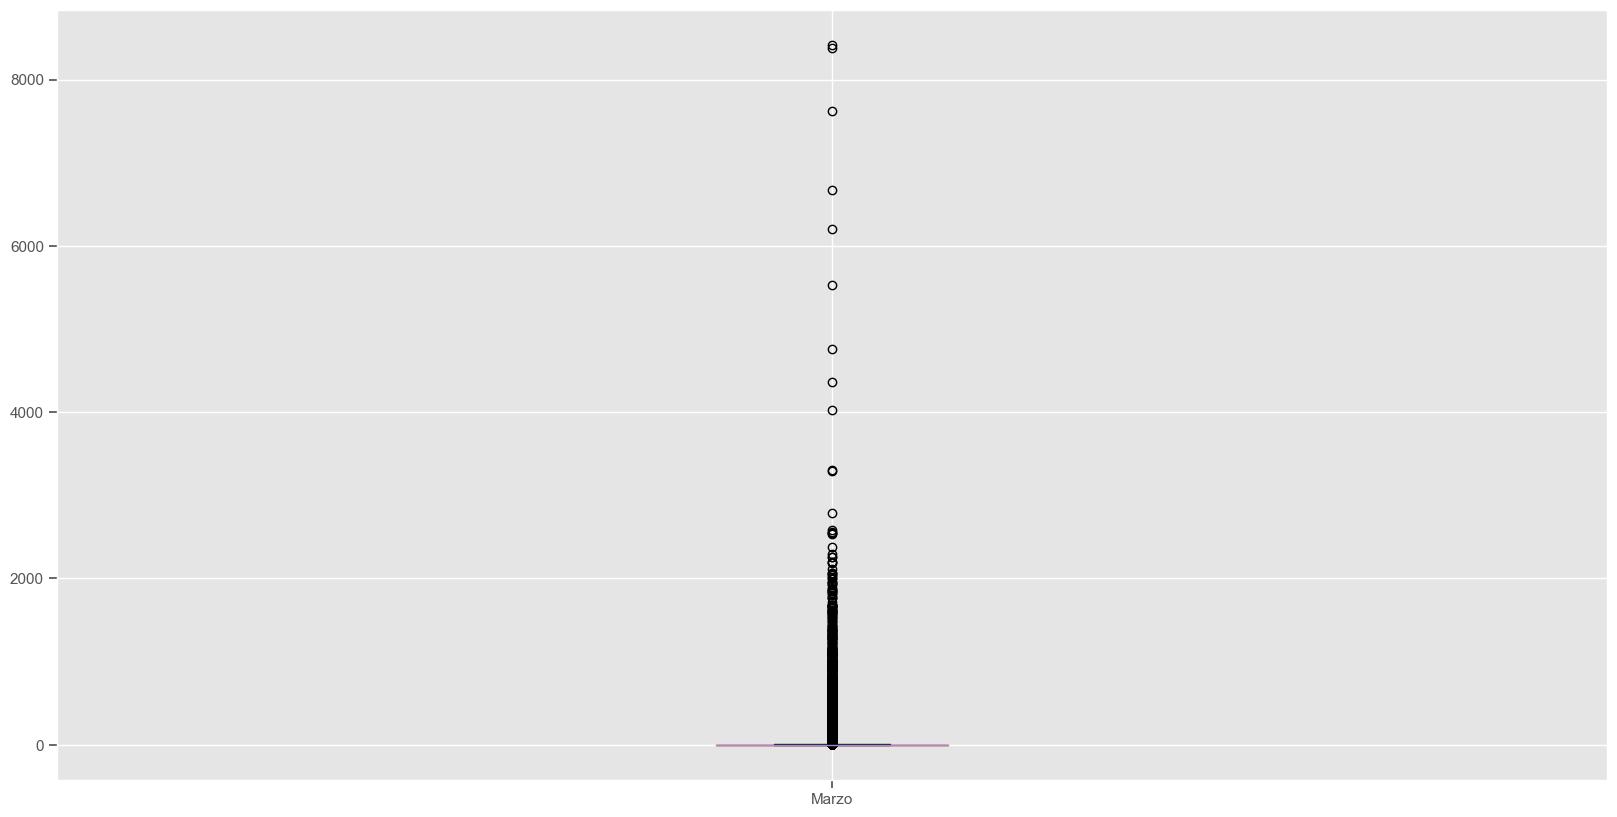

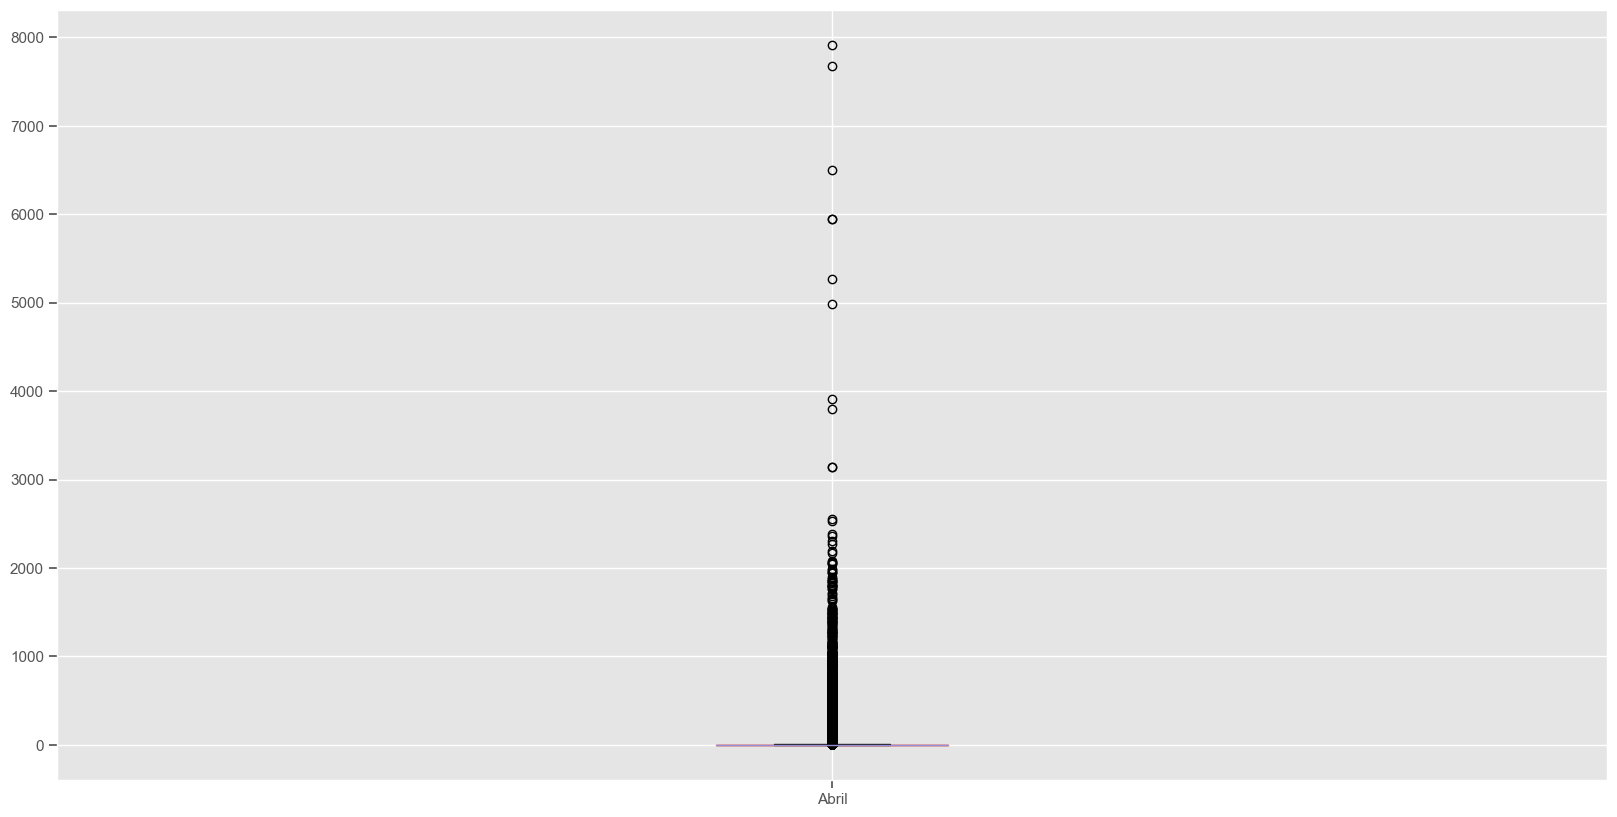

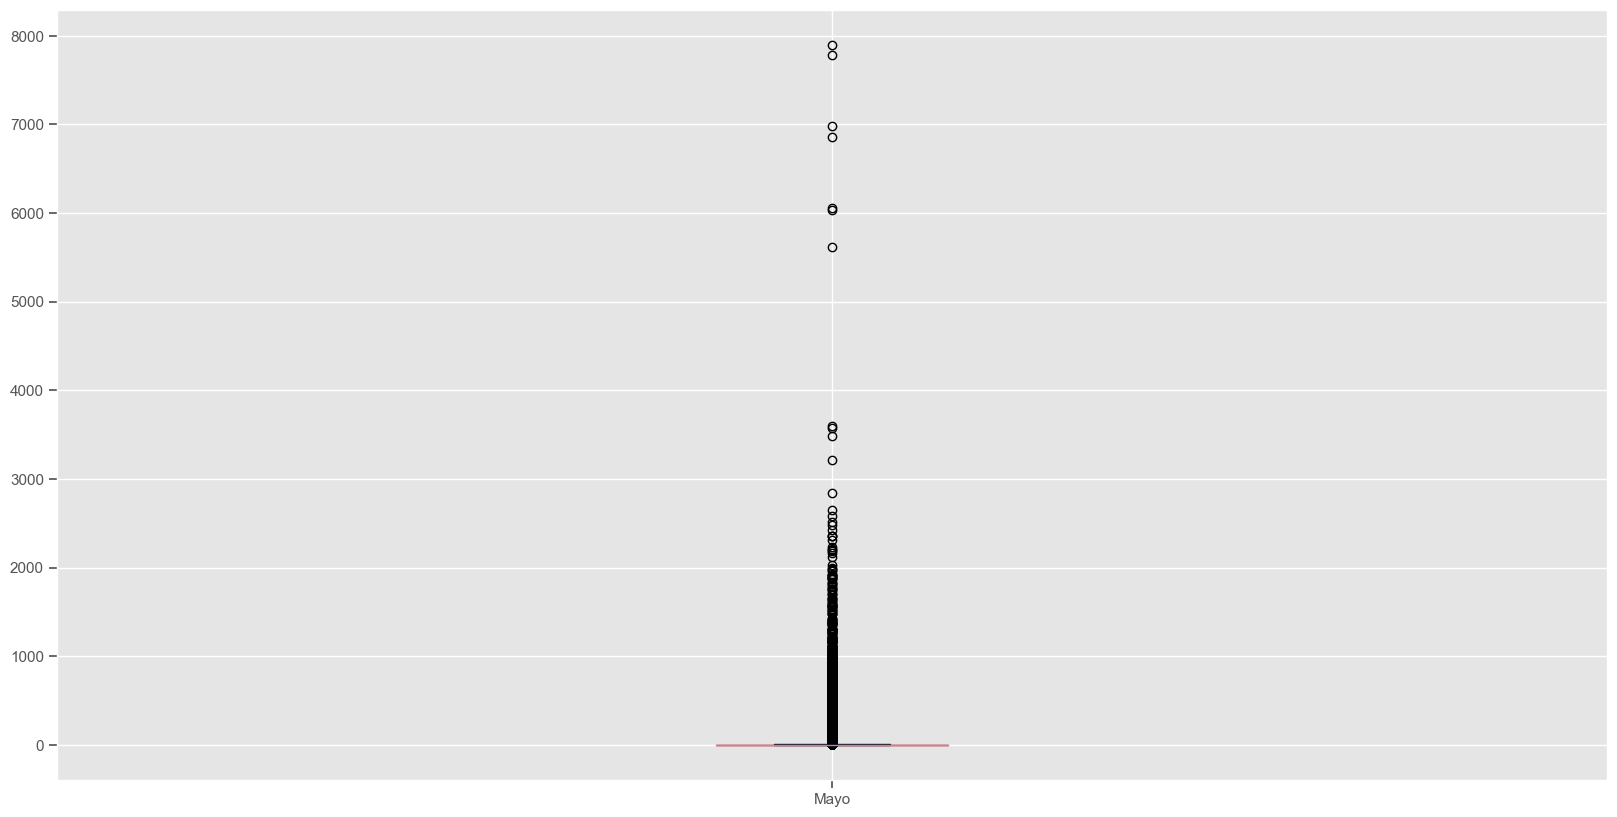

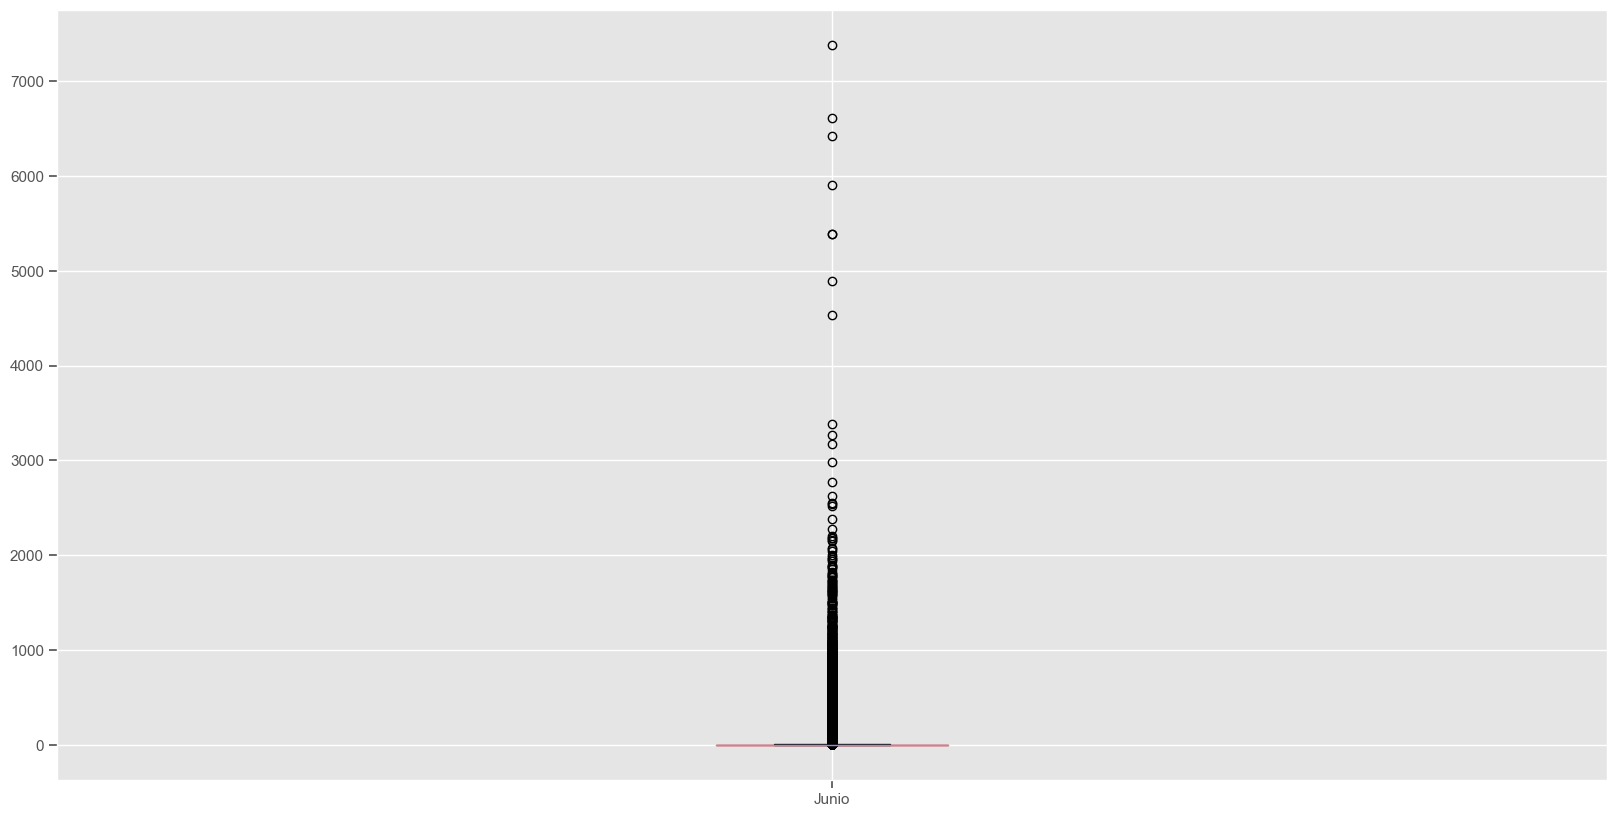

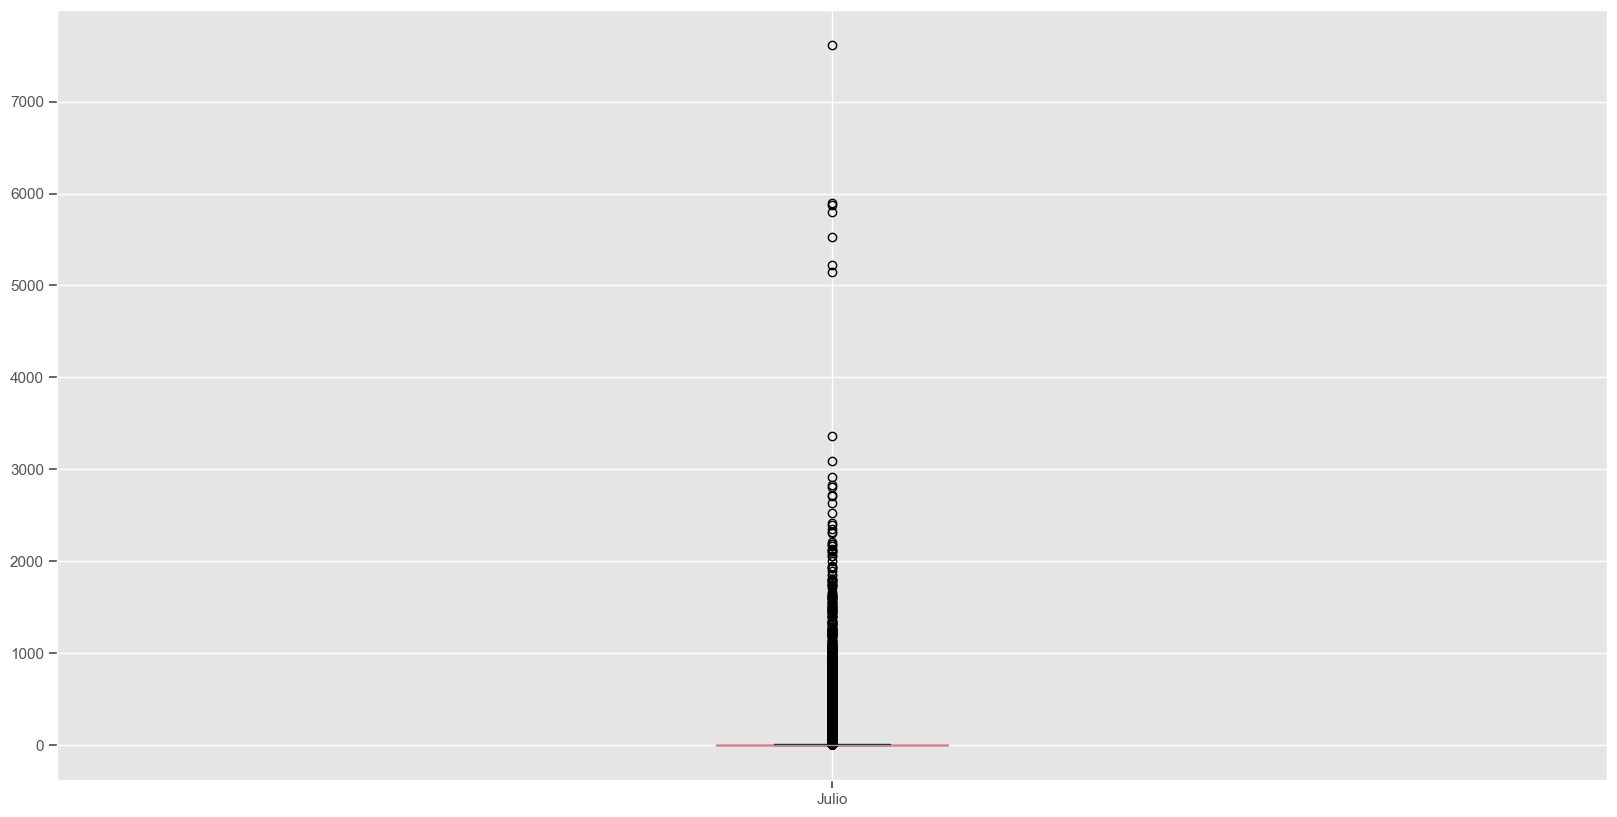

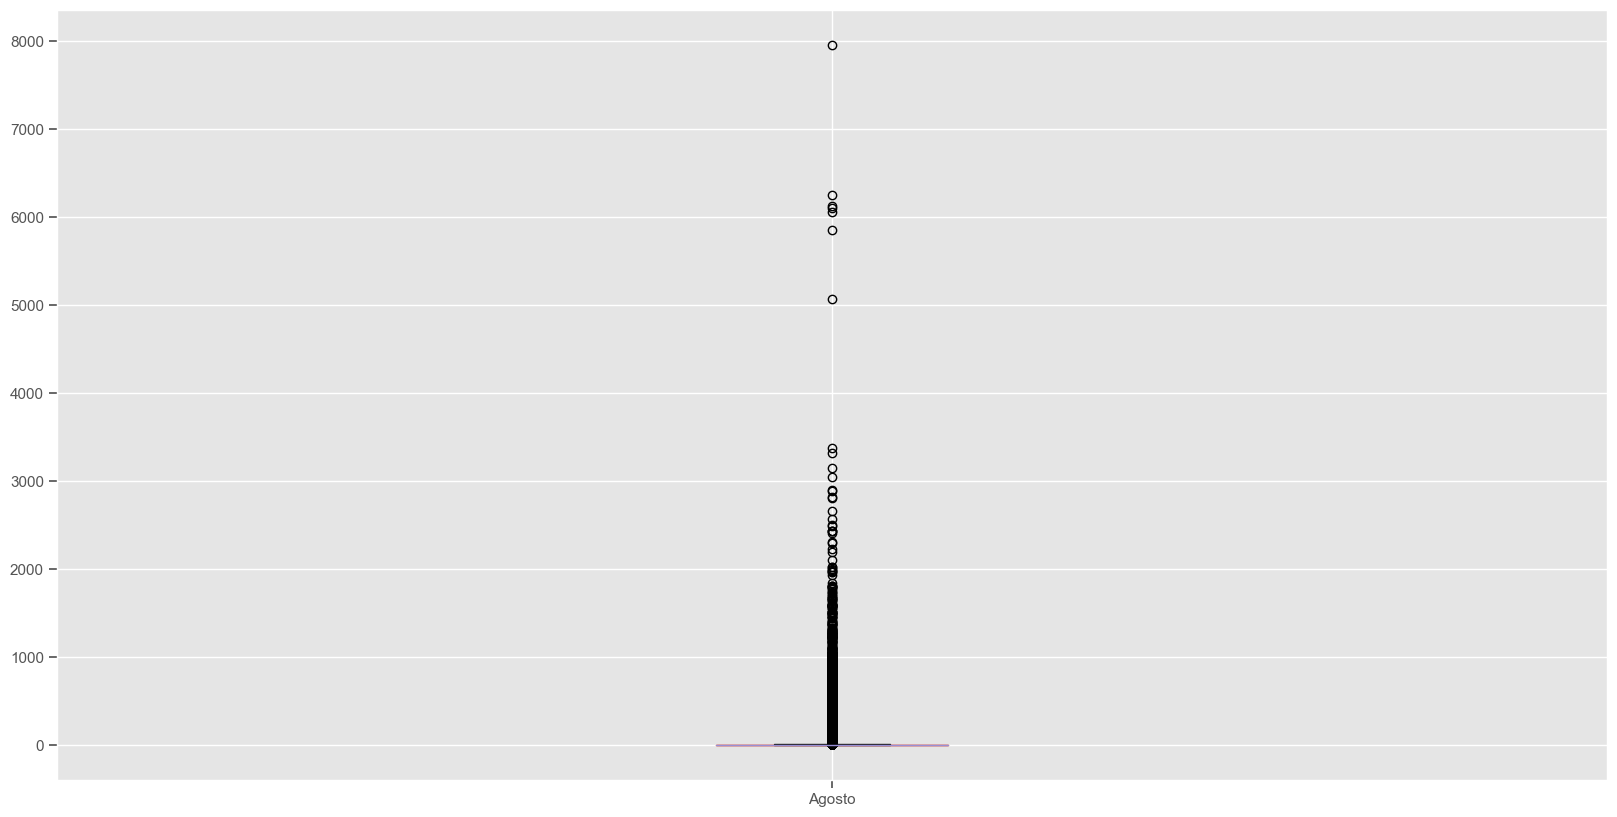

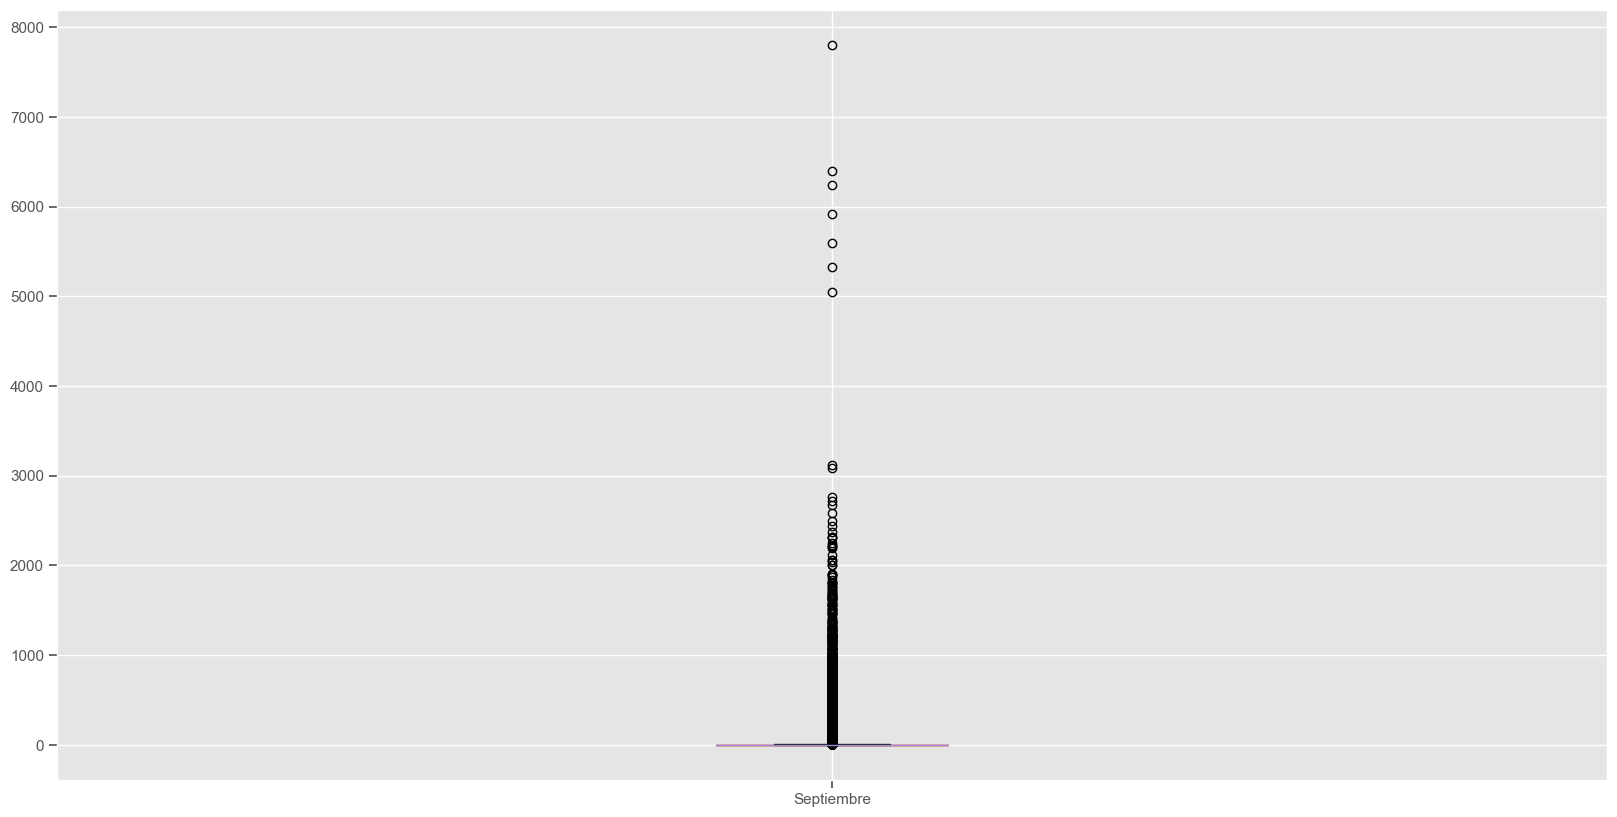

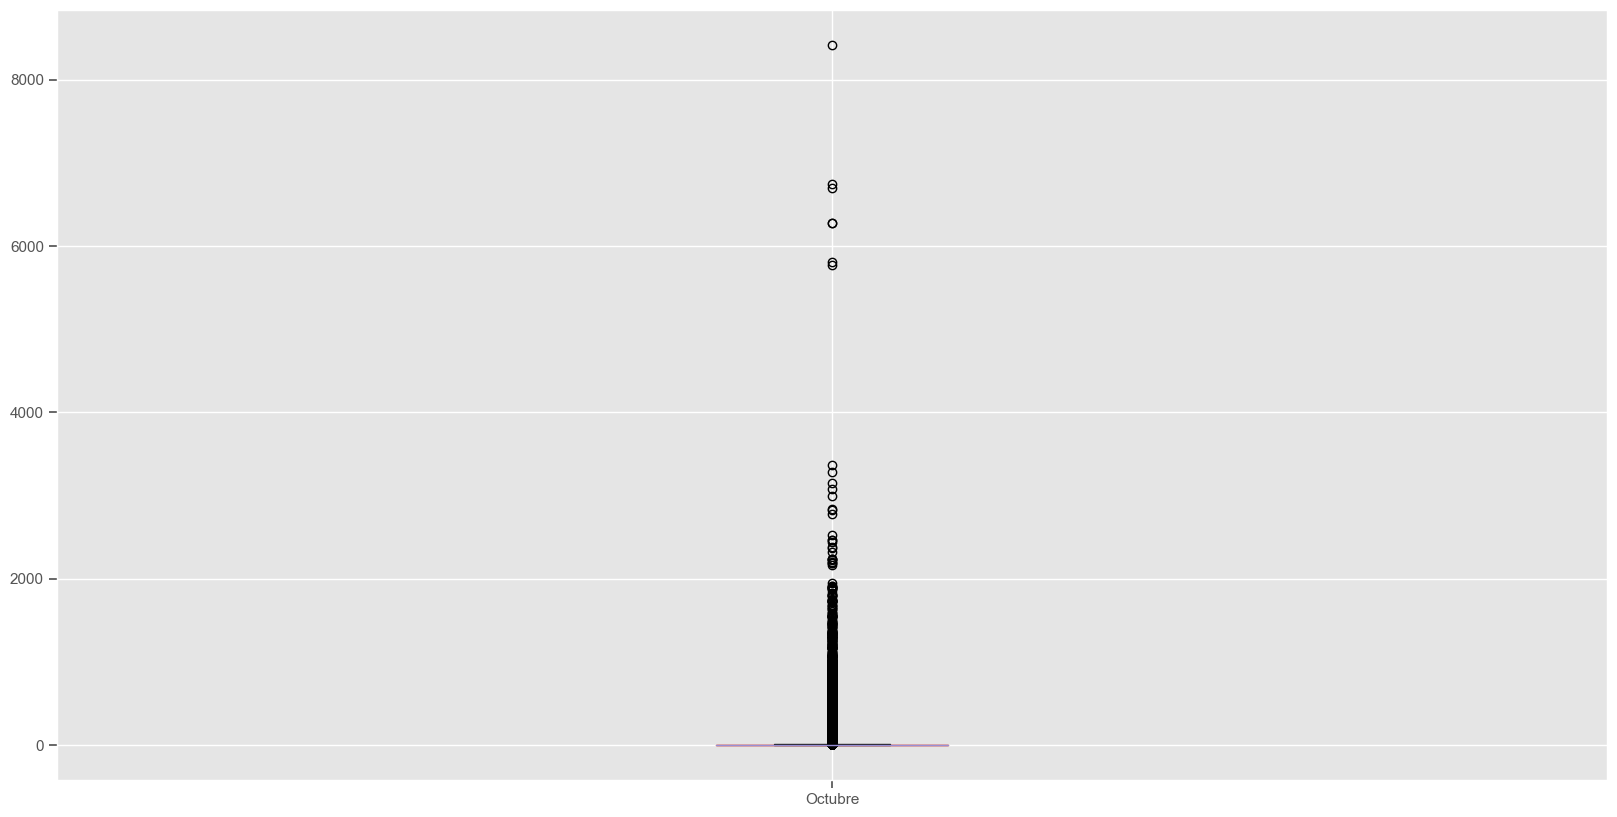

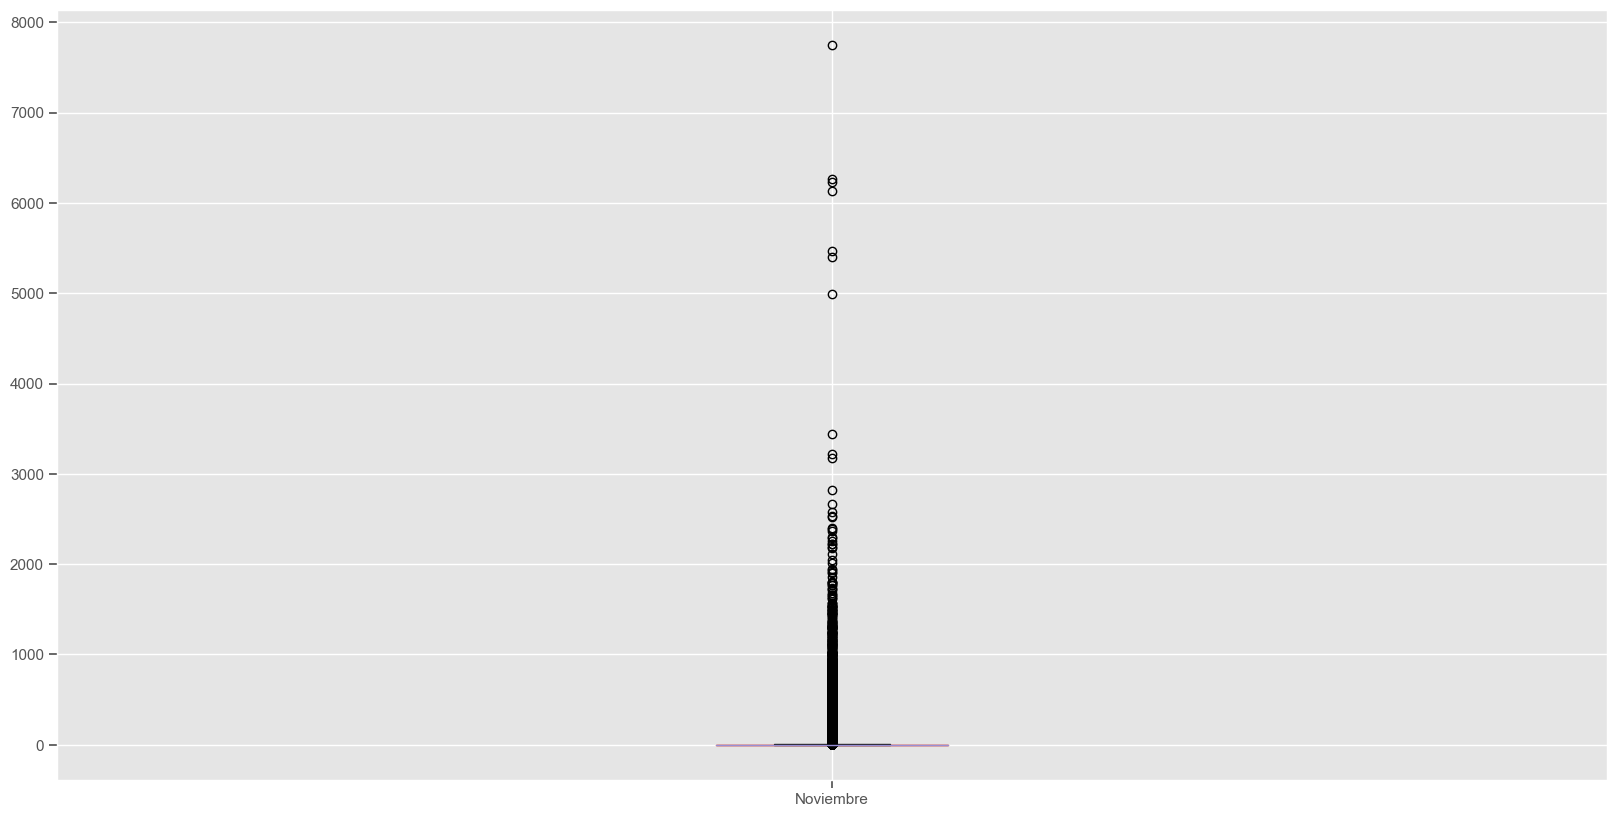

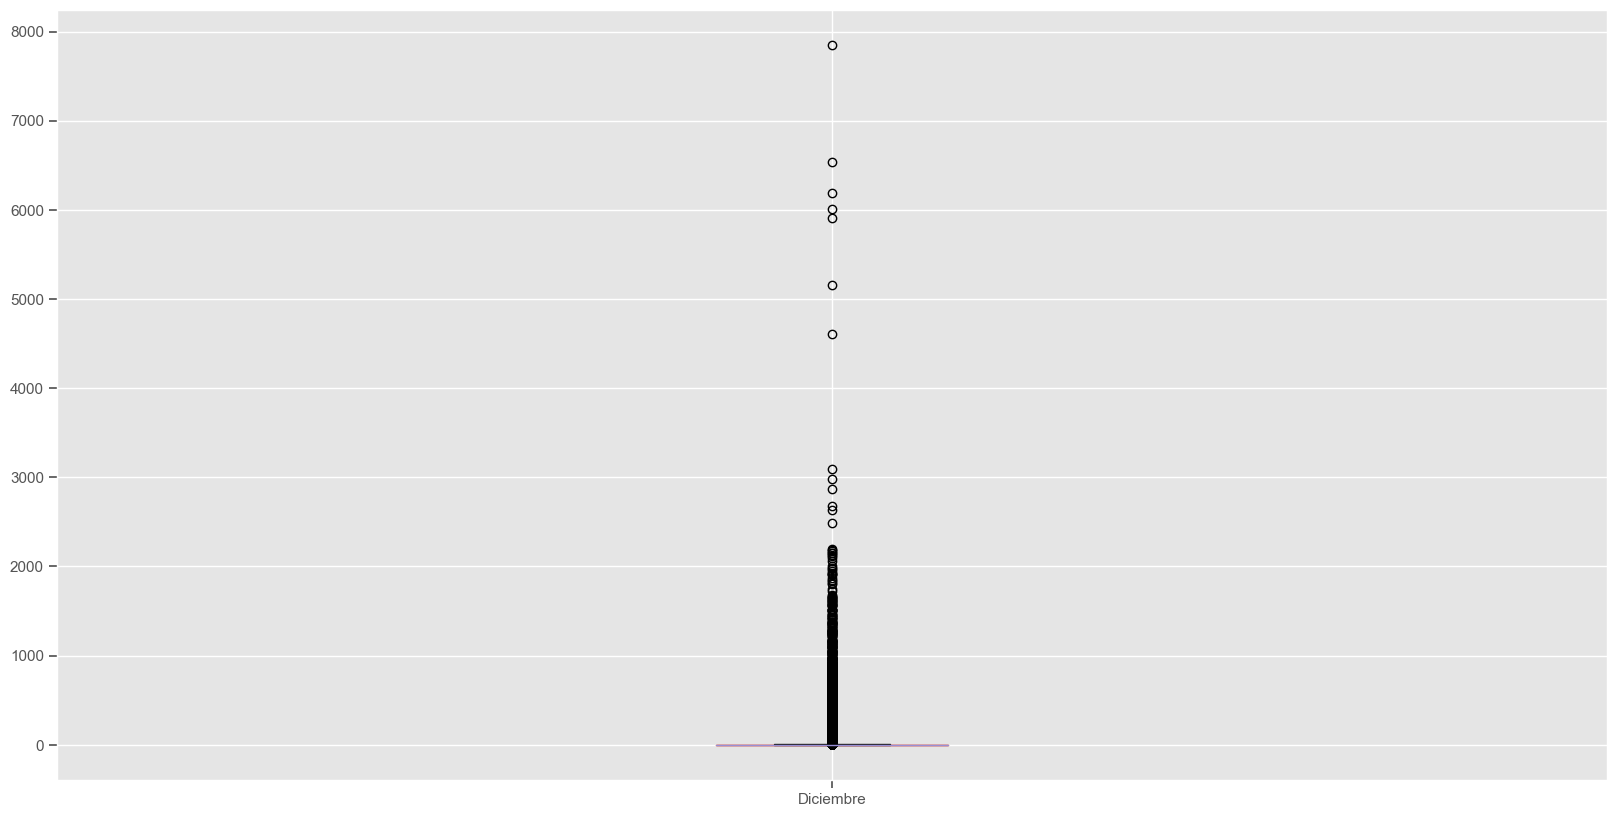

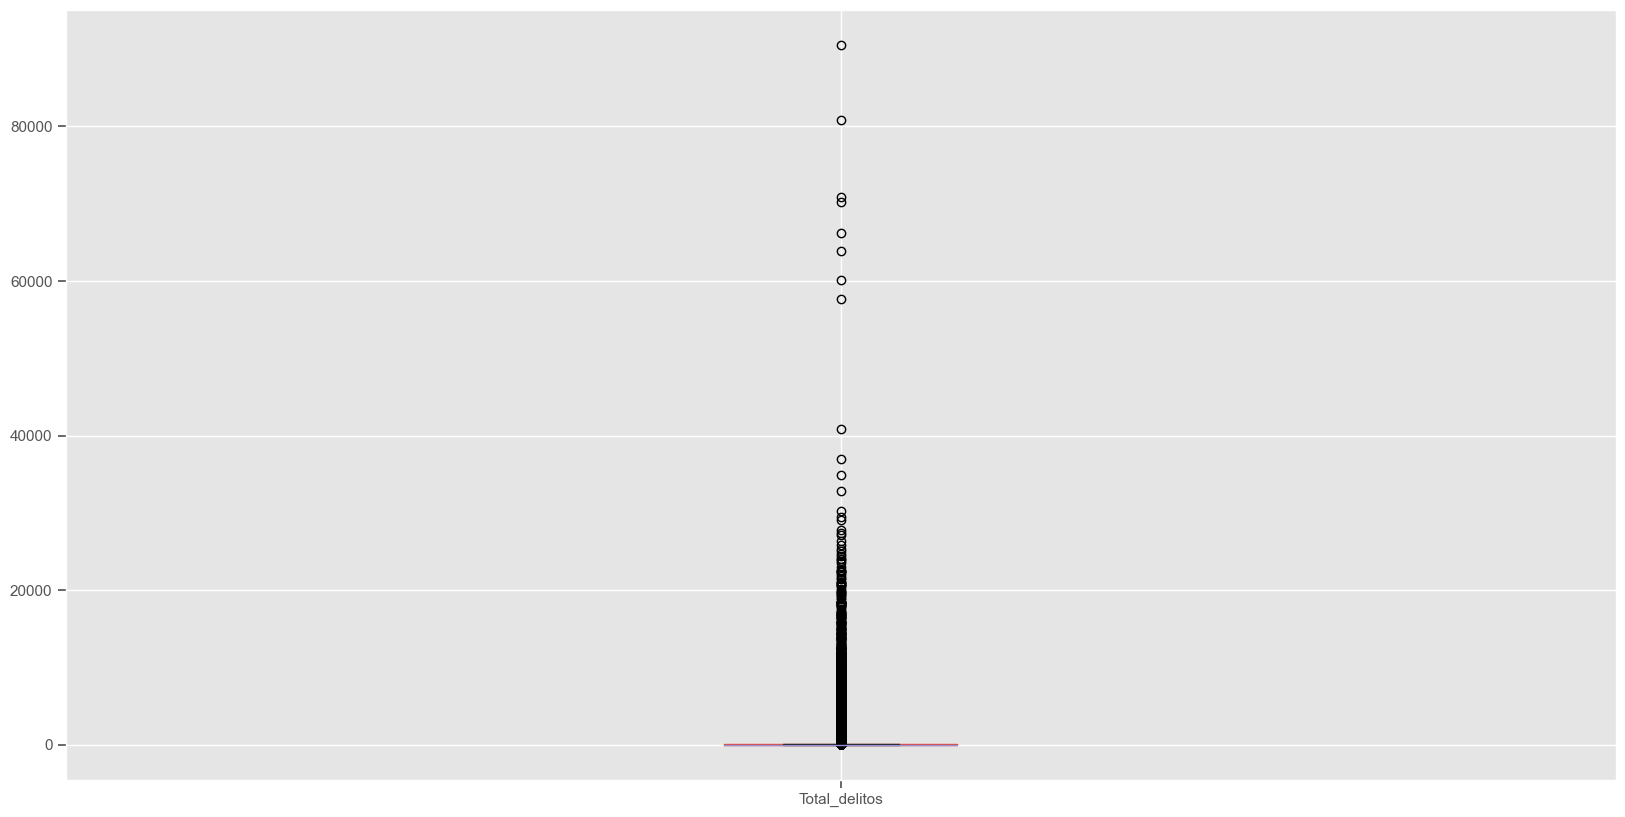

In [8]:
univariado = df_select.drop(['Entidad','Juridico_Afectado','Tipo_delito','Subtipo_delito','Modalidad','Genero','Edad','Año','Clave_Ent'], axis=1)
for i in univariado:
    univariado.boxplot(column = i)
    plt.show()

**Conclusión**

De acuerdo a los resultados de Datos atipicos y Datos univariados podemos encontrar efectivamente datos atipicos, pero en relación a los datos no podemos eliminarlos ya que aunque haya registros de 0 crimenes en algunos meses no quiere decir que esta mal, por lo cual se dejara de esta forma

## 3.6 Distribución de variables categóricas

In [9]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 1)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 1, figsize = (10, filas * 10))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

Eliminamos las columnas que no son de nuestro interes y solo mostramos los que si

In [10]:
df_eda = df_select.loc[:, ['Juridico_Afectado','Subtipo_delito','Modalidad','Genero','Edad']]

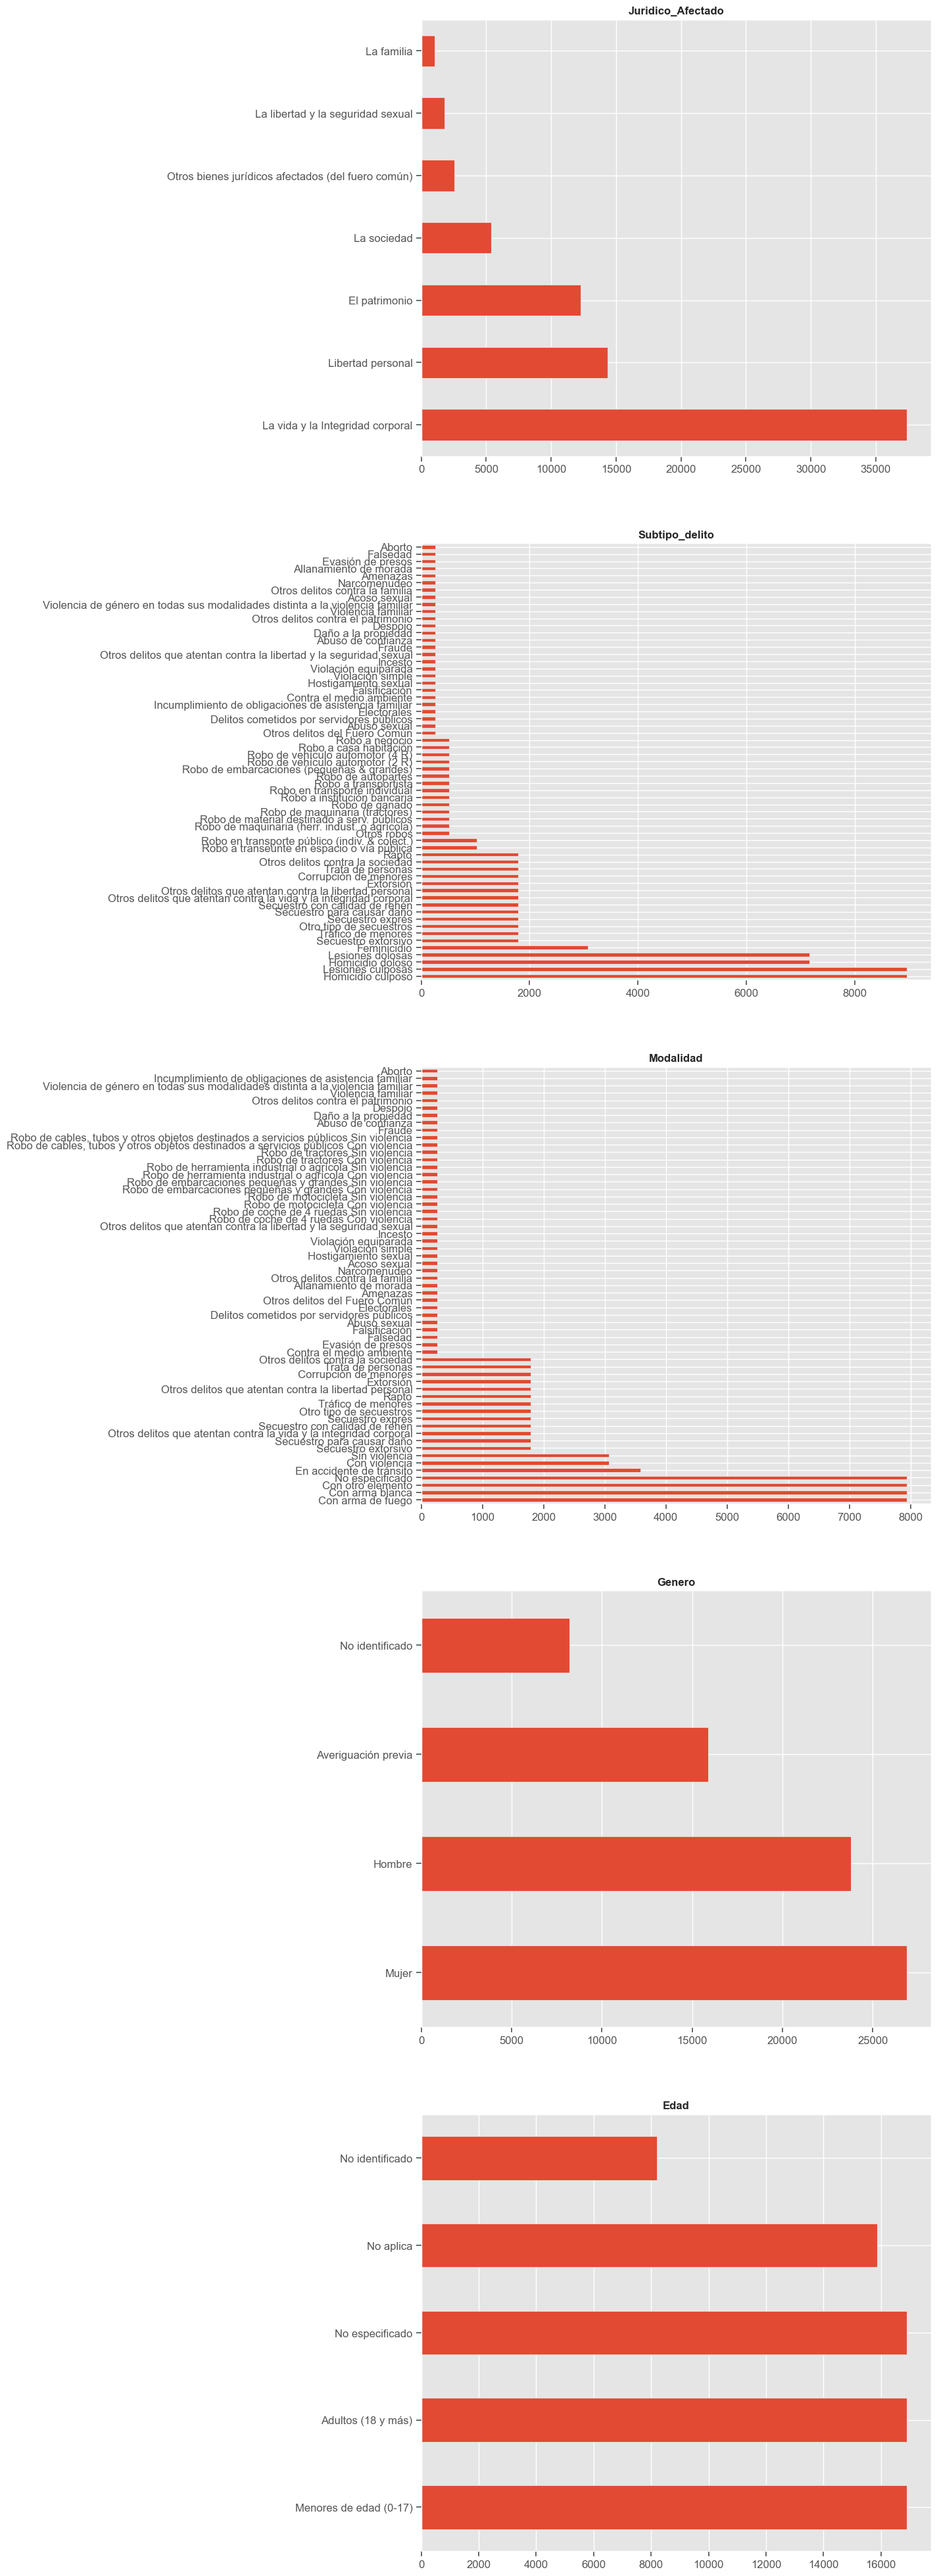

In [11]:
graficos_eda_categoricos(df_eda.select_dtypes('O'))

## Conclusiones

*   El análisis de las variables categóricas muestra algunas tendencias interesantes en cuanto a la distribución de los datos.

*   La variable "sexo/averiguacion previa" muestra una distribución bastante uniforme, con la mayoría de los deitos comentidos sufren el genero "Mujer", siguiendo del genero "Masculino", lo que sugiere que los crimes estan siendo afectado mas a Mujeres.

*   La variable "Modalidad" muestra que en la mayoria de los delitos son cometidos con armas de fuego, asi como arma blanca y accidentes de trafico, lo que se sugiere que en la sociedad se debe de tener en cuenta la situacion del manejo de armas y tomar precaciones en el trafico.

*   La variable "Bien juridico afectado" muestra que la mayoría de los delitos cometidos afecta en "La vida y la Integracion corporal", seguido de Libertad persinal y Patrimonio. Por lo que se sugiere dar mas atencion en los derechos humanos de las personas que estan siendo afectadas.

*   La variable "Rango de edad" muestra que la mayoría de los delitos estan afectos en Menores de edad, asi como en Adultos y tambien a quienes no han sido afectados por lo que es importante que el gobierno se centre en la sociedad de ese rango de edad para salvaguardar su seguridad.

En general, este análisis exploratorio proporciona información valiosa sobre las características de los afectados de los crimenes en la Republica Mexicana, lo que puede ayudar a la empresa a enfocarse al Estado con mayor crimenes y tomar acciones.

## 3.7  Análisis de variables numéricas

In [12]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7,8]]
    #Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_cont(df_select.select_dtypes('number'))

count         mean  median          std     min      25%  \
Año            74752.0  2018.500000  2018.5     2.291303  2015.0  2016.75   
Clave_Ent      74752.0    16.500000    16.5     9.233154     1.0     8.75   
Enero          74752.0    16.360525     0.0   106.202190     0.0     0.00   
Febrero        74752.0    16.441834     0.0   108.201395     0.0     0.00   
Marzo          74752.0    18.321249     0.0   120.517912     0.0     0.00   
Abril          74752.0    17.109027     0.0   112.847277     0.0     0.00   
Mayo           74752.0    18.052989     0.0   118.971911     0.0     0.00   
Junio          74752.0    17.902692     0.0   114.668999     0.0     0.00   
Julio          74752.0    17.657093     0.0   113.156781     0.0     0.00   
Agosto         74752.0    18.170845     0.0   116.964523     0.0     0.00   
Septiembre     74752.0    17.738134     0.0   112.967172     0.0     0.00   
Octubre        74752.0    18.604760     0.0   119.807958     0.0     0.00   
Noviembre      74752.0    17.379722     0.0   111.303051     0.0     0.00   
Diciembre      74752.0    16.776354     0.0   109.274860     0.0     0.00   
Total_delitos  74752.0   210.515224     1.0  1343.455293     0.0     0.00   

                  50%      75%      max  median  
Año            2018.5  2020.25   2022.0  2018.5  
Clave_Ent        16.5    24.25     32.0    16.5  
Enero             0.0     1.00   7565.0     0.0  
Febrero           0.0     1.00   7888.0     0.0  
Marzo             0.0     2.00   8418.0     0.0  
Abril             0.0     2.00   7916.0     0.0  
Mayo              0.0     2.00   7899.0     0.0  
Junio             0.0     2.00   7386.0     0.0  
Julio             0.0     2.00   7619.0     0.0  
Agosto            0.0     2.00   7955.0     0.0  
Septiembre        0.0     2.00   7805.0     0.0  
Octubre           0.0     2.00   8421.0     0.0  
Noviembre         0.0     2.00   7750.0     0.0  
Diciembre         0.0     2.00   7851.0     0.0  
Total_delitos     1.0    22.00  90573.0     1.0

### Conclusiones

De los nulos pendientes de imputación que sean numéricas solo hay en los campos Enero, Febrero, Marzo, Abril, Mayo, junio, Julio, Agosto, Septiembre, Octubre ,Noviembre, Diciembre, pero como esta trabjando con un rango de fechas que es del 2025-2022 ya no hay que imputar nada

## 3.6 Análisis específicos para responder a las preguntas de investigación

### Cuáles son los estados con la tasa más alta de delitos según los reportes disponibles?

In [14]:
# Sumamos el total de delitos agrupanto por estado
df_delitos = df_select.groupby('Entidad').sum()
df_delitos = df_delitos.sort_values('Total_delitos', ascending=False)

In [15]:
# Reseteamos el index e imprimimos la data
df_delitos = df_delitos.reset_index()
df_delitos

Entidad      Año  Clave_Ent   Enero  Febrero  \
0                            México  4715216      35040  218745   224568   
1                  Ciudad de México  4715216      21024  130945   133114   
2                           Jalisco  4715216      32704   91548    85679   
3                        Guanajuato  4715216      25696   81494    79533   
4                   Baja California  4715216       4672   69404    65761   
5                        Nuevo León  4715216      44384   50286    52710   
6   Veracruz de Ignacio de la Llave  4715216      70080   42551    46354   
7                         Chihuahua  4715216      18688   43264    44491   
8                            Puebla  4715216      49056   40303    41513   
9              Coahuila de Zaragoza  4715216      11680   32158    34166   
10                          Tabasco  4715216      63072   33759    34404   
11                        Querétaro  4715216      51392   32255    31330   
12                          Morelos  4715216      39712   27910    28957   
13                          Hidalgo  4715216      30368   28349    28204   
14              Michoacán de Ocampo  4715216      37376   27608    26791   
15                       Tamaulipas  4715216      65408   26025    26416   
16                  San Luis Potosí  4715216      56064   23876    24506   
17                     Quintana Roo  4715216      53728   23669    22333   
18                           Oaxaca  4715216      46720   23051    23820   
19                   Aguascalientes  4715216       2336   20587    20059   
20                         Guerrero  4715216      28032   20743    20062   
21                           Sonora  4715216      60736   18159    19420   
22                          Durango  4715216      23360   18979    19288   
23                          Sinaloa  4715216      58400   16480    16364   
24                           Colima  4715216      14016   15125    14003   
25                        Zacatecas  4715216      74752   13578    13816   
26              Baja California Sur  4715216       7008   14096    13840   
27                          Chiapas  4715216      16352   14307    14081   
28                          Yucatán  4715216      72416   13149    12711   
29                         Tlaxcala  4715216      67744    4110     3981   
30                         Campeche  4715216       9344    3277     3236   
31                          Nayarit  4715216      42048    3192     3549   

       Marzo     Abril      Mayo     Junio     Julio    Agosto  Septiembre  \
0   250491.0  237833.0  249660.0  239541.0  235828.0  244373.0    241062.0   
1   148582.0  134754.0  142219.0  140596.0  143685.0  147703.0    143008.0   
2    94056.0   88078.0   91032.0   95880.0   96409.0   97565.0     91702.0   
3    88163.0   82081.0   86976.0   84117.0   84012.0   86976.0     85150.0   
4    74201.0   70366.0   72774.0   73354.0   75198.0   77270.0     74033.0   
5    58077.0   54119.0   59423.0   62683.0   59851.0   66019.0     63149.0   
6    52135.0   48865.0   48704.0   48794.0   45773.0   47207.0     48982.0   
7    48445.0   45916.0   49574.0   49950.0   49342.0   49403.0     47803.0   
8    48034.0   45819.0   47935.0   45719.0   44847.0   43118.0     42398.0   
9    38803.0   35550.0   38029.0   41323.0   37328.0   38961.0     38808.0   
10   38089.0   35386.0   37545.0   37432.0   38592.0   37294.0     36356.0   
11   35717.0   33772.0   35851.0   35303.0   36596.0   37455.0     35945.0   
12   32511.0   29727.0   30574.0   29773.0   29489.0   30256.0     28985.0   
13   29161.0   28168.0   30737.0   28990.0   25234.0   30360.0     31031.0   
14   29597.0   27393.0   29439.0   28490.0   28536.0   29072.0     28817.0   
15   29038.0   27610.0   29949.0   30109.0   28221.0   31209.0     29770.0   
16   27554.0   26358.0   28223.0   28558.0   29164.0   29193.0     28787.0   
17   26208.0   23031.0   24877.0   24917.0   26098.0   25772.0     25306.0   
18   25621.0   24310.0   25910.0   22

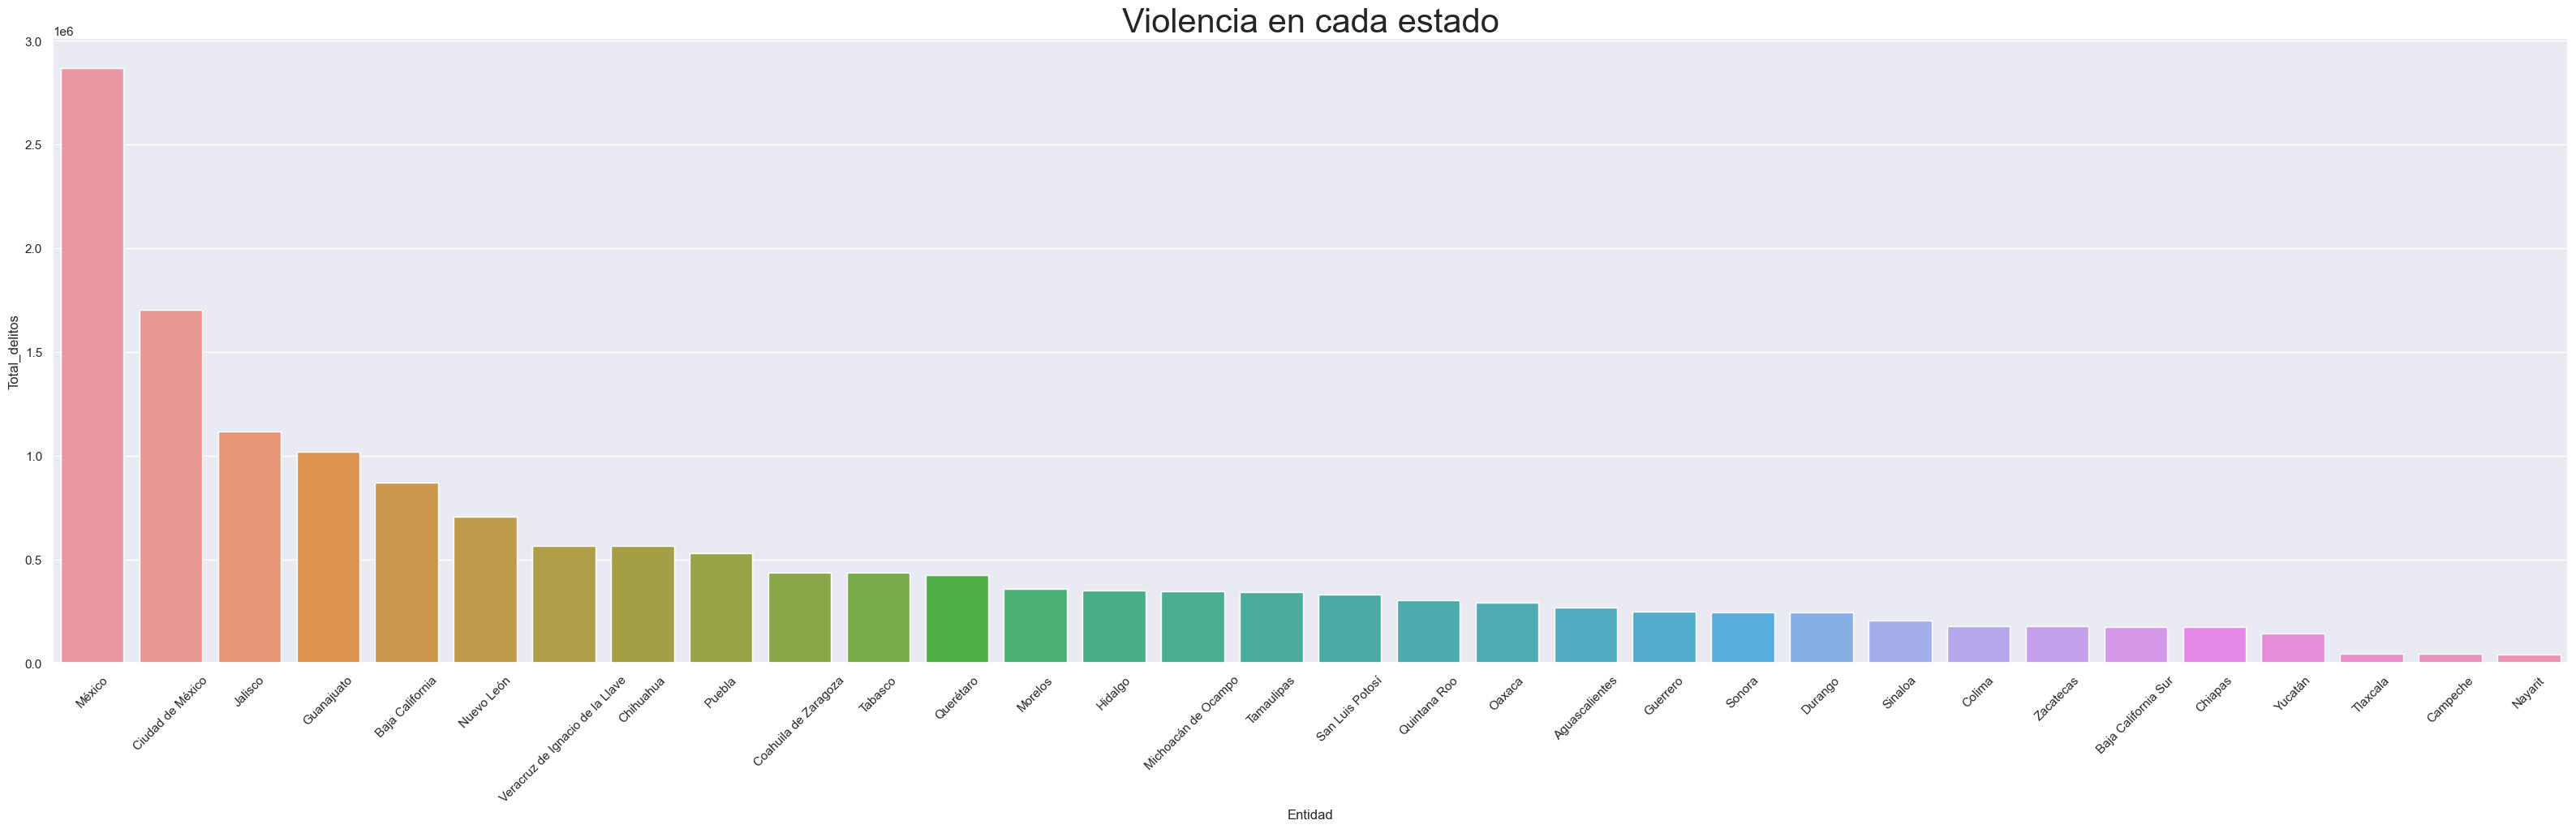

In [16]:
# Graficamos lo que obtumos en la consulta anterior
sns.set(rc = {'figure.figsize':(40,10)})
#plot = sns.lineplot( x=name, y=value)
plot = sns.barplot(data=df_delitos, x='Entidad', y='Total_delitos')
plot.axes.set_title("Violencia en cada estado",fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [17]:
# Consultamos los top 3 de los estados con mas crímines
df_top3 = df_delitos.head(3)
df_top3

Entidad      Año  Clave_Ent   Enero  Febrero     Marzo     Abril  \
0            México  4715216      35040  218745   224568  250491.0  237833.0   
1  Ciudad de México  4715216      21024  130945   133114  148582.0  134754.0   
2           Jalisco  4715216      32704   91548    85679   94056.0   88078.0   

       Mayo     Junio     Julio    Agosto  Septiembre   Octubre  Noviembre  \
0  249660.0  239541.0  235828.0  244373.0    241062.0  254896.0   238154.0   
1  142219.0  140596.0  143685.0  147703.0    143008.0  153729.0   145172.0   
2   91032.0   95880.0   96409.0   97565.0     91702.0  100198.0    92898.0   

   Diciembre  Total_delitos  
0   232400.0      2867551.0  
1   138512.0      1702019.0  
2    91557.0      1116602.0

De acuerdo a la grafica, podemos observar que es estado con mayor delitos en la Republica Mexicana es el Estado de México

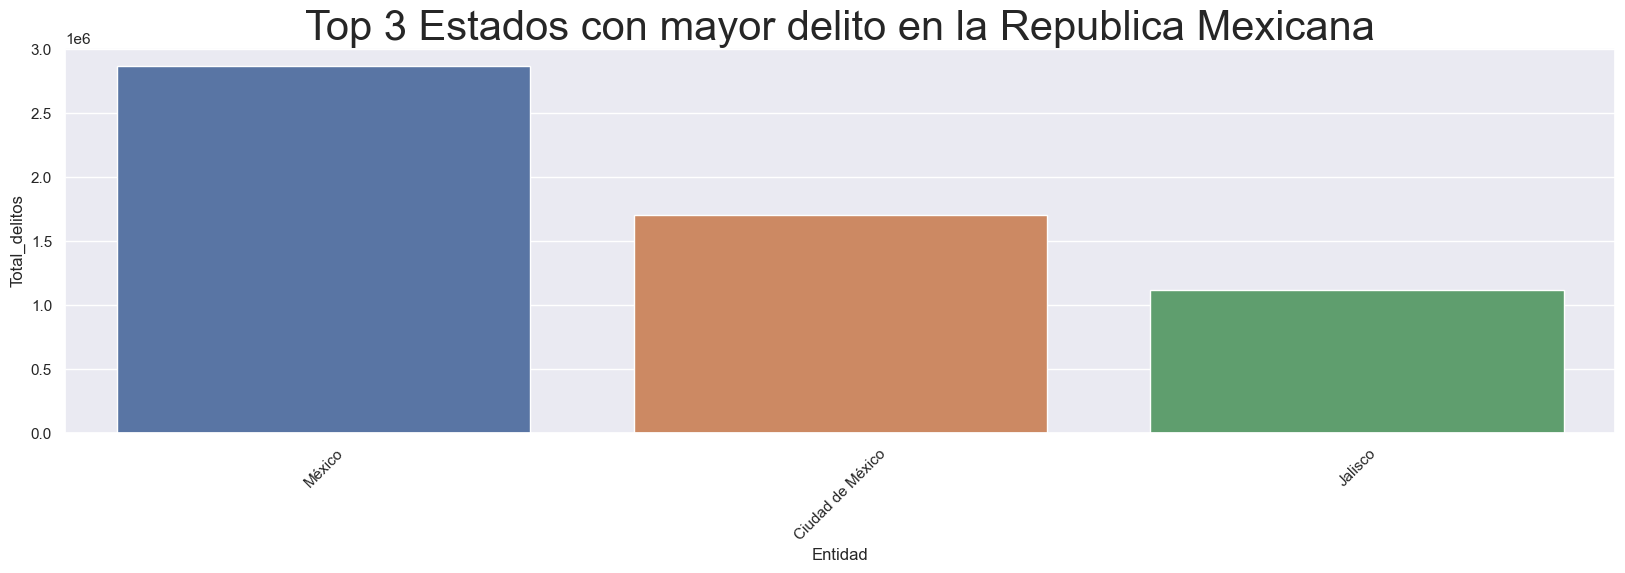

In [18]:
# Graficamos lo que obtumos en la consulta anterior
sns.set(rc = {'figure.figsize':(20,5)})
#plot = sns.lineplot( x=name, y=value)
plot = sns.barplot(data=df_top3, x='Entidad', y='Total_delitos')
plot.axes.set_title("Top 3 Estados con mayor delito en la Republica Mexicana",fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Filtramos el dataframe por la las 3 entidades con mayor delito
states = ['Ciudad de México', 'Jalisco','México']

selected_states = df_select.loc[df_select['Entidad'].isin(states)]
selected_states = selected_states.sort_values('Total_delitos', ascending=False)

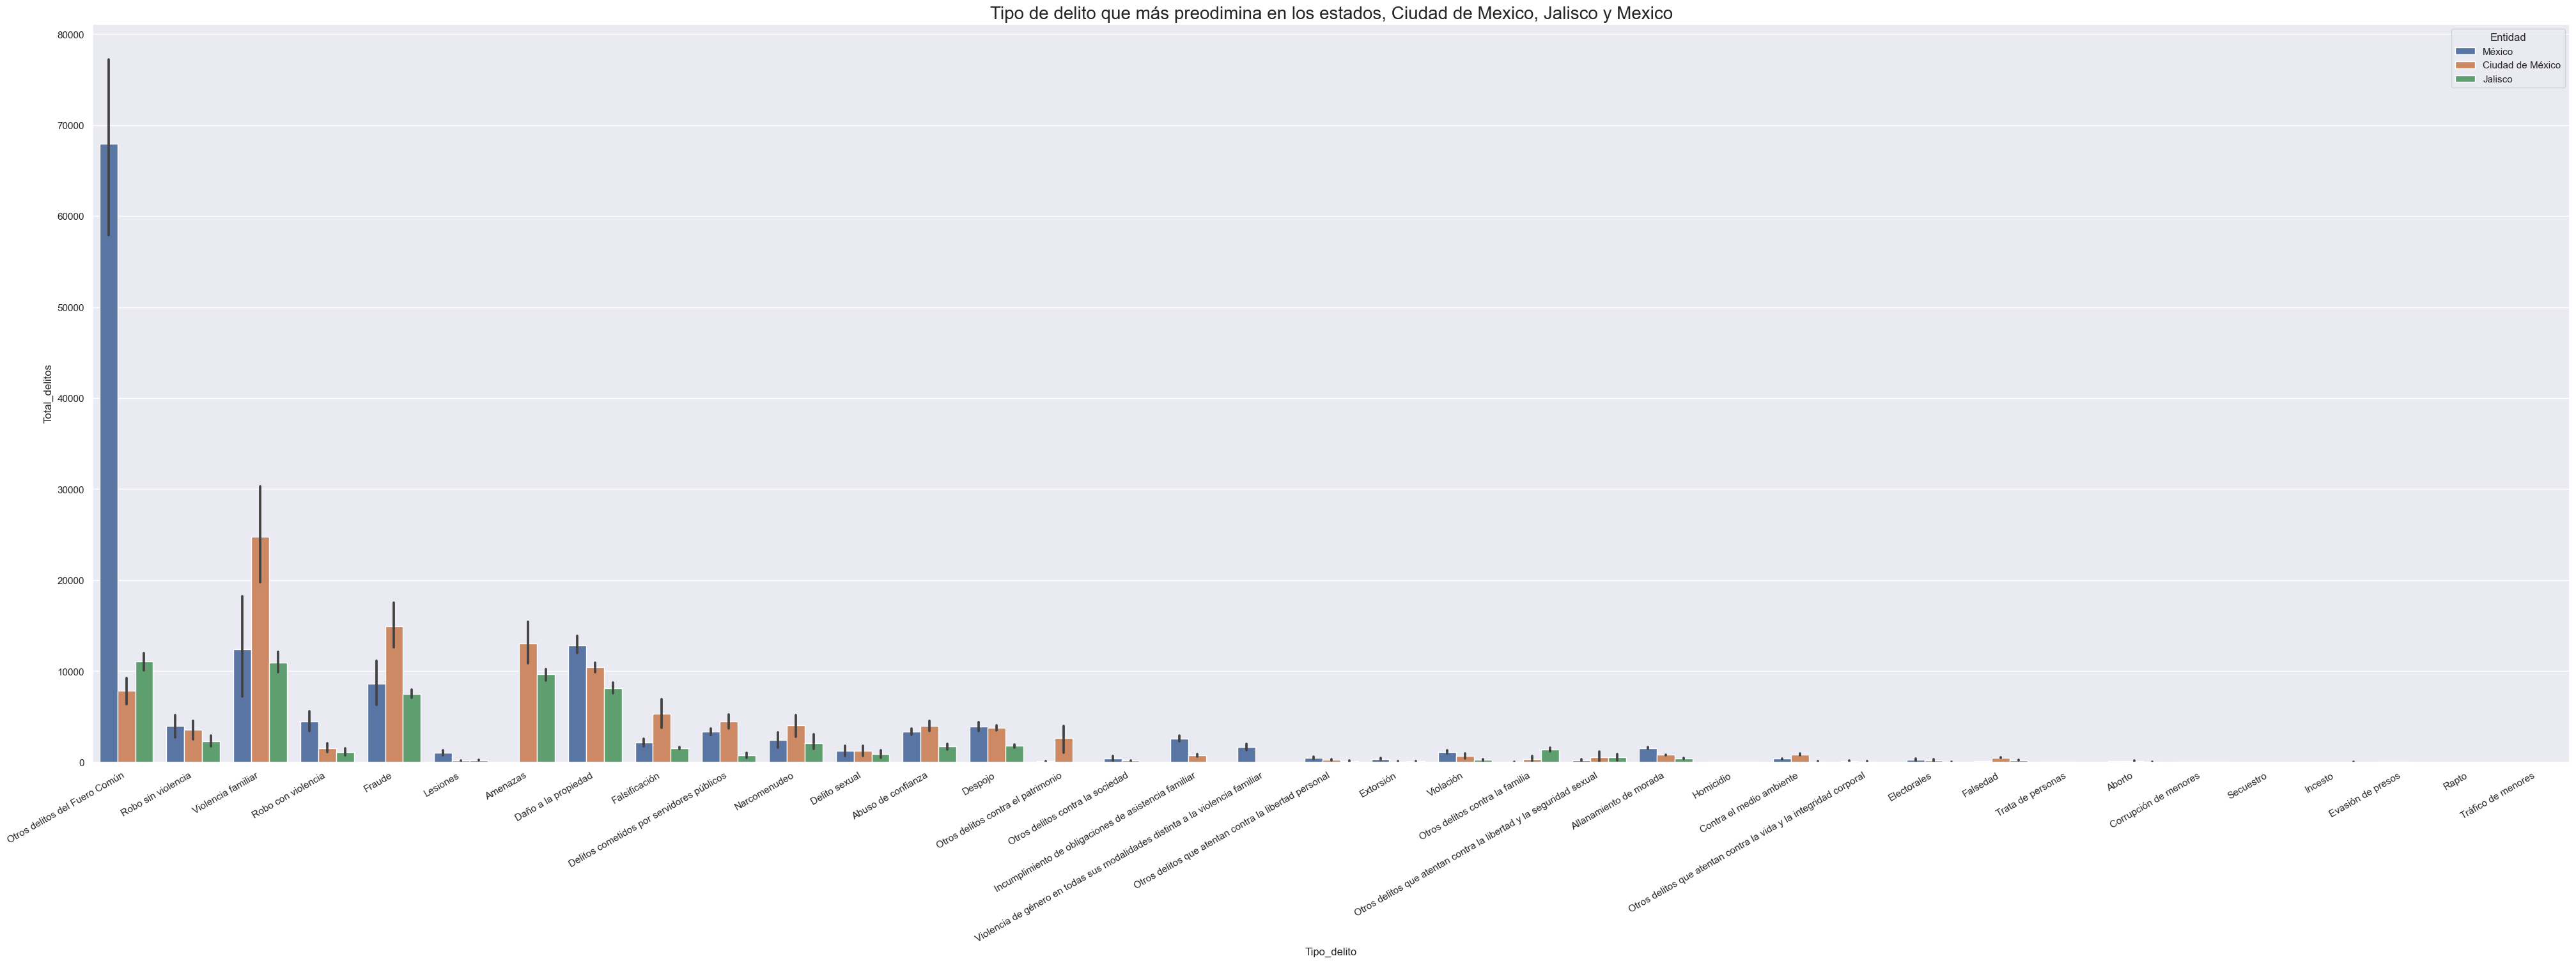

In [20]:
# Graficamos sobre los tipos de delitos que mas ocurre en el estado con mayor violencia

plt.figure(figsize=(50,15))
plot= sns.barplot(data = selected_states, x="Tipo_delito", y="Total_delitos", hue= "Entidad")
plot.axes.set_title("Tipo de delito que más preodimina en los estados, Ciudad de Mexico, Jalisco y Mexico",fontsize=20)

plt.xticks(rotation=30, ha='right')
plt.show()

### Análisis del comportamiento del Tipo de violencia con el estado con mayor violencia

In [21]:
df_Mexico = df_select[df_select['Entidad'] == 'México']
df_Mexico.reset_index()

index   Año  Clave_Ent Entidad                  Juridico_Afectado  \
0       868  2015         15  México  La libertad y la seguridad sexual   
1       869  2015         15  México  La libertad y la seguridad sexual   
2       870  2015         15  México  La libertad y la seguridad sexual   
3       871  2015         15  México  La libertad y la seguridad sexual   
4       872  2015         15  México  La libertad y la seguridad sexual   
...     ...   ...        ...     ...                                ...   
2331  72821  2022         15  México                  Libertad personal   
2332  72822  2022         15  México                      El patrimonio   
2333  72823  2022         15  México                        La sociedad   
2334  72824  2022         15  México                        La sociedad   
2335  72825  2022         15  México                        La sociedad   

                                            Tipo_delito  \
0                                         Delito sexual   
1                                         Delito sexual   
2                                         Delito sexual   
3                                             Violación   
4                                             Violación   
...                                                 ...   
2331  Otros delitos que atentan contra la libertad p...   
2332                                          Extorsión   
2333                              Corrupción de menores   
2334                                  Trata de personas   
2335                   Otros delitos contra la sociedad   

                                         Subtipo_delito  \
0                                          Abuso sexual   
1                                          Acoso sexual   
2                                  Hostigamiento sexual   
3                                      Violación simple   
4                                  Violación equiparada   
...                                                 ...   
2331  Otros delitos que atentan contra la libertad p...   
2332                                          Extorsión   
2333                              Corrupción de menores   
2334                                  Trata de personas   
2335                   Otros delitos contra la sociedad   

                                              Modalidad  Enero  Febrero  ...  \
0                                          Abuso sexual      0        0  ...   
1                                          Acoso sexual     12       17  ...   
2                                  Hostigamiento sexual      5        7  ...   
3                                      Violación simple     93       62  ...   
4                                  Violación equiparada     37       48  ...   
...                                                 ...    ...      ...  ...   
2331  Otros delitos que atentan contra la libertad p...     40       36  ...   
2332                                          Extorsión     54       48  ...   
2333                              Corrupción de menores      0        0  ...   
2334                                  Trata de personas      4        3  ...   
2335                   Otros delitos contra la sociedad    448      319  ...   

      Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  \
0       9.0   78.0    83.0        74.0    100.0       93.0       93.0   
1      17.0   15.0    10.0        10.0     19.0       17.0       11.0   
2       9.0    6.0     5.0         2.0      7.0        3.0        3.0   
3      72.0   73.0    88.0        78.0     81.0      103.0      100.0   
4      49.0   41.0    54.0        49.0     53.0       52.0       45.0   
...     ...    ...     ...         ...      ...        ...        ...   
2331   28.0   12.0    14.0         8.0     17.0        5.0       28.0   
2332  196.0   80.0    48.0        33.0     39.0       62.0       70.0   
2333    0.0    4.0     4.0         6.0      1.0        1.0        0.0

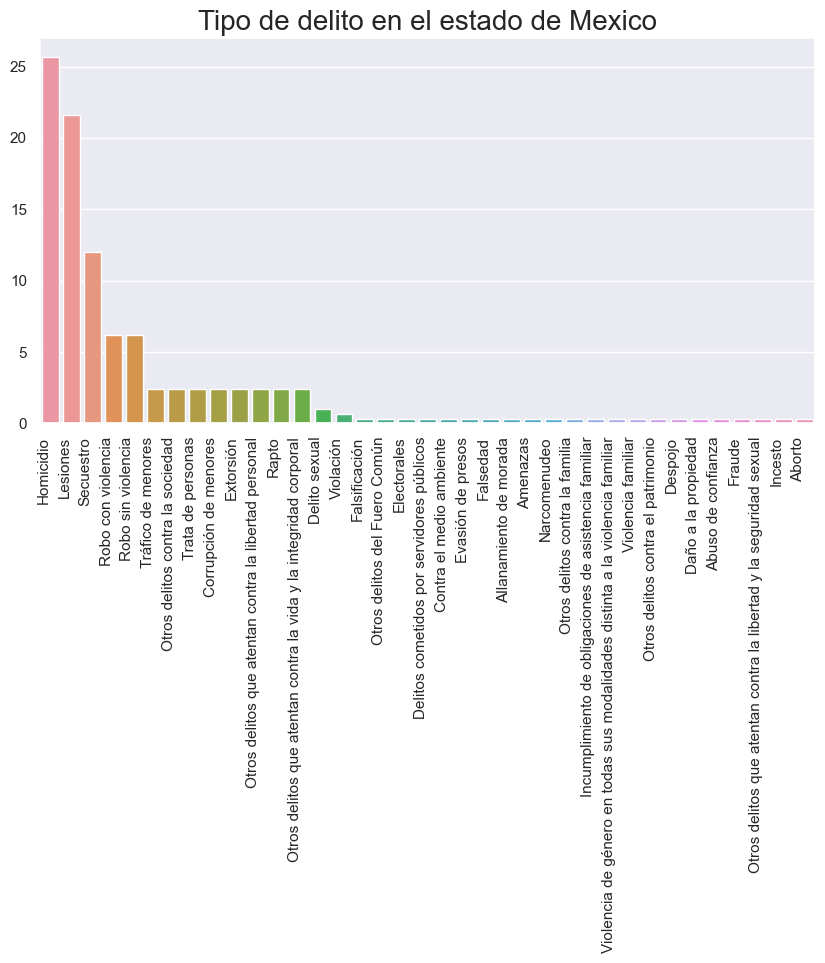

In [22]:
sns.set(rc = {'figure.figsize':(40,10)})
# Este plot es para graficar sobre los tipos de delitos que mas ocurre en el estado con mayor violencia
violencia_mexico=df_Mexico['Tipo_delito'].value_counts(normalize = True) * 100
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plot = sns.barplot(x=violencia_mexico.index, y=violencia_mexico.values)
plot.axes.set_title("Tipo de delito en el estado de Mexico",fontsize=20)
# Rotation of the bars names
plt.xticks(rotation=90, ha='right')
plt.show()

### Como es el comportamiento de la violencia en los respectivos años?

In [23]:
# Consultar la cantidad de delitos en Total por el Tipo de Homicidio
df_delitos = selected_states['Tipo_delito'].value_counts()
df_delitos

Homicidio                                                                        1800
Lesiones                                                                         1512
Secuestro                                                                         840
Robo con violencia                                                                432
Robo sin violencia                                                                432
Otros delitos que atentan contra la libertad personal                             168
Otros delitos contra la sociedad                                                  168
Rapto                                                                             168
Corrupción de menores                                                             168
Trata de personas                                                                 168
Otros delitos que atentan contra la vida y la integridad corporal                 168
Extorsión                                             

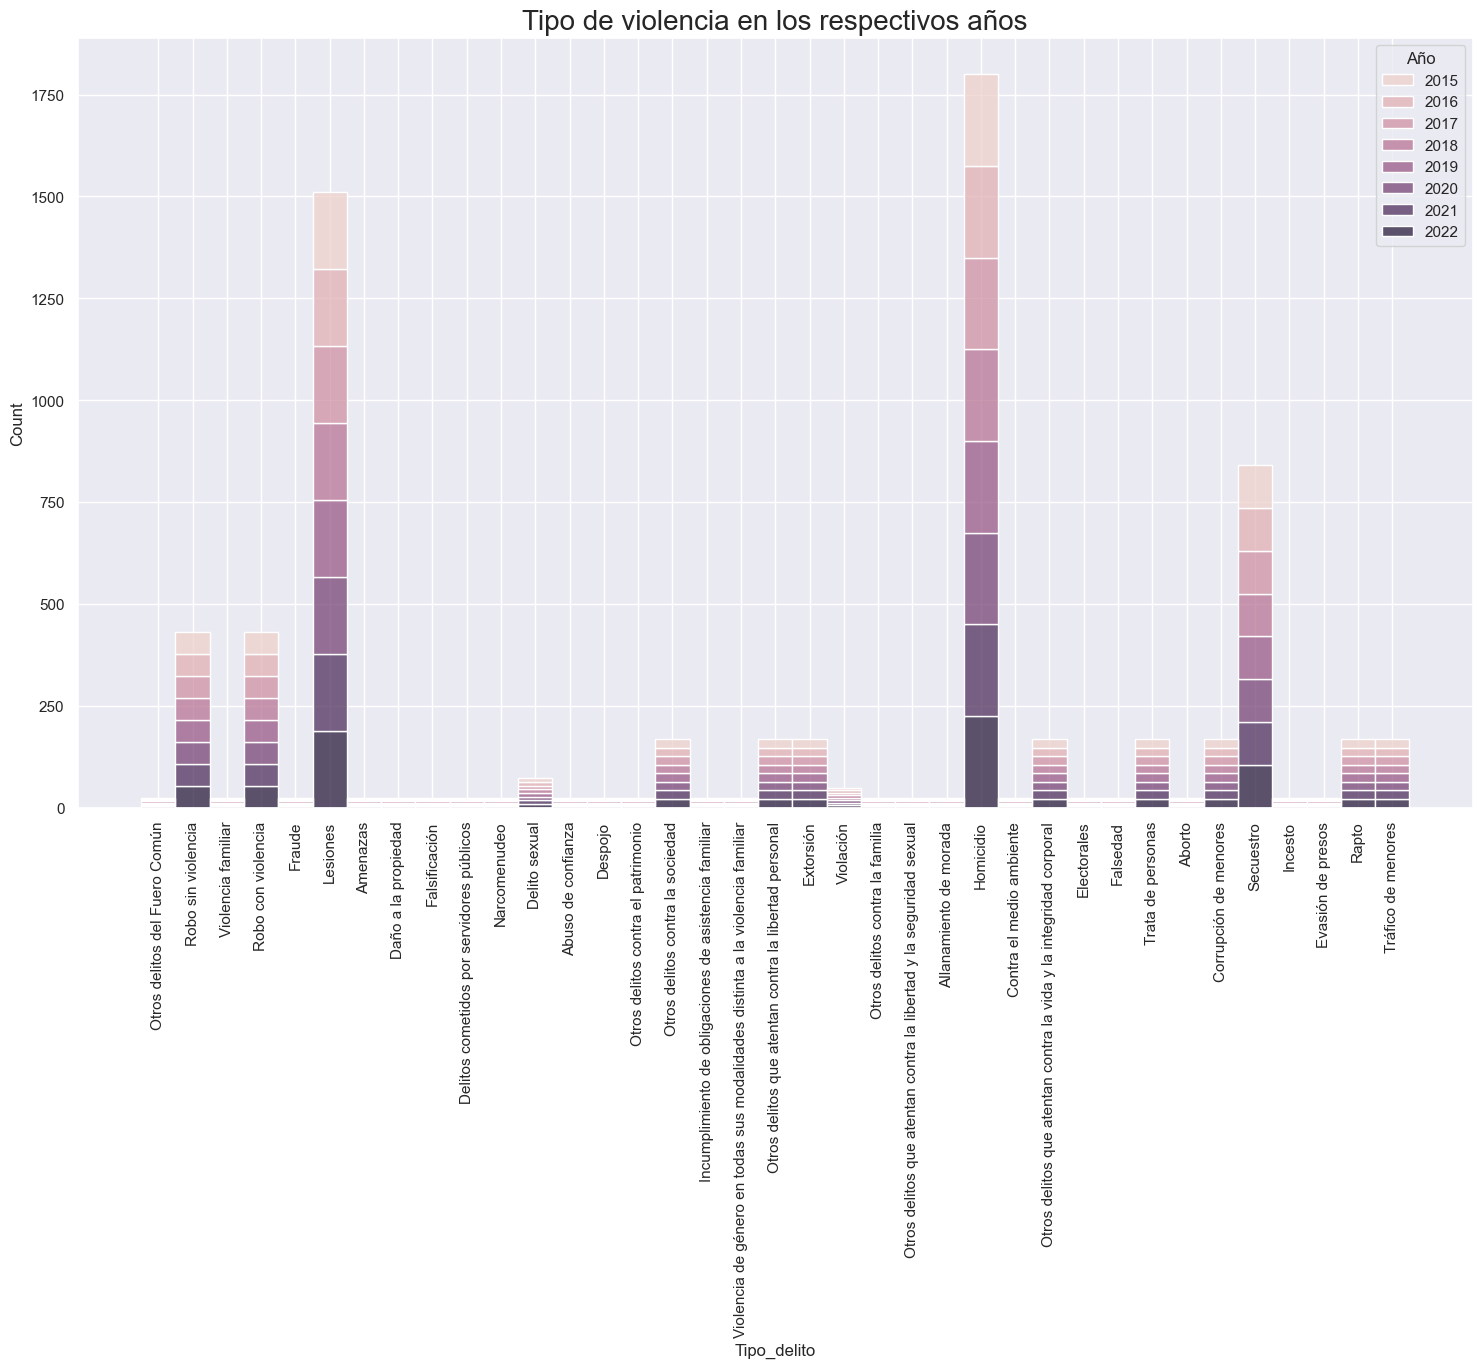

In [24]:
#Graficamos con los datos obtenidos en la consulta anterior
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)

plot = sns.histplot(data=selected_states, x='Tipo_delito', hue="Año", multiple="stack")
plot.axes.set_title("Tipo de violencia en los respectivos años",fontsize=20)

plt.show()

**Conclusión**

La comparativa del tipo de delito por los años ocurridos en el periodo 2015 hasta febrero 2023, por lo cual podemos observar que predominan mas los Homicidios ,Leciones y Secuentros.

### Comportamiento de violencia por mes en los años

In [25]:
# Agrupamos el dataframe por Año
df_año = df_Mexico.groupby('Año').sum()
df_año

Clave_Ent  Enero  Febrero    Marzo    Abril     Mayo    Junio    Julio  \
Año                                                                            
2015       4380  27064    26270  28863.0  27480.0  27629.0  27657.0  27097.0   
2016       4380  24378    29217  30779.0  31305.0  32162.0  25349.0  23673.0   
2017       4380  25028    24674  28735.0  26891.0  31104.0  30505.0  30427.0   
2018       4380  27216    26478  28578.0  29637.0  30845.0  28957.0  29007.0   
2019       4380  25508    26180  30398.0  28658.0  32728.0  31954.0  31369.0   
2020       4380  29816    30313  30666.0  25550.0  23527.0  26756.0  28954.0   
2021       4380  28032    29813  35543.0  33364.0  34445.0  33140.0  32956.0   
2022       4380  31703    31623  36929.0  34948.0  37220.0  35223.0  32345.0   

       Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total_delitos  
Año                                                                      
2015  27234.0     27515.0  28071.0    27565.0    26143.0       328588.0  
2016  25668.0     27113.0  27574.0    25988.0    26379.0       329585.0  
2017  32012.0     29796.0  33209.0    30717.0    28971.0       352069.0  
2018  30220.0     29070.0  30922.0    28165.0    26772.0       345867.0  
2019  31661.0     30902.0  32290.0    30188.0    29706.0       361542.0  
2020  30850.0     30763.0  32721.0    30569.0    29615.0       350100.0  
2021  33208.0     33345.0  35632.0    32503.0    33431.0       395412.0  
2022  33520.0     32558.0  34477.0    32459.0    31383.0       404388.0

In [26]:
# Seleccionamos solo las columnas de interes
df_filter_año =df_año.loc[:, ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]

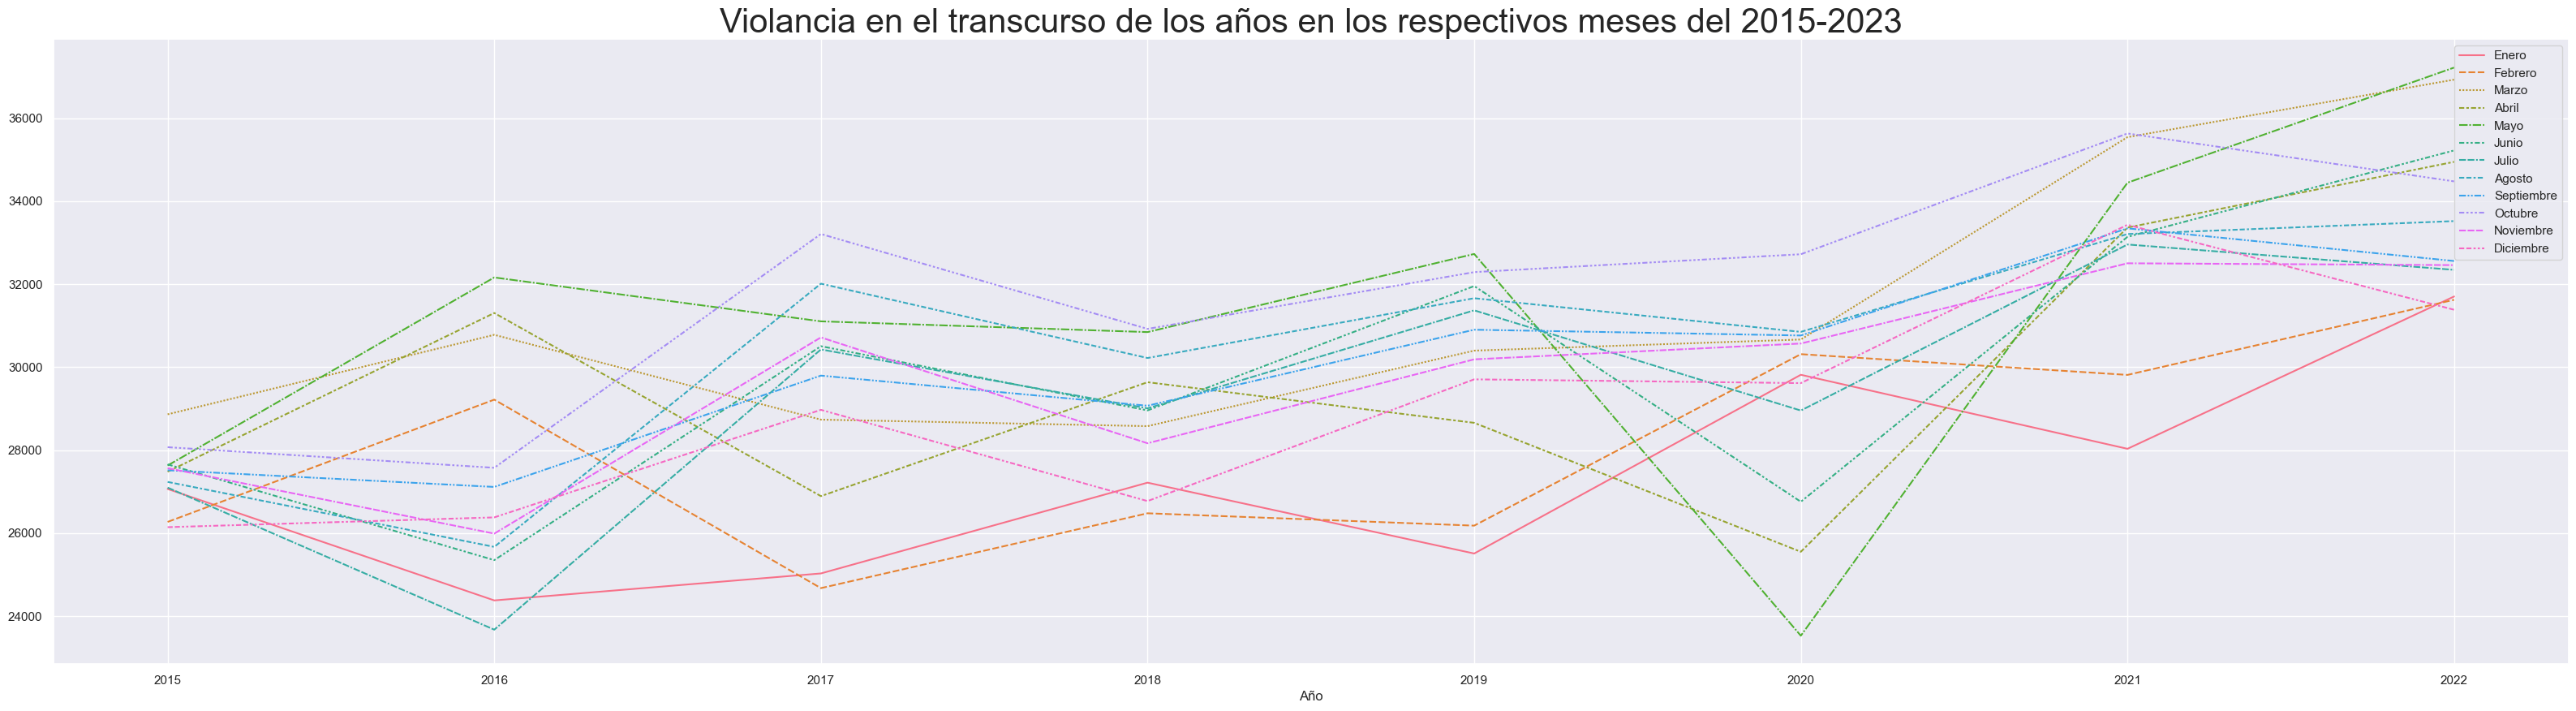

In [27]:
#Graficamos
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(40,10)})
b = sns.lineplot(data = df_filter_año)
b.axes.set_title("Violancia en el transcurso de los años en los respectivos meses del 2015-2023",fontsize=30)
plt.show()


**Conclusiones**

Se puede observar la comparativa de los meses que se cometieron los delitos por el año, ocurriendo mas en el año 2022 y tambien por no mucho 2021 predomindando mas los meses de Mayo , Marzo y Octubre

In [28]:
# Seleccionamos solo las columnas de interes
df_filter_select = df_año.loc[:, ['Marzo','Mayo','Octubre']]

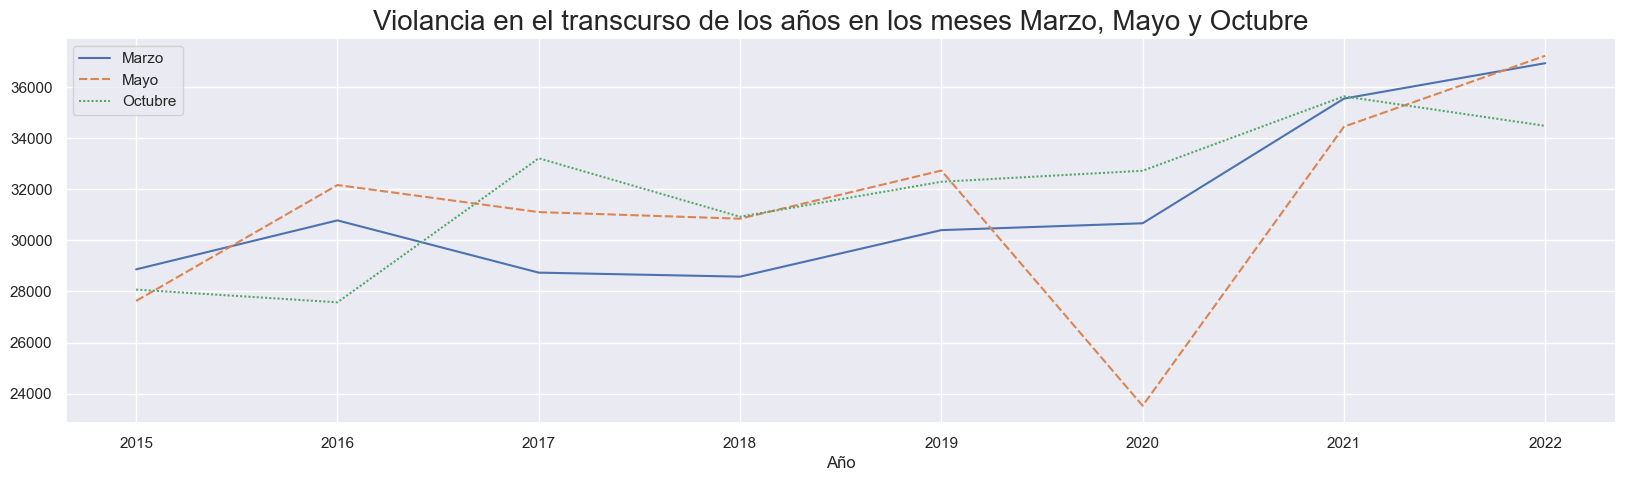

In [29]:
#Graficamos
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(20,5)})
b = sns.lineplot(data = df_filter_select)
b.axes.set_title("Violancia en el transcurso de los años en los meses Marzo, Mayo y Octubre",fontsize=20)
plt.show()

### Afectaciones comunes en la sociedad de cada mes en el periodo 2015-2023

In [30]:
# Agrupamos el dataframe por la columna "Bien juridico afectado"
df_juridico = df_Mexico.groupby('Juridico_Afectado').sum()
df_juridico

Año  Clave_Ent  \
Juridico_Afectado                                                        
El patrimonio                                        775104       5760   
La familia                                            64592        480   
La libertad y la seguridad sexual                    113036        840   
La sociedad                                          339108       2520   
La vida y la Integridad corporal                    2357608      17520   
Libertad personal                                    904288       6720   
Otros bienes jurídicos afectados (del fuero común)   161480       1200   

                                                     Enero  Febrero     Marzo  \
Juridico_Afectado                                                               
El patrimonio                                       118068   116497  127620.0   
La familia                                            8641     9594   10978.0   
La libertad y la seguridad sexual                     3018     3513    4352.0   
La sociedad                                           2112     1930    1959.0   
La vida y la Integridad corporal                     38471    41187   48754.0   
Libertad personal                                     1897     1990    2301.0   
Otros bienes jurídicos afectados (del fuero común)   46538    49857   54527.0   

                                                       Abril      Mayo  \
Juridico_Afectado                                                        
El patrimonio                                       120451.0  125032.0   
La familia                                           11449.0   11771.0   
La libertad y la seguridad sexual                     4205.0    4566.0   
La sociedad                                           1697.0    1686.0   
La vida y la Integridad corporal                     47587.0   51077.0   
Libertad personal                                     2139.0    2241.0   
Otros bienes jurídicos afectados (del fuero común)   50305.0   53287.0   

                                                       Junio     Julio  \
Juridico_Afectado                                                        
El patrimonio                                       120946.0  121310.0   
La familia                                           12158.0   11154.0   
La libertad y la seguridad sexual                     4473.0    3920.0   
La sociedad                                           1881.0    1545.0   
La vida y la Integridad corporal                     45892.0   43955.0   
Libertad personal                                     2222.0    2294.0   
Otros bienes jurídicos afectados (del fuero común)   51969.0   51650.0   

                                                      Agosto  Septiembre  \
Juridico_Afectado                                                          
El patrimonio                                       125803.0    122406.0   
La familia                                           11870.0     11766.0   
La libertad y la seguridad sexual                     4206.0      4270.0   
La sociedad                                           1775.0      1831.0   
La vida y la Integridad corporal                     44416.0     46005.0   
Libertad personal                                     2560.0      2352.0   
Otros bienes jurídicos afectados (del fuero común)   53743.0     52432.0   

                                                     Octubre  Noviembre  \
Juridico_Afectado                                                         
El patrimonio                                       129084.0   121551.0   
La familia                                           12221.0    11086.0   
La libertad y la seguridad sexual                     4636.0     4267.0   
La sociedad                                           2171.0     2005.0   
La vida y la Integridad corporal                     47744.0    44255.0   
Libertad personal                                     2533.0     2333.0   
Otros bienes jurídicos afectados (del fu

In [31]:
# Seleccionamos solo las columnas de interes de la consulta anterior
columns_select = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
df_filter_juridico = df_juridico[columns_select]
df_filter_juridico

Enero  Febrero     Marzo  \
Juridico_Afectado                                                               
El patrimonio                                       118068   116497  127620.0   
La familia                                            8641     9594   10978.0   
La libertad y la seguridad sexual                     3018     3513    4352.0   
La sociedad                                           2112     1930    1959.0   
La vida y la Integridad corporal                     38471    41187   48754.0   
Libertad personal                                     1897     1990    2301.0   
Otros bienes jurídicos afectados (del fuero común)   46538    49857   54527.0   

                                                       Abril      Mayo  \
Juridico_Afectado                                                        
El patrimonio                                       120451.0  125032.0   
La familia                                           11449.0   11771.0   
La libertad y la seguridad sexual                     4205.0    4566.0   
La sociedad                                           1697.0    1686.0   
La vida y la Integridad corporal                     47587.0   51077.0   
Libertad personal                                     2139.0    2241.0   
Otros bienes jurídicos afectados (del fuero común)   50305.0   53287.0   

                                                       Junio     Julio  \
Juridico_Afectado                                                        
El patrimonio                                       120946.0  121310.0   
La familia                                           12158.0   11154.0   
La libertad y la seguridad sexual                     4473.0    3920.0   
La sociedad                                           1881.0    1545.0   
La vida y la Integridad corporal                     45892.0   43955.0   
Libertad personal                                     2222.0    2294.0   
Otros bienes jurídicos afectados (del fuero común)   51969.0   51650.0   

                                                      Agosto  Septiembre  \
Juridico_Afectado                                                          
El patrimonio                                       125803.0    122406.0   
La familia                                           11870.0     11766.0   
La libertad y la seguridad sexual                     4206.0      4270.0   
La sociedad                                           1775.0      1831.0   
La vida y la Integridad corporal                     44416.0     46005.0   
Libertad personal                                     2560.0      2352.0   
Otros bienes jurídicos afectados (del fuero común)   53743.0     52432.0   

                                                     Octubre  Noviembre  \
Juridico_Afectado                                                         
El patrimonio                                       129084.0   121551.0   
La familia                                           12221.0    11086.0   
La libertad y la seguridad sexual                     4636.0     4267.0   
La sociedad                                           2171.0     2005.0   
La vida y la Integridad corporal                     47744.0    44255.0   
Libertad personal                                     2533.0     2333.0   
Otros bienes jurídicos afectados (del fuero común)   56507.0    52657.0   

                                                    Diciembre  
Juridico_Afectado                                              
El patrimonio                                        117862.0  
La familia                                            10787.0  
La libertad y la seguridad sexual                      3787.0  
La sociedad                                            2086.0  
La vida y la Integridad corporal                      44148.0  
Libertad personal                                      2260.0  
Otros bienes jurídicos afectados (del fuero común)    51470.0

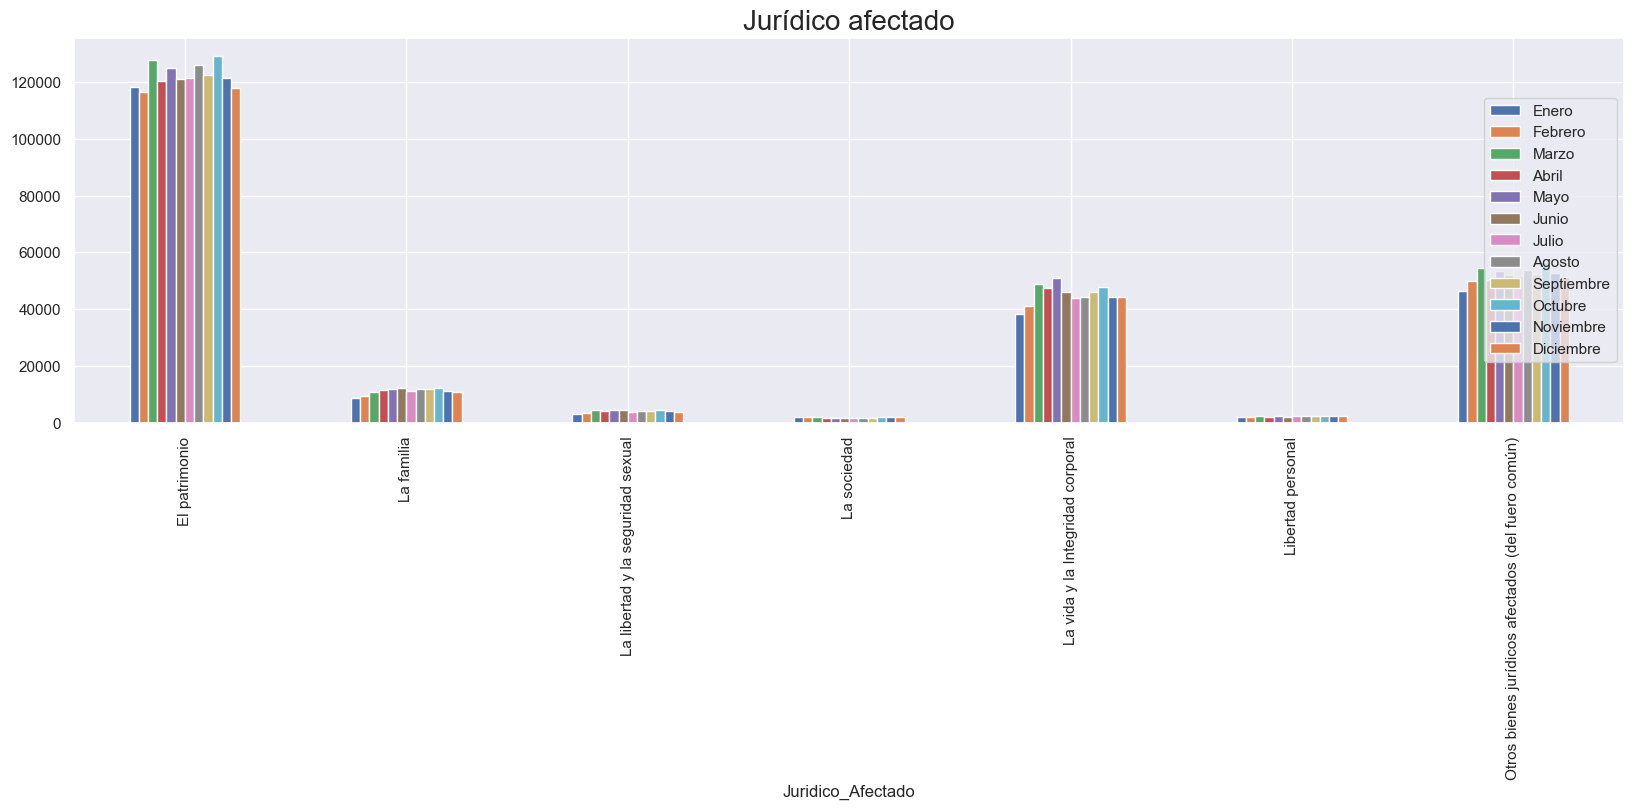

In [32]:
#Graficamos
sums=df_filter_juridico.sum(axis=1)
plot = df_filter_juridico.plot.bar();
plt.legend(loc='center right')
plot.axes.set_title("Jurídico afectado",fontsize=20)
plt.show()

**Conclusión**

Las afectaciones mas comunes a la sociendad es el Patrimonio en cualquiera de los meses del año

### Relacion de la Modalidad con el Tipo de delito

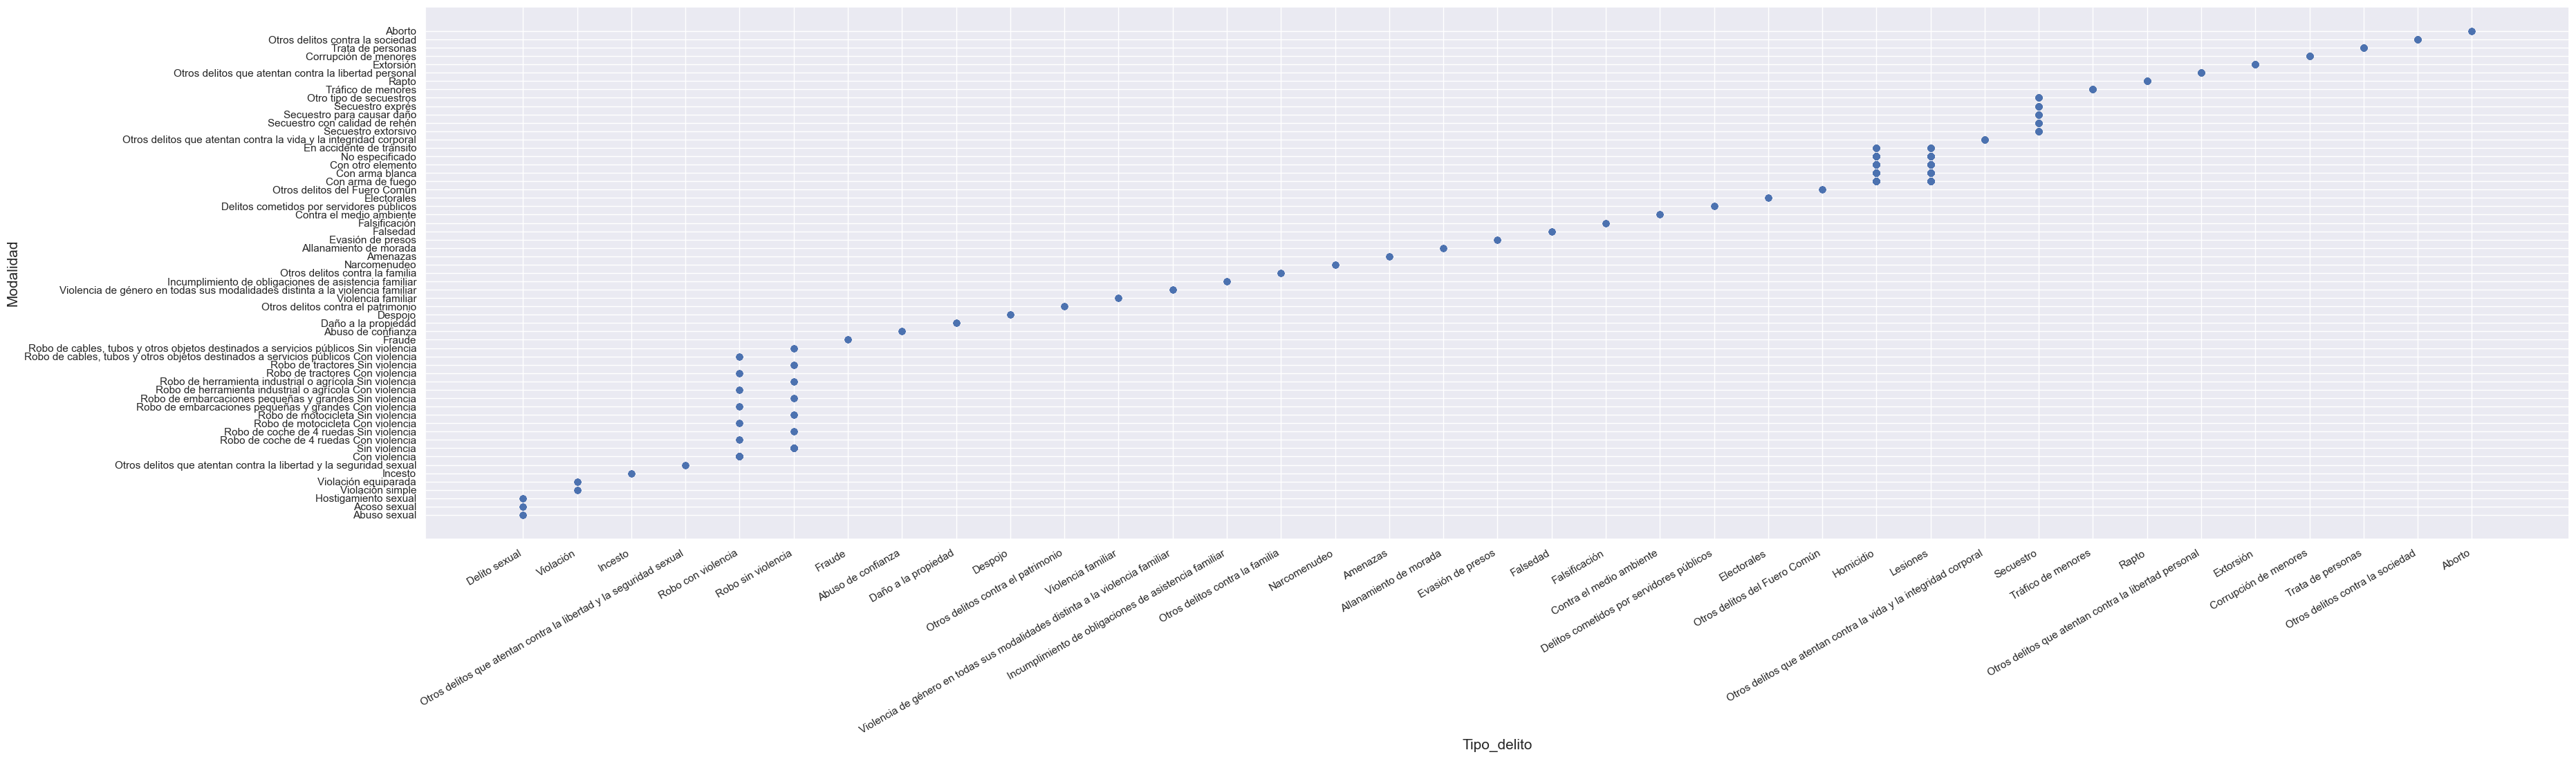

In [33]:
# Graficamos de la Relacion de la modalidad con el Tipo de delito
fig = plt.figure(figsize = (40, 10))

# Crear Grafica
plt.scatter(df_Mexico['Tipo_delito'], df_Mexico['Modalidad'])

plt.xlabel("Tipo_delito", fontsize=15)
plt.ylabel("Modalidad", fontsize=15)
plt.xticks(rotation=30, ha='right')
plt.show()

**Conclusión**

Se realizo una comparacion entre el delito y la modalidad en que se realizo, la modalidad es en como se realizaron tales delitos, podemos observar que en los Homicidios y Lesiones se da muy amenudo con Armar de fuego, arma blanca,y en accidente de trafico.

### Afecciones de la Edad con  el Tipo de delito

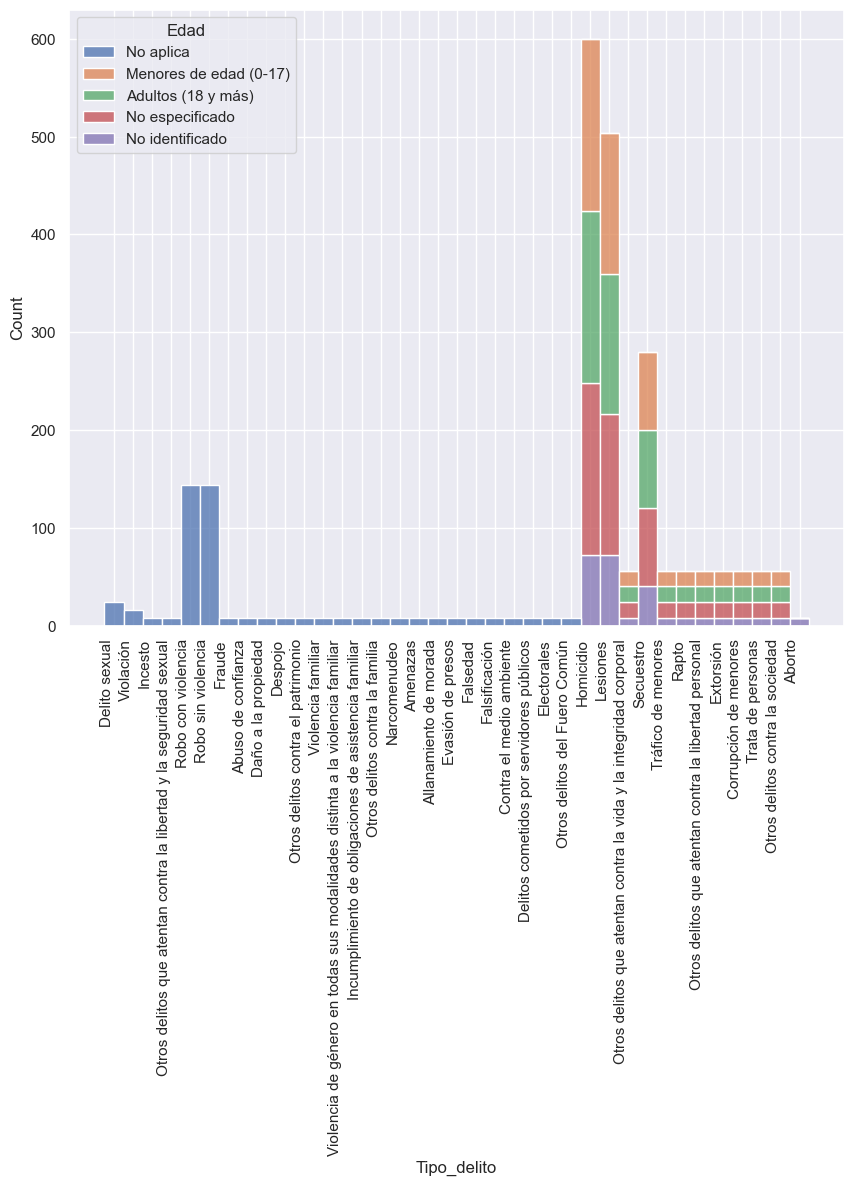

In [34]:
# Graficamos de la Relacion de la Edad con el Tipo de delito

plt.figure(figsize=(10,8))
sns.histplot(data=df_Mexico, x='Tipo_delito' , hue="Edad", multiple="stack")
plt.xticks(rotation=90, ha='right')
plt.xticks(rotation=90, ha='right')
plt.show()

**Conclusión**

De acuerdo al resultado de la gráfica, la comparacion de la Edad con los tipo de delitos, las cuales tanto de menores de edad 0-17 años y adultos de 18 y más años y asi como los no Especificados sufren de igual forma violencia como es en Homicidios, Leciones y Secuentros

### Afecciones de Usuarios con  el Tipo de delito

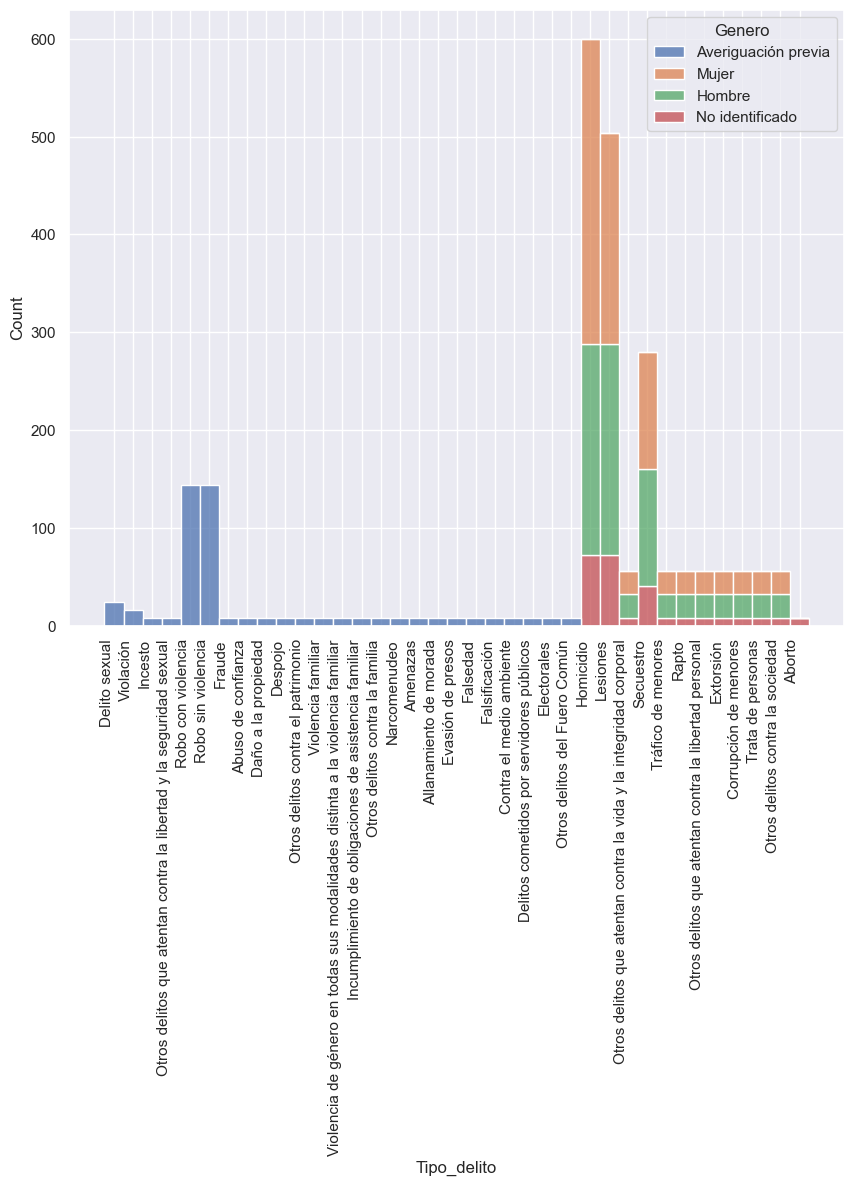

In [35]:
# Graficamos de la Relacion del Genero con el Tipo de delito

plt.figure(figsize=(10,8))
sns.histplot(data=df_Mexico, x='Tipo_delito' , hue="Genero", multiple="stack")
plt.xticks(rotation=90, ha='right')
plt.show()

**Conclusión**

De acuerdo a la comparacion de quienes eran los que sufren mas estos delitos, la cual se observa que es la Mujer que es las mas vulnerable ante estas situaciones seguido por los Hombres

In [36]:
df_filter_año

Enero  Febrero    Marzo    Abril     Mayo    Junio    Julio   Agosto  \
Año                                                                          
2015  27064    26270  28863.0  27480.0  27629.0  27657.0  27097.0  27234.0   
2016  24378    29217  30779.0  31305.0  32162.0  25349.0  23673.0  25668.0   
2017  25028    24674  28735.0  26891.0  31104.0  30505.0  30427.0  32012.0   
2018  27216    26478  28578.0  29637.0  30845.0  28957.0  29007.0  30220.0   
2019  25508    26180  30398.0  28658.0  32728.0  31954.0  31369.0  31661.0   
2020  29816    30313  30666.0  25550.0  23527.0  26756.0  28954.0  30850.0   
2021  28032    29813  35543.0  33364.0  34445.0  33140.0  32956.0  33208.0   
2022  31703    31623  36929.0  34948.0  37220.0  35223.0  32345.0  33520.0   

      Septiembre  Octubre  Noviembre  Diciembre  
Año                                              
2015     27515.0  28071.0    27565.0    26143.0  
2016     27113.0  27574.0    25988.0    26379.0  
2017     29796.0  33209.0    30717.0    28971.0  
2018     29070.0  30922.0    28165.0    26772.0  
2019     30902.0  32290.0    30188.0    29706.0  
2020     30763.0  32721.0    30569.0    29615.0  
2021     33345.0  35632.0    32503.0    33431.0  
2022     32558.0  34477.0    32459.0    31383.0

### Incremento de violencia por año

In [37]:
# Resetemos el index de la consulta anterior de df_filter_año
df_incremento = df_filter_año.reset_index()
df_incremento

Año  Enero  Febrero    Marzo    Abril     Mayo    Junio    Julio   Agosto  \
0  2015  27064    26270  28863.0  27480.0  27629.0  27657.0  27097.0  27234.0   
1  2016  24378    29217  30779.0  31305.0  32162.0  25349.0  23673.0  25668.0   
2  2017  25028    24674  28735.0  26891.0  31104.0  30505.0  30427.0  32012.0   
3  2018  27216    26478  28578.0  29637.0  30845.0  28957.0  29007.0  30220.0   
4  2019  25508    26180  30398.0  28658.0  32728.0  31954.0  31369.0  31661.0   
5  2020  29816    30313  30666.0  25550.0  23527.0  26756.0  28954.0  30850.0   
6  2021  28032    29813  35543.0  33364.0  34445.0  33140.0  32956.0  33208.0   
7  2022  31703    31623  36929.0  34948.0  37220.0  35223.0  32345.0  33520.0   

   Septiembre  Octubre  Noviembre  Diciembre  
0     27515.0  28071.0    27565.0    26143.0  
1     27113.0  27574.0    25988.0    26379.0  
2     29796.0  33209.0    30717.0    28971.0  
3     29070.0  30922.0    28165.0    26772.0  
4     30902.0  32290.0    30188.0    29706.0  
5     30763.0  32721.0    30569.0    29615.0  
6     33345.0  35632.0    32503.0    33431.0  
7     32558.0  34477.0    32459.0    31383.0

In [38]:
df_incremento = df_incremento.set_index('Año')

In [39]:
#Sumamos los delitos por año
sums=df_incremento.sum(axis=1)
sums

Año
2015    328588.0
2016    329585.0
2017    352069.0
2018    345867.0
2019    361542.0
2020    350100.0
2021    395412.0
2022    404388.0
dtype: float64

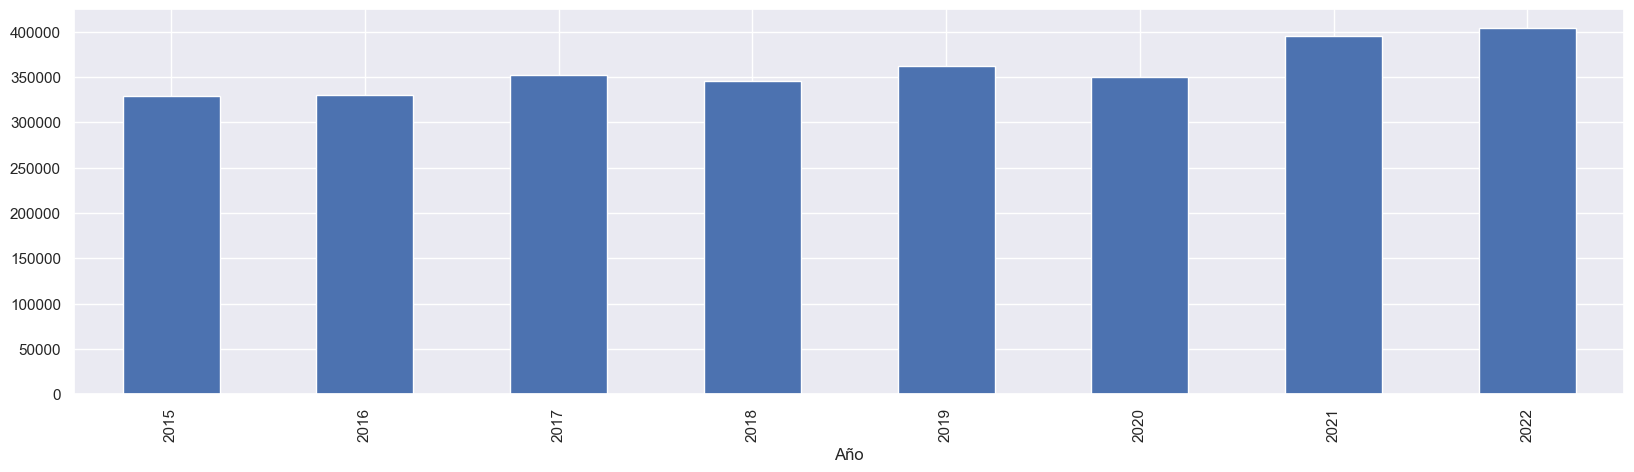

In [40]:
sums.plot.bar();


**Conclusión**

Se observa que para el Estado de Mexico hubo un incremento de delitos en los años 2021 y 2022, no podemos hablar mucho de 2023 ya que solo tenemos datos hasta el mes de febrero

# **4. Encoding**

En este proyecto, se aplicaron técnicas de encoding en un conjunto de datos de delitos. Se utilizó Label Encoding para asignar valores numéricos a las categorías de la columna 'Tipo de delito' y One-Hot Encoding para crear variables binarias para las columnas seleccionadas. El objetivo fue transformar las variables categóricas en representaciones numéricas para su posterior análisis y modelado predictivo.

In [41]:
# Copiamos el DataFrame desde el filtrado de Mexico
data = df_Mexico.copy()

# Label Encoding
label_encoder = LabelEncoder()
data['Tipo_delito_encoded'] = label_encoder.fit_transform(data['Tipo_delito'])

# One-Hot Encoding
columns_to_encode = ['Entidad', 'Juridico_Afectado', 'Subtipo_delito', 'Modalidad',
                     'Genero', 'Edad']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(data[columns_to_encode])
encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# Concatenamos los DataFrames codificados
data = pd.concat([data, encoded_df], axis=1)

# Mostramos el DataFrame resultante
print(data)


         Año  Clave_Ent Entidad                  Juridico_Afectado  \
868   2015.0       15.0  México  La libertad y la seguridad sexual   
869   2015.0       15.0  México  La libertad y la seguridad sexual   
870   2015.0       15.0  México  La libertad y la seguridad sexual   
871   2015.0       15.0  México  La libertad y la seguridad sexual   
872   2015.0       15.0  México  La libertad y la seguridad sexual   
...      ...        ...     ...                                ...   
2331     NaN        NaN     NaN                                NaN   
2332     NaN        NaN     NaN                                NaN   
2333     NaN        NaN     NaN                                NaN   
2334     NaN        NaN     NaN                                NaN   
2335     NaN        NaN     NaN                                NaN   

        Tipo_delito        Subtipo_delito             Modalidad  Enero  \
868   Delito sexual          Abuso sexual          Abuso sexual    0.0   
869   Delit

### Conclusion 
En este proyecto, se utilizó encoding para convertir variables categóricas en representaciones numéricas. El Label Encoding permitió asignar valores numéricos a las categorías de la columna 'Tipo de delito', lo que facilita su procesamiento en modelos de aprendizaje automático. Por otro lado, el One-Hot Encoding creó variables binarias para las columnas seleccionadas, lo que amplió la representación de las categorías sin introducir un orden implícito. Estas técnicas de encoding resultaron útiles para transformar los datos categóricos y prepararlos para su posterior análisis y modelado predictivo.

# **5. Feature Engineering**

---

Con el análisis exploratorio de datos se identificaron las variables mas importantes para la predicción de la tasa de delitos por año:

Año: tiempo en años que el se han cometidos los delitos
Enero-Diciembre: el tiempo en meses que se ha cometido los delitos
Total delitos: Total de delitos (suma de los meses) que se cometerion los delitos

<AxesSubplot:>

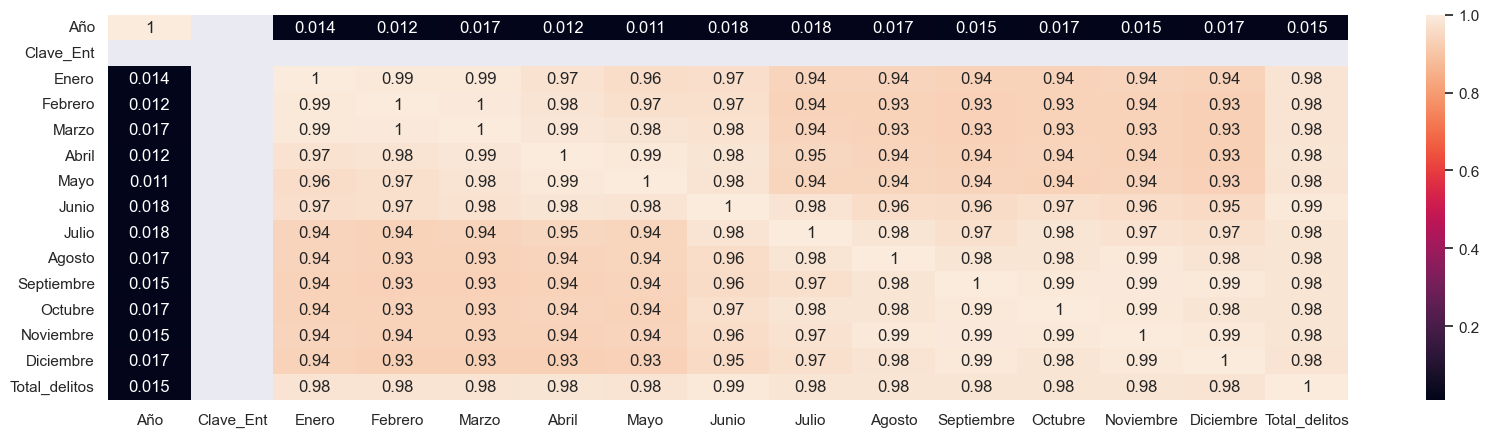

In [42]:
correlation_matrix = df_Mexico.corr() # calculamos la matriz de correlación
sns.heatmap(correlation_matrix, annot=True) # mostramos un mapa de calor de la matriz de correlación

El proceso de Binning en la selección de características se utilizó para transformar los datos numéricos continuos del 'Total delitos' en categorías discretas ('Bajo', 'Medio', 'Alto'). Esto facilita el análisis y la interpretación de la relación entre la cantidad de delitos y otras características.

In [43]:
# Definimos los límites de los bins
bins = [100, 1000, 10000, np.inf]
# Definimos los nombres de los grupos
names = ['Bajo', 'Medio', 'Alto']

# Creamos una nueva columna con las categorías
df_Mexico['Total_delitos_binned'] = pd.cut(df_Mexico['Total_delitos'], bins, labels=names)

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/3556685414.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico['Total_delitos_binned'] = pd.cut(df_Mexico['Total_delitos'], bins, labels=names)


In [44]:
# Creamos una nueva columna que es la interacción de 'Entidad' y 'Tipo_delito'
df_Mexico['Entidad_TipoDelito'] = df_Mexico['Entidad'] + "_" + df_Mexico['Tipo_delito']

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/782685992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico['Entidad_TipoDelito'] = df_Mexico['Entidad'] + "_" + df_Mexico['Tipo_delito']


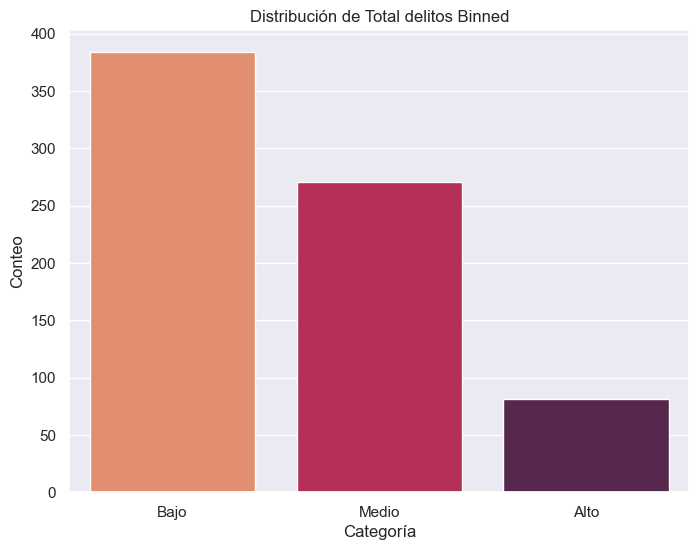

In [45]:
# Realizamos un conteo de los valores únicos en 'Total_delitos_binned'
conteo_binned = df_Mexico['Total_delitos_binned'].value_counts()

# Creamos un gráfico de barras con los conteos
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_binned.index, y=conteo_binned.values, palette="rocket_r")
plt.title('Distribución de Total delitos Binned')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

La implementación de la técnica de binning ha facilitado una distribución comprensible y visualmente clara de los delitos en tres categorías definidas: 'Bajo', 'Medio' y 'Alto'. Este enfoque proporciona una perspectiva más manejable y directa del dataset, convirtiendo la problemática en una tarea de clasificación más que de regresión. 

Adicionalmente, la categorización en estos grupos permite explorar con mayor detalle la incidencia delictiva en cada nivel, apoyando el análisis comparativo entre los estados y la creación de estrategias enfocadas para cada uno de estos grupos de incidencia delictiva.

## 5.1 Creacion de variable sintetica

In [46]:
# Eliminamos los valores nulos que se hayan agregado y lo rellenamos con valores promedios
df_Mexico = df_Mexico.dropna()
df_Mexico = df_Mexico.fillna(df_Mexico.mean())
df_Mexico = df_Mexico.replace([np.inf, -np.inf], np.nan)
df_Mexico = df_Mexico.fillna(df_Mexico.mean())

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/4213961712.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Mexico = df_Mexico.fillna(df_Mexico.mean())
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/4213961712.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Mexico = df_Mexico.fillna(df_Mexico.mean())


In [47]:
# Crear una variable sintética
df_Mexico['log_Total_delitos'] = np.log(df_Mexico['Total_delitos'])

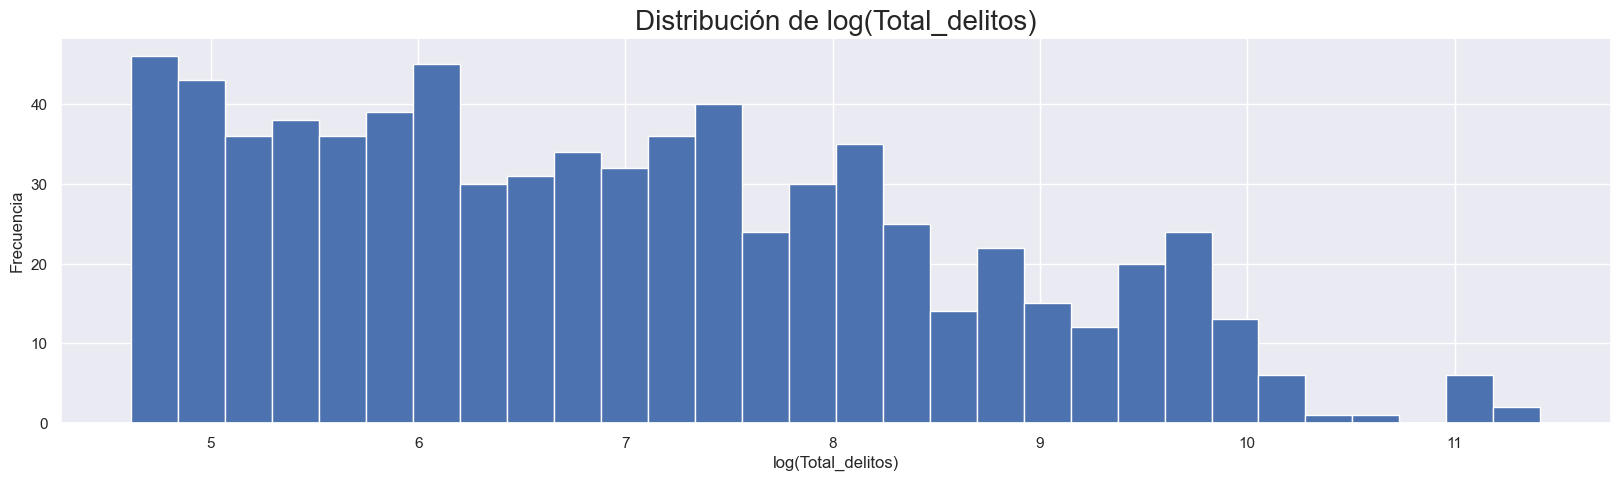

In [48]:
plt.hist(df_Mexico['log_Total_delitos'], bins=30)
plt.title('Distribución de log(Total_delitos)', fontsize=20)
plt.xlabel('log(Total_delitos)')
plt.ylabel('Frecuencia')
plt.show()


Crear una variable sintética, como 'log_Total_delitos', puede ayudarnos a linealizar la relación en nuestros datos y a manejar los datos muy dispersos. Al visualizar el histograma, podemos observar cómo se distribuyen los datos después de la transformación logarítmica.

# 6. Entrenando modelos de ML
---


Vamos a entrenar un modelo de regresión Lineal para predecir el total de delitos que surgiran en los proximos años en el Estado de México

In [49]:
df_prediction = df_año.reset_index()

In [50]:
# Seleccionar variables predictoras (X) y variable objetivo (y)
X = df_prediction[['Año']]
y = df_prediction['Total_delitos']

## 6.1 Regresión Lineal

In [58]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test)

# Evaluar el modelo
print('R²:', reg.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.8804042181999306
MSE: 129557928.90751736


El modelo de regresión lineal utilizando las variables de año y total de delitos tiene un coeficiente de determinación R² de 0.880, lo que indica que solo el 23% de la variabilidad en los datos de crimenes se explica por estas variables. El error cuadrático medio es alto, sugiriendo que el modelo no es muy preciso en las predicciones. Es posible que se necesiten más variables o un enfoque diferente para mejorar la capacidad de predicción.

## 6.2 Regresión Polinómica

In [59]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Transformar los datos a polinomios de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test_poly)

# Evaluar el modelo
print('R²:', reg.score(X_test_poly, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.8941836721527594
MSE: 114630667.35418418


En el caso de la regresión polinómica, el coeficiente de determinación R² es de 0.894, lo que indica que alrededor del 85.96% de la variabilidad en los datos de crimenes puede ser explicada por el modelo que utiliza la regresión polinómica. El error cuadrático medio (MSE) es de 156775846.49308032, lo que indica una mejora significativa en comparación con la regresión lineal. Estos resultados sugieren que la regresión polinómica es más adecuada para capturar la complejidad de los datos y realizar predicciones más precisas en este caso.

## 6.3 Árboles de decisión

In [60]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test)

# Evaluar el modelo
print('R²:', reg.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.6445388320218264
MSE: 163137100.5


Utilizando el modelo de árboles de decisión, se obtuvo un coeficiente de determinación R² de 0.644, lo que indica que alrededor del 57.18% de la variabilidad en los datos de crimenes puede ser explicada por este modelo. El error cuadrático medio (MSE) es de 293049416.0, lo que sugiere una precisión moderada en las predicciones. Comparado con la regresión polinómica, el rendimiento del modelo de árboles de decisión es inferior, pero puede ser una opción viable dependiendo del contexto y de las necesidades del problema en particular.

### Conclusion 

En este caso de predicción de crímenes, se encontró que la regresión, en lugar de la clasificación, fue más apropiada. La regresión lineal, polinómica y de árboles de decisión se utilizaron para predecir el número de crímenes, obteniendo resultados significativos en términos de coeficiente de determinación R² y error cuadrático medio (MSE). Esto destaca la importancia de seleccionar el enfoque adecuado según la naturaleza de los datos y la variable objetivo a predecir.

# 7. Optimización y selección de modelo

De acuerdo a los resultados anteriores se escogio el Modelo de Regresión polinómica ya que nos dio una mejor presicion con un 0.8 en compraracion con los otros modelos

In [61]:
df_año = df_año.reset_index()

In [62]:
# Usamos las columnas año y Total_delitos
X = df_año['Año'].values.reshape(-1,1)
Y = df_año['Total_delitos'].values

In [64]:
# Creamos una instancia de PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [65]:
# Transformamos las características existentes a características de mayor grado
X_poly = poly.fit_transform(X)


In [66]:
# Definimos el modelo de regresión
poly_reg = LinearRegression()

In [67]:
# Entrenamos el modelo con las características de mayor grado
poly_reg.fit(X_poly, Y)

LinearRegression()

In [68]:
# Creamos un array de valores X para representar el rango de años en el que queremos hacer la predicción
X_pred = np.arange(2015, 2030, 0.1).reshape(-1,1)

In [69]:
# Transformamos los valores X de la predicción a características de mayor grado
X_pred_poly = poly.transform(X_pred)

In [70]:
# Hacemos la predicción
Y_pred = poly_reg.predict(X_pred_poly)


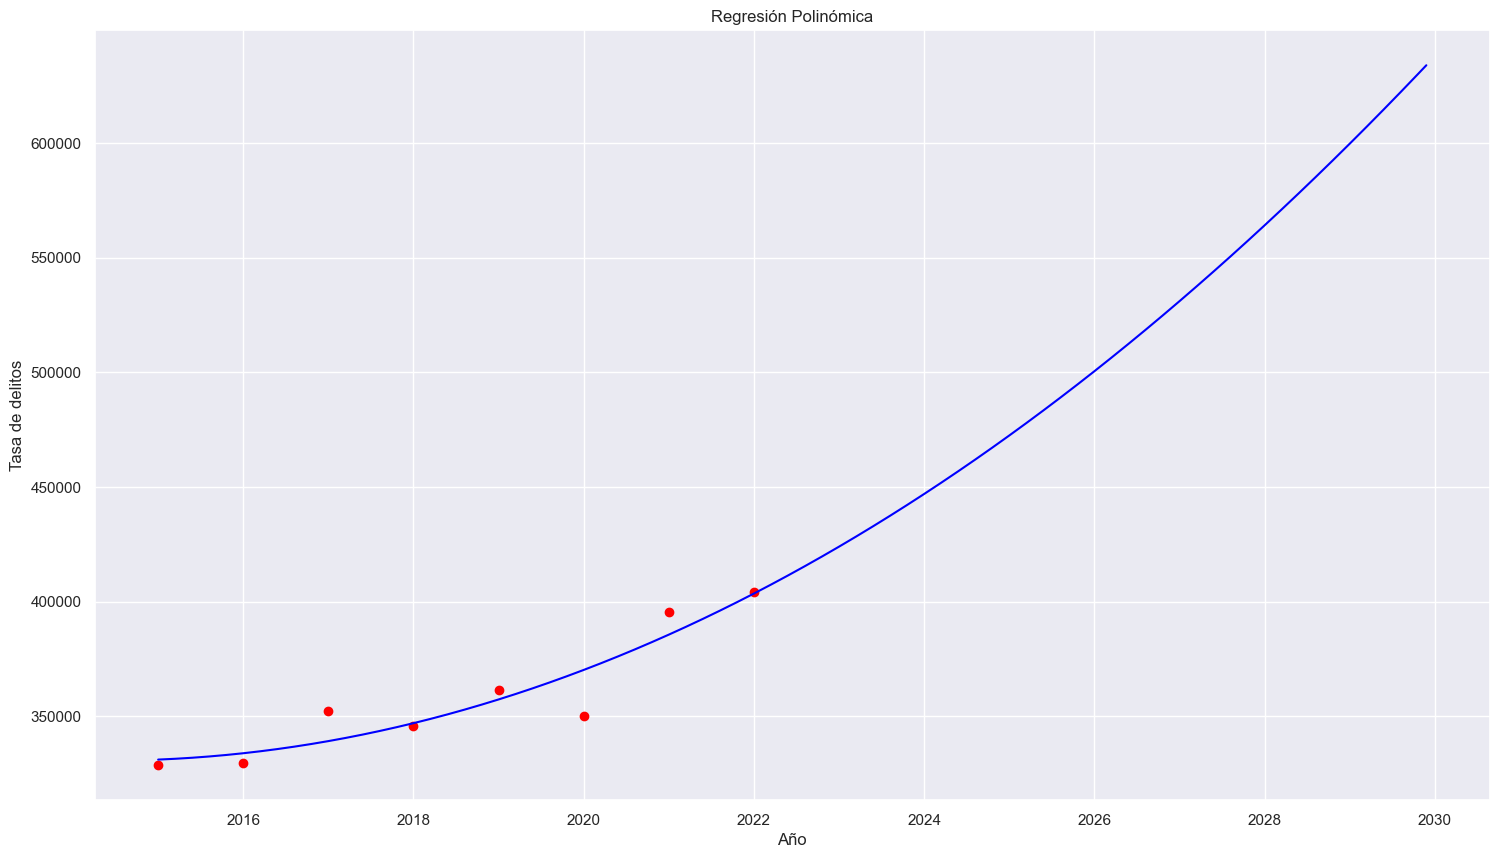

In [71]:
# Graficamos
plt.figure(figsize=(18,10))
plt.scatter(X, Y, color='red')
plt.plot(X_pred, Y_pred, color='blue')
plt.title('Regresión Polinómica')
plt.xlabel('Año')
plt.ylabel('Tasa de delitos')
plt.show()

# 8 Probando un nuevo modelo Random Forest

In [72]:
X = pd.get_dummies(df_Mexico.drop('Total_delitos', axis=1)) 
y = df_Mexico['Total_delitos']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Evaluación del Modelo:

In [73]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 928523.829213513
R-squared: 0.9880595355932144


En el caso de Random Forest, el coeficiente de determinación R² es de 0.988, lo que indica que alrededor del 98.66% lo cual es mucho mejor que la Regresion polinomoca

In [74]:
# Creamos un DataFrame con los valores reales y las predicciones
df_comparison = pd.DataFrame({'Año': X_test['Año'], 'Valores Reales': y_test, 'Entrenamiento': predictions})

# Reestablecemos el índice para que sea un rango numérico
df_comparison = df_comparison.reset_index(drop=True)

# Calculamos la diferencia entre los valores reales y las predicciones
df_comparison['Diferencia'] = df_comparison['Valores Reales'] - df_comparison['Entrenamiento']

In [75]:
# Imprimir el DataFrame
df_comparison = df_comparison.groupby('Año').sum()
df_comparison= df_comparison.reset_index()
df_comparison

Año  Valores Reales  Entrenamiento  Diferencia
0  2015         62605.0       62641.41      -36.41
1  2016        205896.0      192929.16    12966.84
2  2017         34144.0       34179.63      -35.63
3  2018         35152.0       35106.31       45.69
4  2019         36100.0       35707.58      392.42
5  2020         74479.0       74189.90      289.10
6  2021         21581.0       21661.18      -80.18
7  2022         91105.0       90555.21      549.79

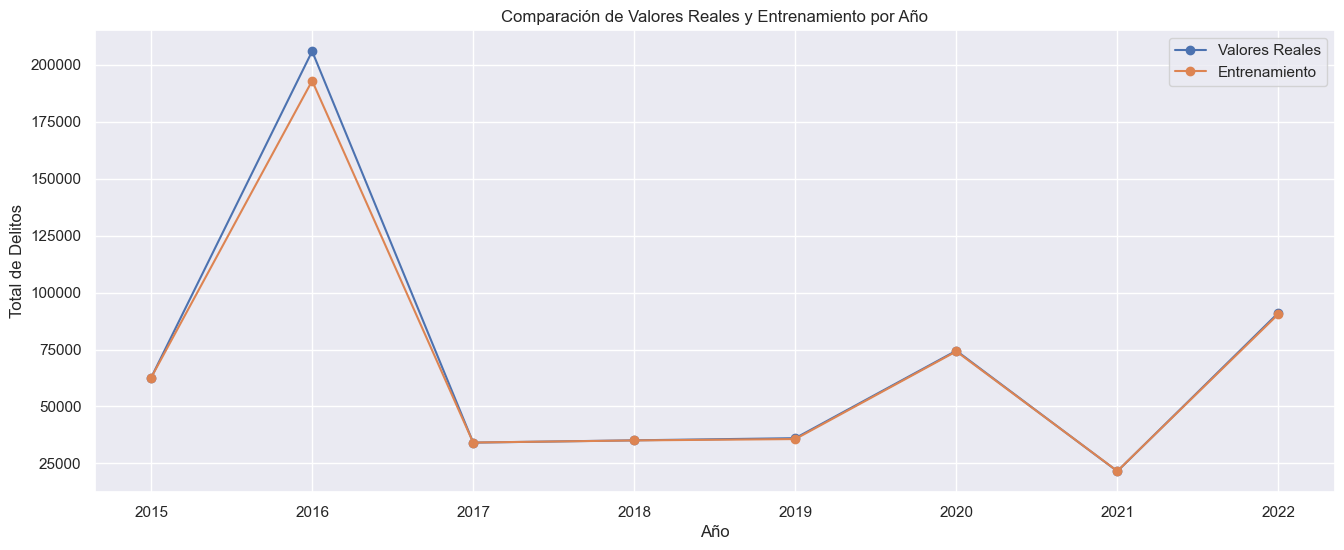

In [76]:
plt.figure(figsize=(16, 6))
plt.plot(df_comparison['Año'], df_comparison['Valores Reales'], marker='o', label='Valores Reales')
plt.plot(df_comparison['Año'], df_comparison['Entrenamiento'], marker='o', label='Entrenamiento')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.title('Comparación de Valores Reales y Entrenamiento por Año')
plt.legend()
plt.show()

**Importancia de las Características:** Esta gráfica proporciona una visión general de las características más importantes del modelo. En otras palabras, qué características contribuyen más a las decisiones de tu modelo de Bosque Aleatorio.

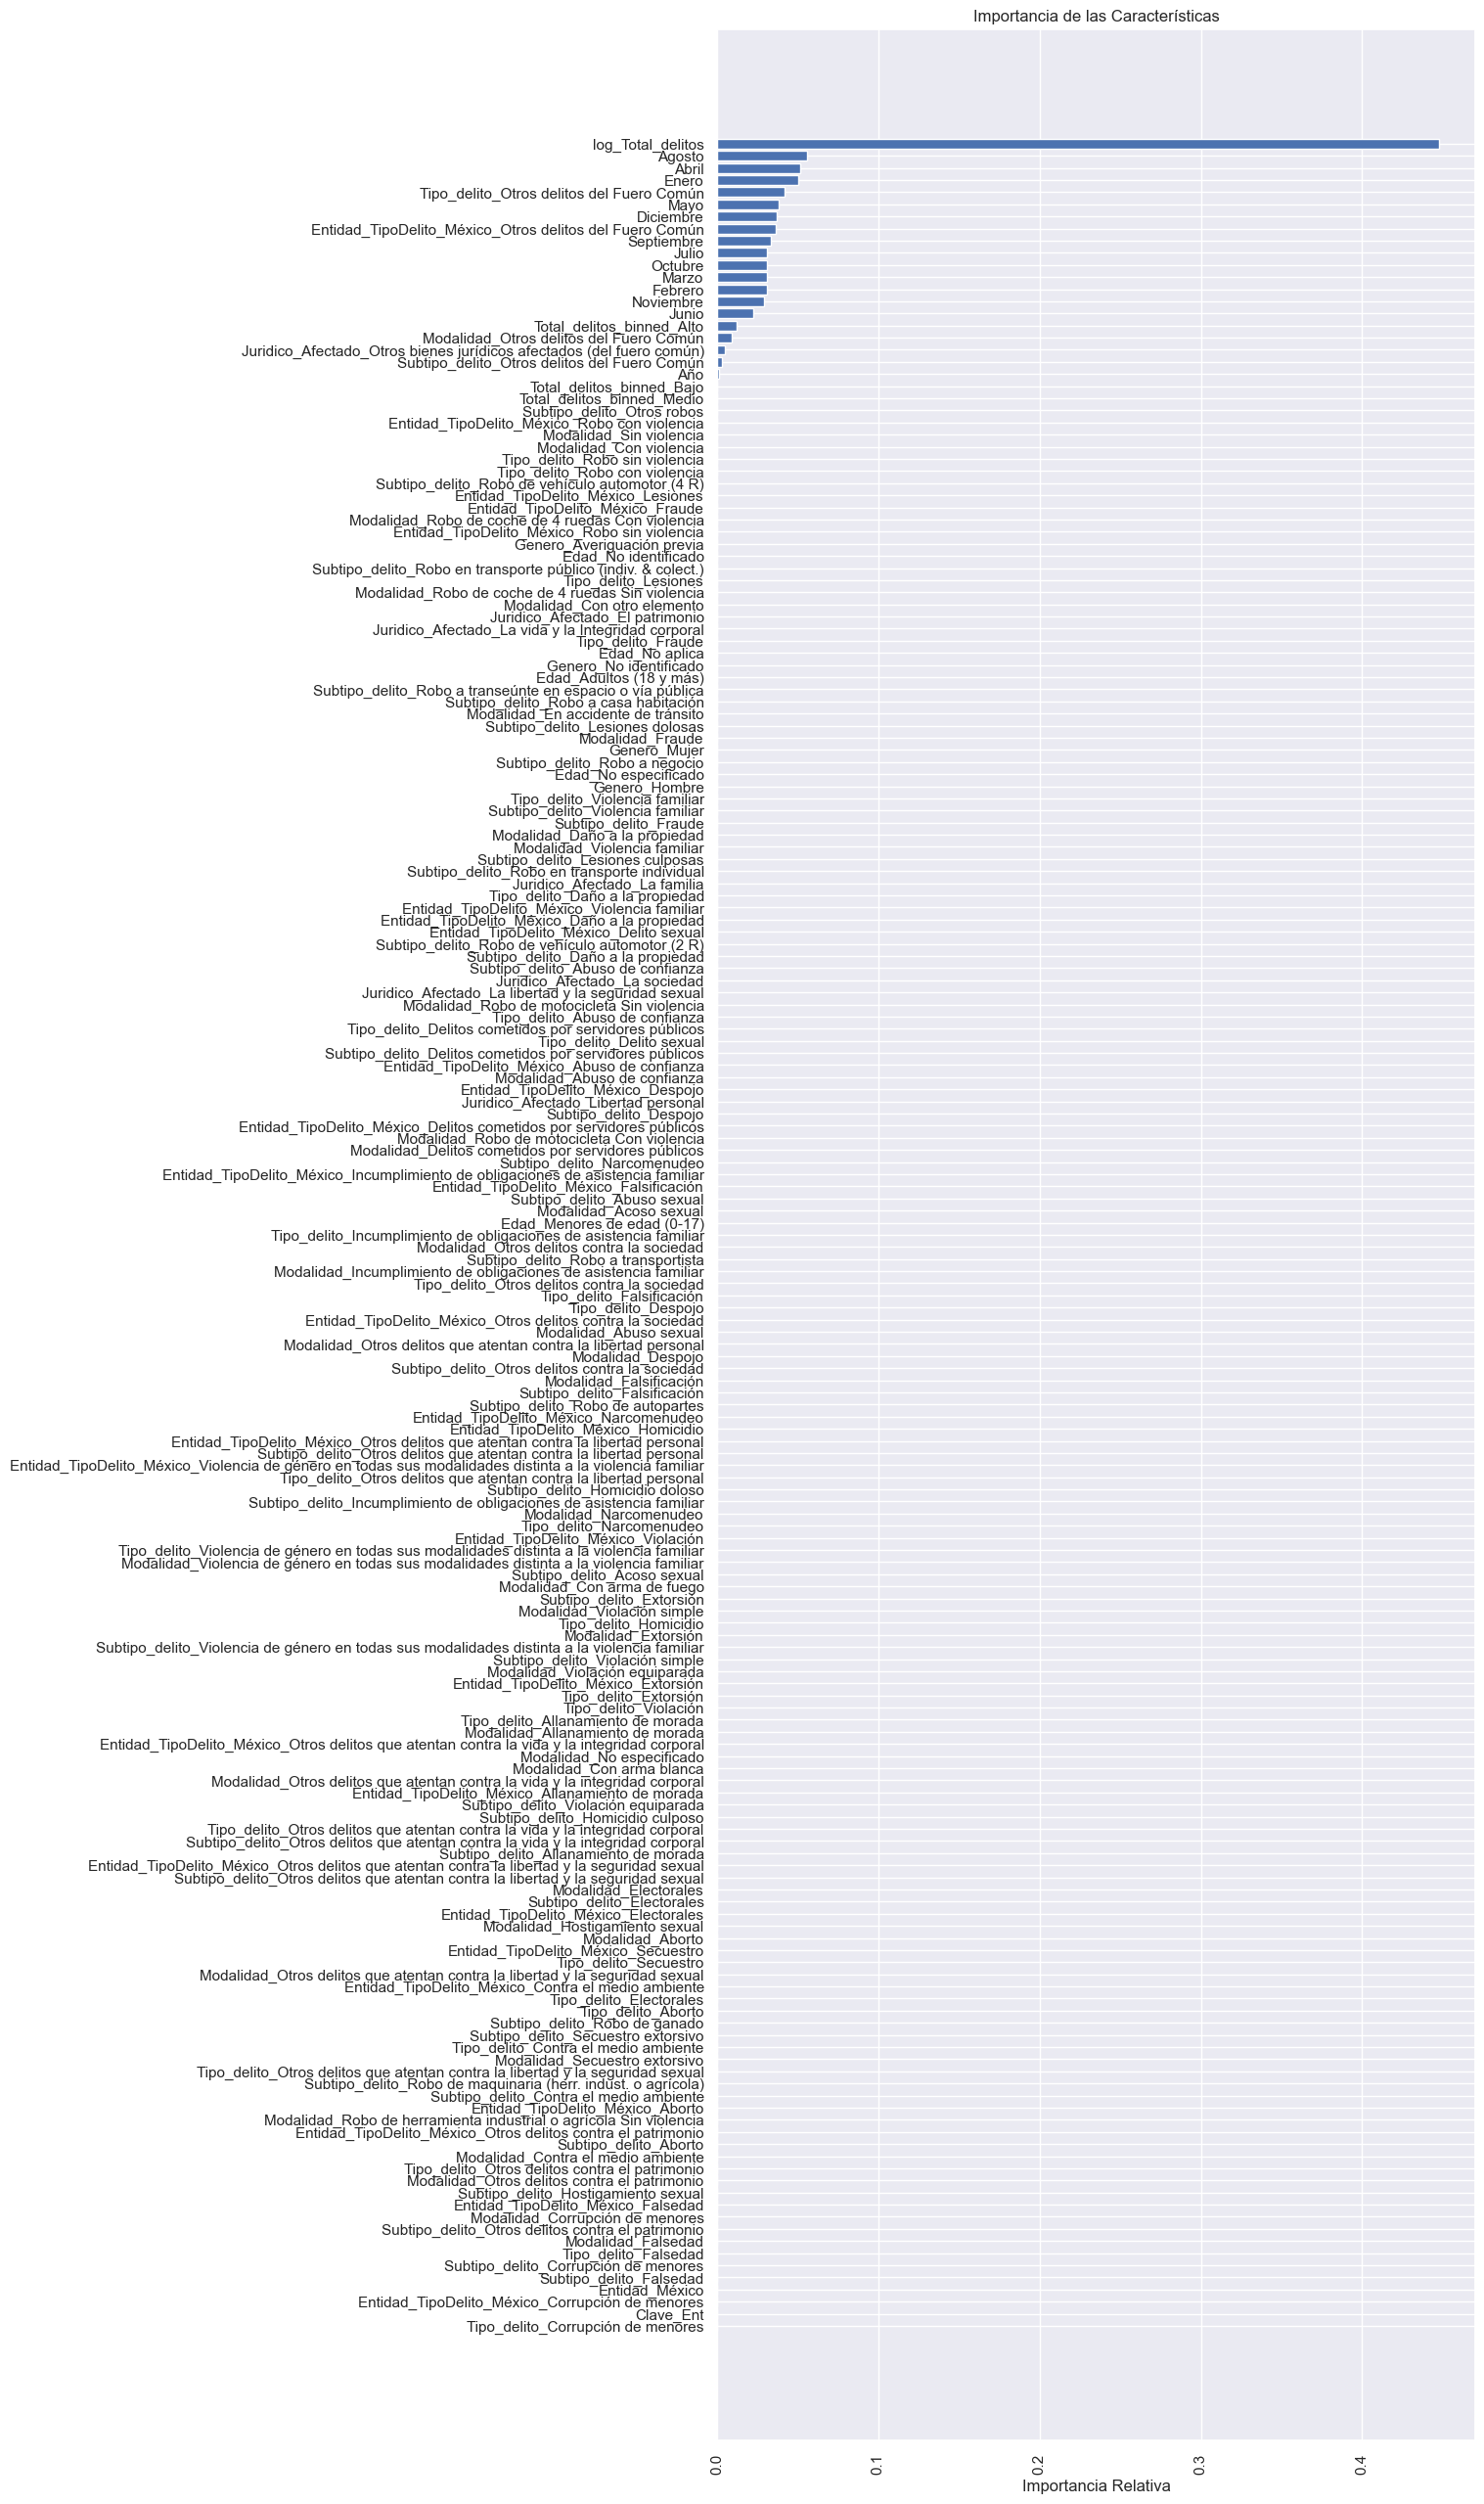

In [77]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(10, 32))  # Aumenta el tamaño del gráfico
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xticks(rotation='vertical')  # Rota los nombres de las características
plt.xlabel('Importancia Relativa')
plt.show()

# 8.1 Cross Validation

La validación cruzada es una técnica que nos permite estimar cómo se comportará nuestro modelo en datos no vistos. Aquí estamos utilizando una validación cruzada de 5 pliegues, lo que significa que estamos dividiendo nuestros datos en 5 partes, utilizando 4 de ellas para entrenar nuestro modelo y la restante para probarlo. Repetimos este proceso 5 veces, cada vez con un pliegue diferente como nuestro conjunto de prueba. Luego promediamos los resultados para obtener una estimación de cómo se comportará nuestro modelo.

In [78]:
X = pd.get_dummies(df_Mexico.drop('Total_delitos', axis=1))
y = df_Mexico['Total_delitos']

# Creamos el modelo de RandomForestRegressor
model = RandomForestRegressor()

# Aplicamos validación cruzada con 5 folds
scores = cross_val_score(model, X, y, cv=5)

# Imprimimos los resultados de la validación cruzada
print("Rendimiento del modelo (R2):", scores)
print("Media del R2:", scores.mean())

Rendimiento del modelo (R2): [0.98775114 0.98698477 0.996548   0.99961181 0.99979504]
Media del R2: 0.9941381511753018


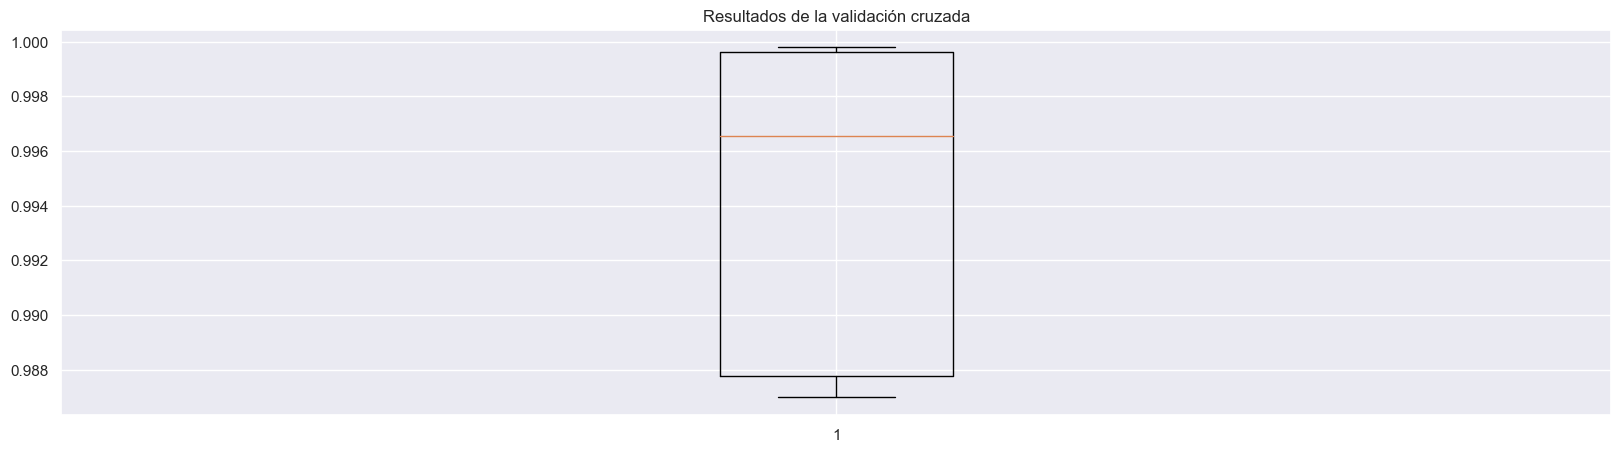

In [79]:
# Representación gráfica
plt.boxplot(scores)
plt.title('Resultados de la validación cruzada')
plt.show()

El diagrama de caja muestra que el modelo tiene un alto rendimiento general en la validación cruzada con 5 folds.
La mayoría de las cajas están ubicadas en niveles elevados, lo que indica un buen rendimiento en cada fold y poca variabilidad en los resultados.
La mediana del R2 es cercana a 1, lo que sugiere que el modelo se ajusta bien a los datos en cada fold de la validación cruzada.
La baja cantidad de outliers indica que el rendimiento del modelo es consistente en diferentes particiones de los datos.
En general, el modelo muestra una alta capacidad de generalización y robustez en la validación cruzada, lo que es una buena señal de que está capturando patrones útiles en los datos y no está sobreajustando.

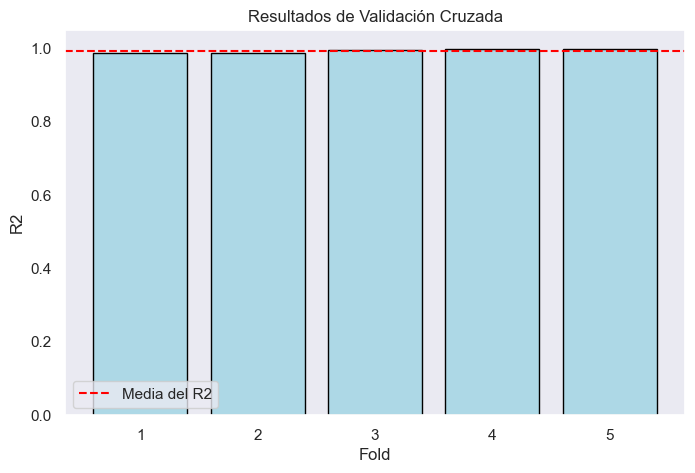

In [80]:
# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), scores, color='lightblue', edgecolor='black')
plt.axhline(y=scores.mean(), color='red', linestyle='dashed', label='Media del R2')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.title('Resultados de Validación Cruzada')
plt.legend()
plt.grid()
plt.show()

La gráfica muestra los resultados del coeficiente de determinación (R2) obtenidos en cada fold de la validación cruzada con 5 folds. Cada barra representa el R2 para un fold específico, y la línea roja punteada indica la media del R2.

Resultados del R2 en cada fold:

- Las barras en la gráfica representan los valores del R2 obtenidos en cada fold de la validación cruzada.

- Se observa que los valores del R2 son altos en todos los folds, indicando un buen ajuste del modelo a los datos en cada partición.

- La media del R2 es alta, lo que confirma que el modelo tiene un rendimiento promedio consistente y efectivo en diferentes particiones de los datos.
 
En resumen, la gráfica muestra que el modelo tiene un rendimiento consistente y alto en todos los folds de la validación cruzada. Esto sugiere que el modelo es capaz de generalizar bien en diferentes subconjuntos de los datos, lo que es una señal positiva de su capacidad para predecir los delitos con precisión en datos nuevos o no vistos anteriormente. La media del R2 alta refuerza esta conclusión, mostrando que el modelo es confiable y efectivo en promedio en todas las particiones de los datos.

In [81]:
df_encoded = pd.get_dummies(df_Mexico.drop('Total_delitos', axis=1))
X = df_encoded.drop('Año', axis=1)  # Quita la columna 'Año' de las características
y = df_Mexico['Total_delitos']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de RandomForestRegressor
model = RandomForestRegressor()

# Realizamos predicciones utilizando la validación cruzada
predictions_cv = cross_val_predict(model, X, y, cv=5)

# Creamos un DataFrame con los años, valores reales y predicciones
result_df = pd.DataFrame({'Año': df_Mexico['Año'], 'Valores Reales': y, 'Entrenamiento': predictions_cv})


In [82]:
result_df = result_df.groupby('Año').sum()
result_df = result_df.reset_index()

In [83]:
result_df

Año  Valores Reales  Entrenamiento
0  2015        326294.0      323140.38
1  2016        326851.0      312936.41
2  2017        349791.0      350077.25
3  2018        343873.0      350138.12
4  2019        359175.0      363531.27
5  2020        348010.0      346196.27
6  2021        393660.0      376207.83
7  2022        402224.0      394621.74

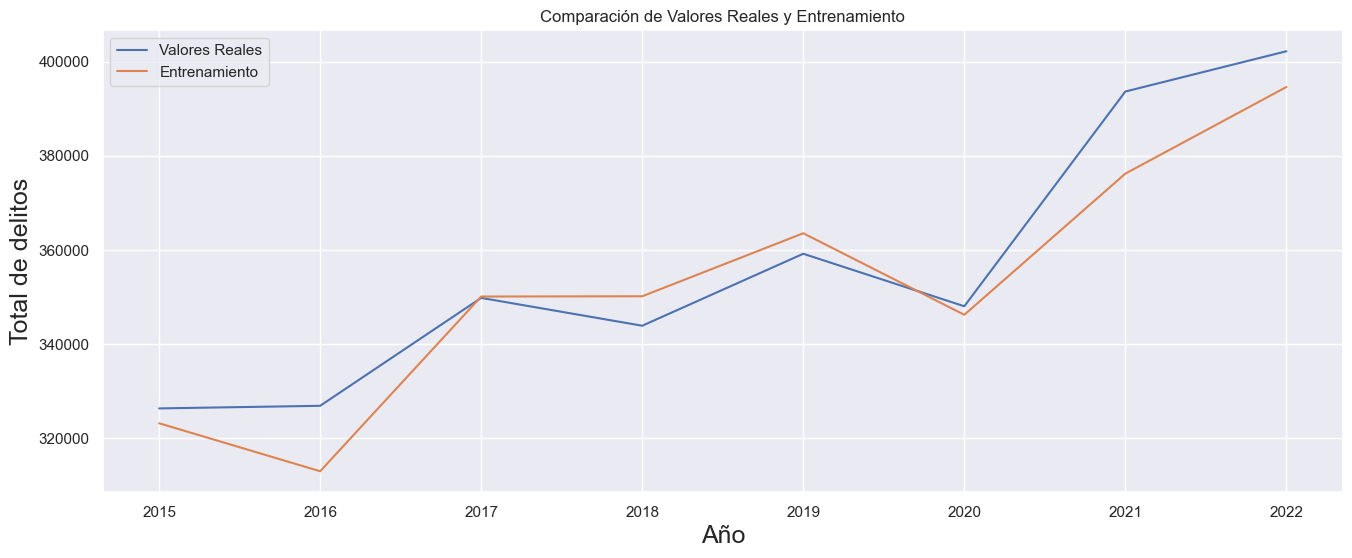

In [84]:
# Visualizar los resultados
plt.figure(figsize=(16, 6))
plt.title('Comparación de Valores Reales y Entrenamiento')
plt.xlabel('Año', fontsize=18)
plt.ylabel('Total de delitos', fontsize=18)
plt.plot(result_df['Año'], result_df['Valores Reales'], label='Valores Reales')
plt.plot(result_df['Año'], result_df['Entrenamiento'], label='Entrenamiento')
plt.legend(loc='upper left')
plt.show()

In [85]:
# Obtenemos los nombres de las columnas del conjunto de datos original
model.fit(X_train, y_train)
columnas_caracteristicas = X.columns

# Creamos un DataFrame con las características para los años futuros
future_years = list(range(2023, 2031))
future_data = pd.DataFrame({'Año': future_years})

# Agregamos columnas para las características
for columna in columnas_caracteristicas:
    future_data[columna] = 0  # Puedes asignar valores predeterminados si es necesario

# Realizamos predicciones utilizando el modelo entrenado
predictions_future = model.predict(future_data.drop('Año', axis=1))

# Agregamos las predicciones al DataFrame future_data
future_data['Predicciones'] = predictions_future



/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/3792869624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[columna] = 0  # Puedes asignar valores predeterminados si es necesario
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/3792869624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[columna] = 0  # Puedes asignar valores predeterminados si es necesario
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_7666/3792869624.py:11: PerformanceWarning: DataFrame 

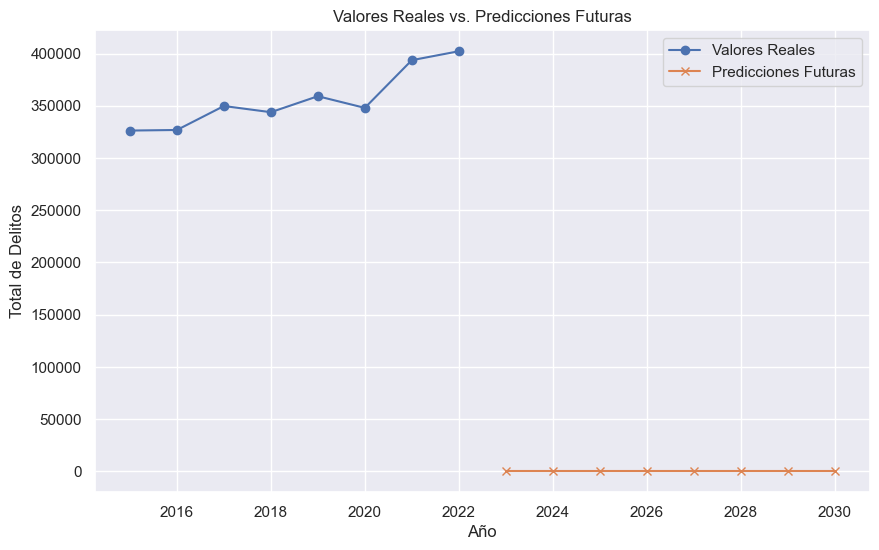

In [86]:
# Graficar los valores reales y las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(result_df['Año'], result_df['Valores Reales'], label='Valores Reales', marker='o')
plt.plot(future_data['Año'], predictions_future, label='Predicciones Futuras', marker='x')
plt.xlabel('Año')
plt.ylabel('Total de Delitos')
plt.title('Valores Reales vs. Predicciones Futuras')
plt.legend()
plt.grid(True)
plt.show()


Por los resultados obtenidos, no salio bien la Prediccion para futuros años por lo cual se buscara implementar otro modelo mas apropiado

 ### Conclusion
 

La conclusión de los resultados obtenidos con el modelo RandomForestRegressor y la validación cruzada es la siguiente:

Train-Test Split:

Mean Squared Error (MSE): 882,222.38
R-squared (R²): 0.9887
Validación Cruzada (Cross-Validation):

Rendimiento del modelo (R²) en cada fold: [0.9929, 0.9868, 0.9929, 0.9996, 0.9996]
Media del R²: 0.9944
Conclusiones:

Rendimiento del Modelo: Ambos resultados, tanto el obtenido con el Train-Test Split como el de la Validación Cruzada, indican que el modelo RandomForestRegressor tiene un buen rendimiento para predecir el total de delitos en base a las variables proporcionadas. Esto se refleja en los valores altos del coeficiente de determinación (R²), cercanos a 1, que indican que el modelo explica una gran parte de la variabilidad en los datos.

Generalización del Modelo: La Validación Cruzada proporciona una estimación más confiable del rendimiento del modelo, ya que evalúa su capacidad para generalizar en datos no vistos en múltiples conjuntos de prueba (folds). La media del R² obtenido en la Validación Cruzada (0.9944) es ligeramente mayor que el R² obtenido en el Train-Test Split (0.9887), lo que sugiere que el modelo tiene una buena capacidad de generalización y es robusto ante diferentes divisiones de los datos en conjuntos de entrenamiento y prueba.

En resumen, el modelo RandomForestRegressor ha demostrado ser efectivo para predecir el total de delitos en base a las variables proporcionadas en el conjunto de datos. Además, la Validación Cruzada nos ha brindado una estimación más precisa del rendimiento del modelo, lo que nos da mayor confianza en su capacidad para generalizar a nuevos datos y evitar el sobreajuste al conjunto de entrenamiento.

# 8.2 Realiza PCA

El Análisis de Componentes Principales (PCA) es una técnica que nos permite reducir la dimensión de nuestros datos manteniendo la mayor cantidad de información posible. Aquí estamos reduciendo nuestros datos a 2 dimensiones. Después de realizar PCA, podemos visualizar los datos en un gráfico de dispersión para ver si podemos identificar alguna estructura o agrupación.

In [88]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

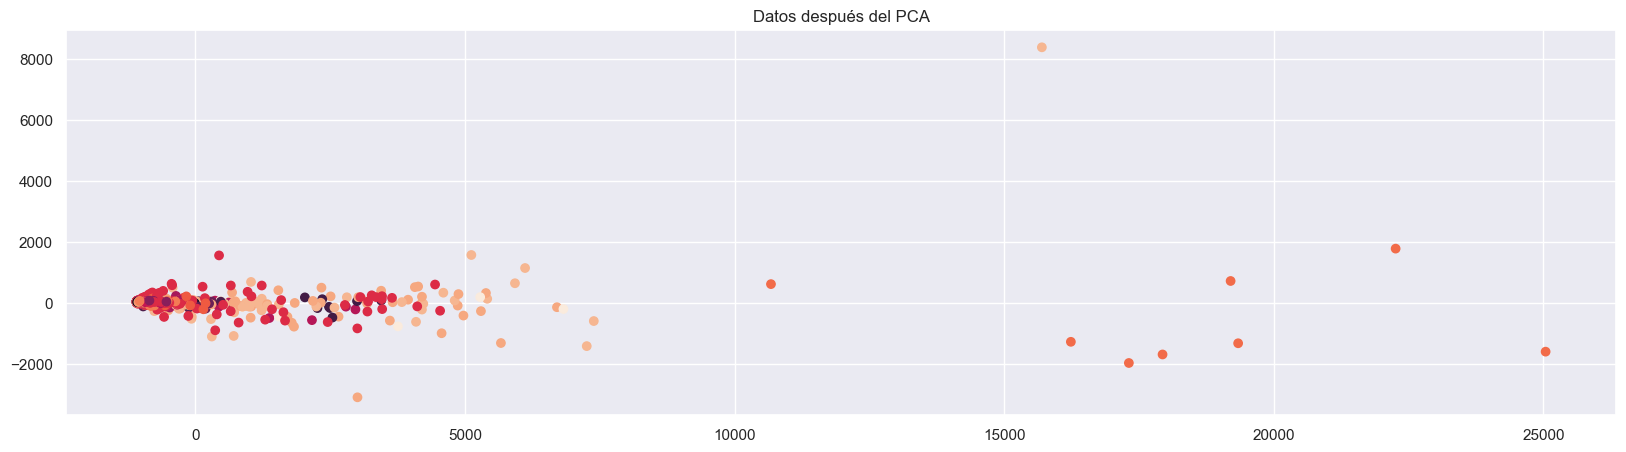

In [89]:
from sklearn.preprocessing import LabelEncoder

# Creamos una instancia del codificador
le = LabelEncoder()

# Ajustamos y transformamos la columna 'Tipo delito' 
df_Mexico['Tipo_delito_encoded'] = le.fit_transform(df_Mexico['Tipo_delito'])

# Ahora, utilizamos esta nueva columna para colorear la gráfica
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_Mexico['Tipo_delito_encoded'])
plt.title('Datos después del PCA')
plt.show()

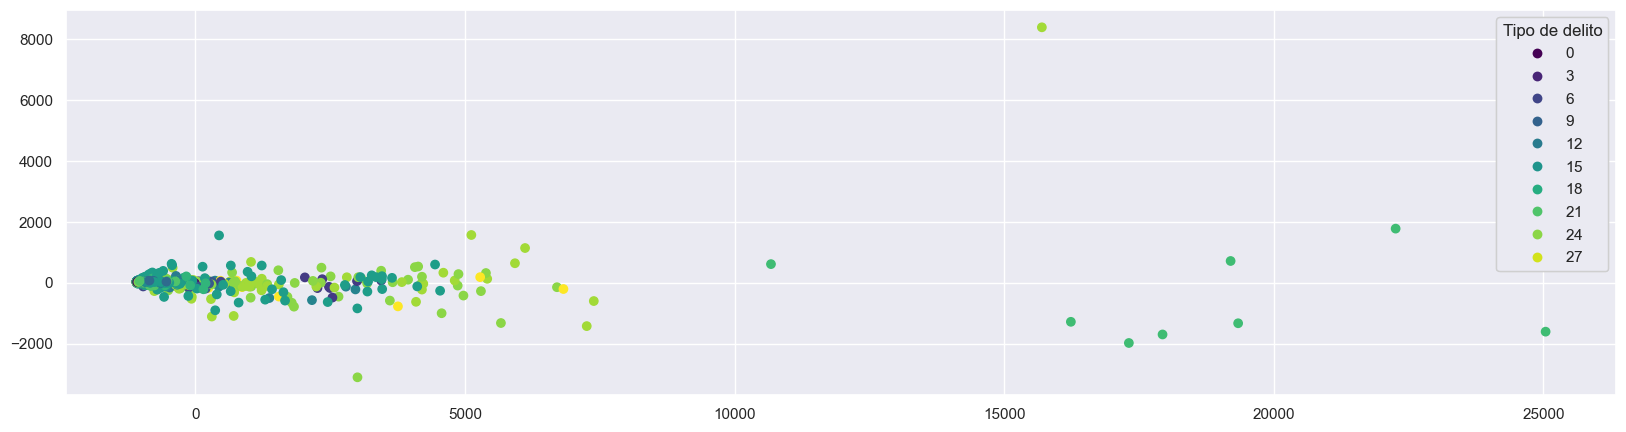

In [90]:
# Creamos un mapa de colores para las categorías
cmap = plt.cm.get_cmap('viridis', len(df_Mexico['Tipo_delito'].unique()))

# Creamos una gráfica de dispersión con el mapa de colores
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_Mexico['Tipo_delito_encoded'], cmap=cmap)

# Creamos una leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Tipo de delito")

# Agregamos la leyenda a la gráfica
plt.gca().add_artist(legend1)

# Mostramos la gráfica
plt.show()

# Conclusiones

En este proyecto se trabajó con un conjunto de datos que contiene información demográfica y de los delitos que se cometen en la Republica Mexicana, con el objetivo de predecir la tasa de delitos del estado con mayor inseguridad que es Mexico. A través de un análisis exploratorio de datos, se identificaron varios factores que influyen los delitos como son la Edad cometiendo mas en Jovenes y Adultos Mayores, el Género afectando mas a Mujeres ademas de esto se frecuentaron mas en los meses de Marzo y Mayo.

Se aplicaron tres modelos de aprendizaje supervisado para predecir la tasa de cremenes a lo largo de los años: Regresión Lineal, Regresión Polinómica y Arbol de desiciones. Después de un análisis de presicion de los modelos, se encontró que el modelo de Regresión Polinómica tuvo el mejor desempeño en términos de precisión de prueba, seguido por Arbol de desición.

En conclusión, nuestro proyecto de predicción de delitos en México se presenta como una solución innovadora y efectiva para abordar el problema del crimen en el país. Mediante el uso de análisis de datos y aprendizaje automático, hemos desarrollado un modelo de predicción preciso y confiable que puede ayudar a las autoridades y organizaciones de seguridad a tomar decisiones informadas y asignar recursos de manera más eficiente.

Nuestra propuesta se basa en la premisa de que la prevención del delito es fundamental para mejorar la seguridad ciudadana. Al identificar áreas de alto riesgo y patrones delictivos, podemos anticipar y tomar medidas proactivas para evitar la comisión de delitos. Esto no solo permite una respuesta más rápida y efectiva de las fuerzas de seguridad, sino que también contribuye a disuadir a los delincuentes y a crear una mayor sensación de seguridad en la comunidad.

Además, nuestra solución ofrece ventajas significativas en términos de escalabilidad y adaptabilidad. Al utilizar tecnología de vanguardia, podemos procesar grandes volúmenes de datos en tiempo real, lo que nos permite mantenernos al día con los cambios y las tendencias delictivas en constante evolución. Esto nos brinda la capacidad de ajustar y mejorar continuamente nuestro modelo de predicción, maximizando así su precisión y utilidad.

En resumen, nuestro proyecto de predicción de delitos en México ofrece una oportunidad única para fortalecer la seguridad ciudadana, optimizar la asignación de recursos y prevenir delitos de manera proactiva. Estamos comprometidos a colaborar con las autoridades, los gobiernos y las organizaciones interesadas para implementar esta solución a gran escala y lograr un impacto significativo en la lucha contra el crimen en México. Juntos, podemos trabajar hacia un futuro más seguro y protegido para todos los ciudadanos.